## Charting the Path to Sustainability: Integrating Land Sector Data with SDGs
### Land Sector Data Analysis by Country
#### Comprehensive Analysis of Geospatial Data
#### Case in Study - Azerbaijan

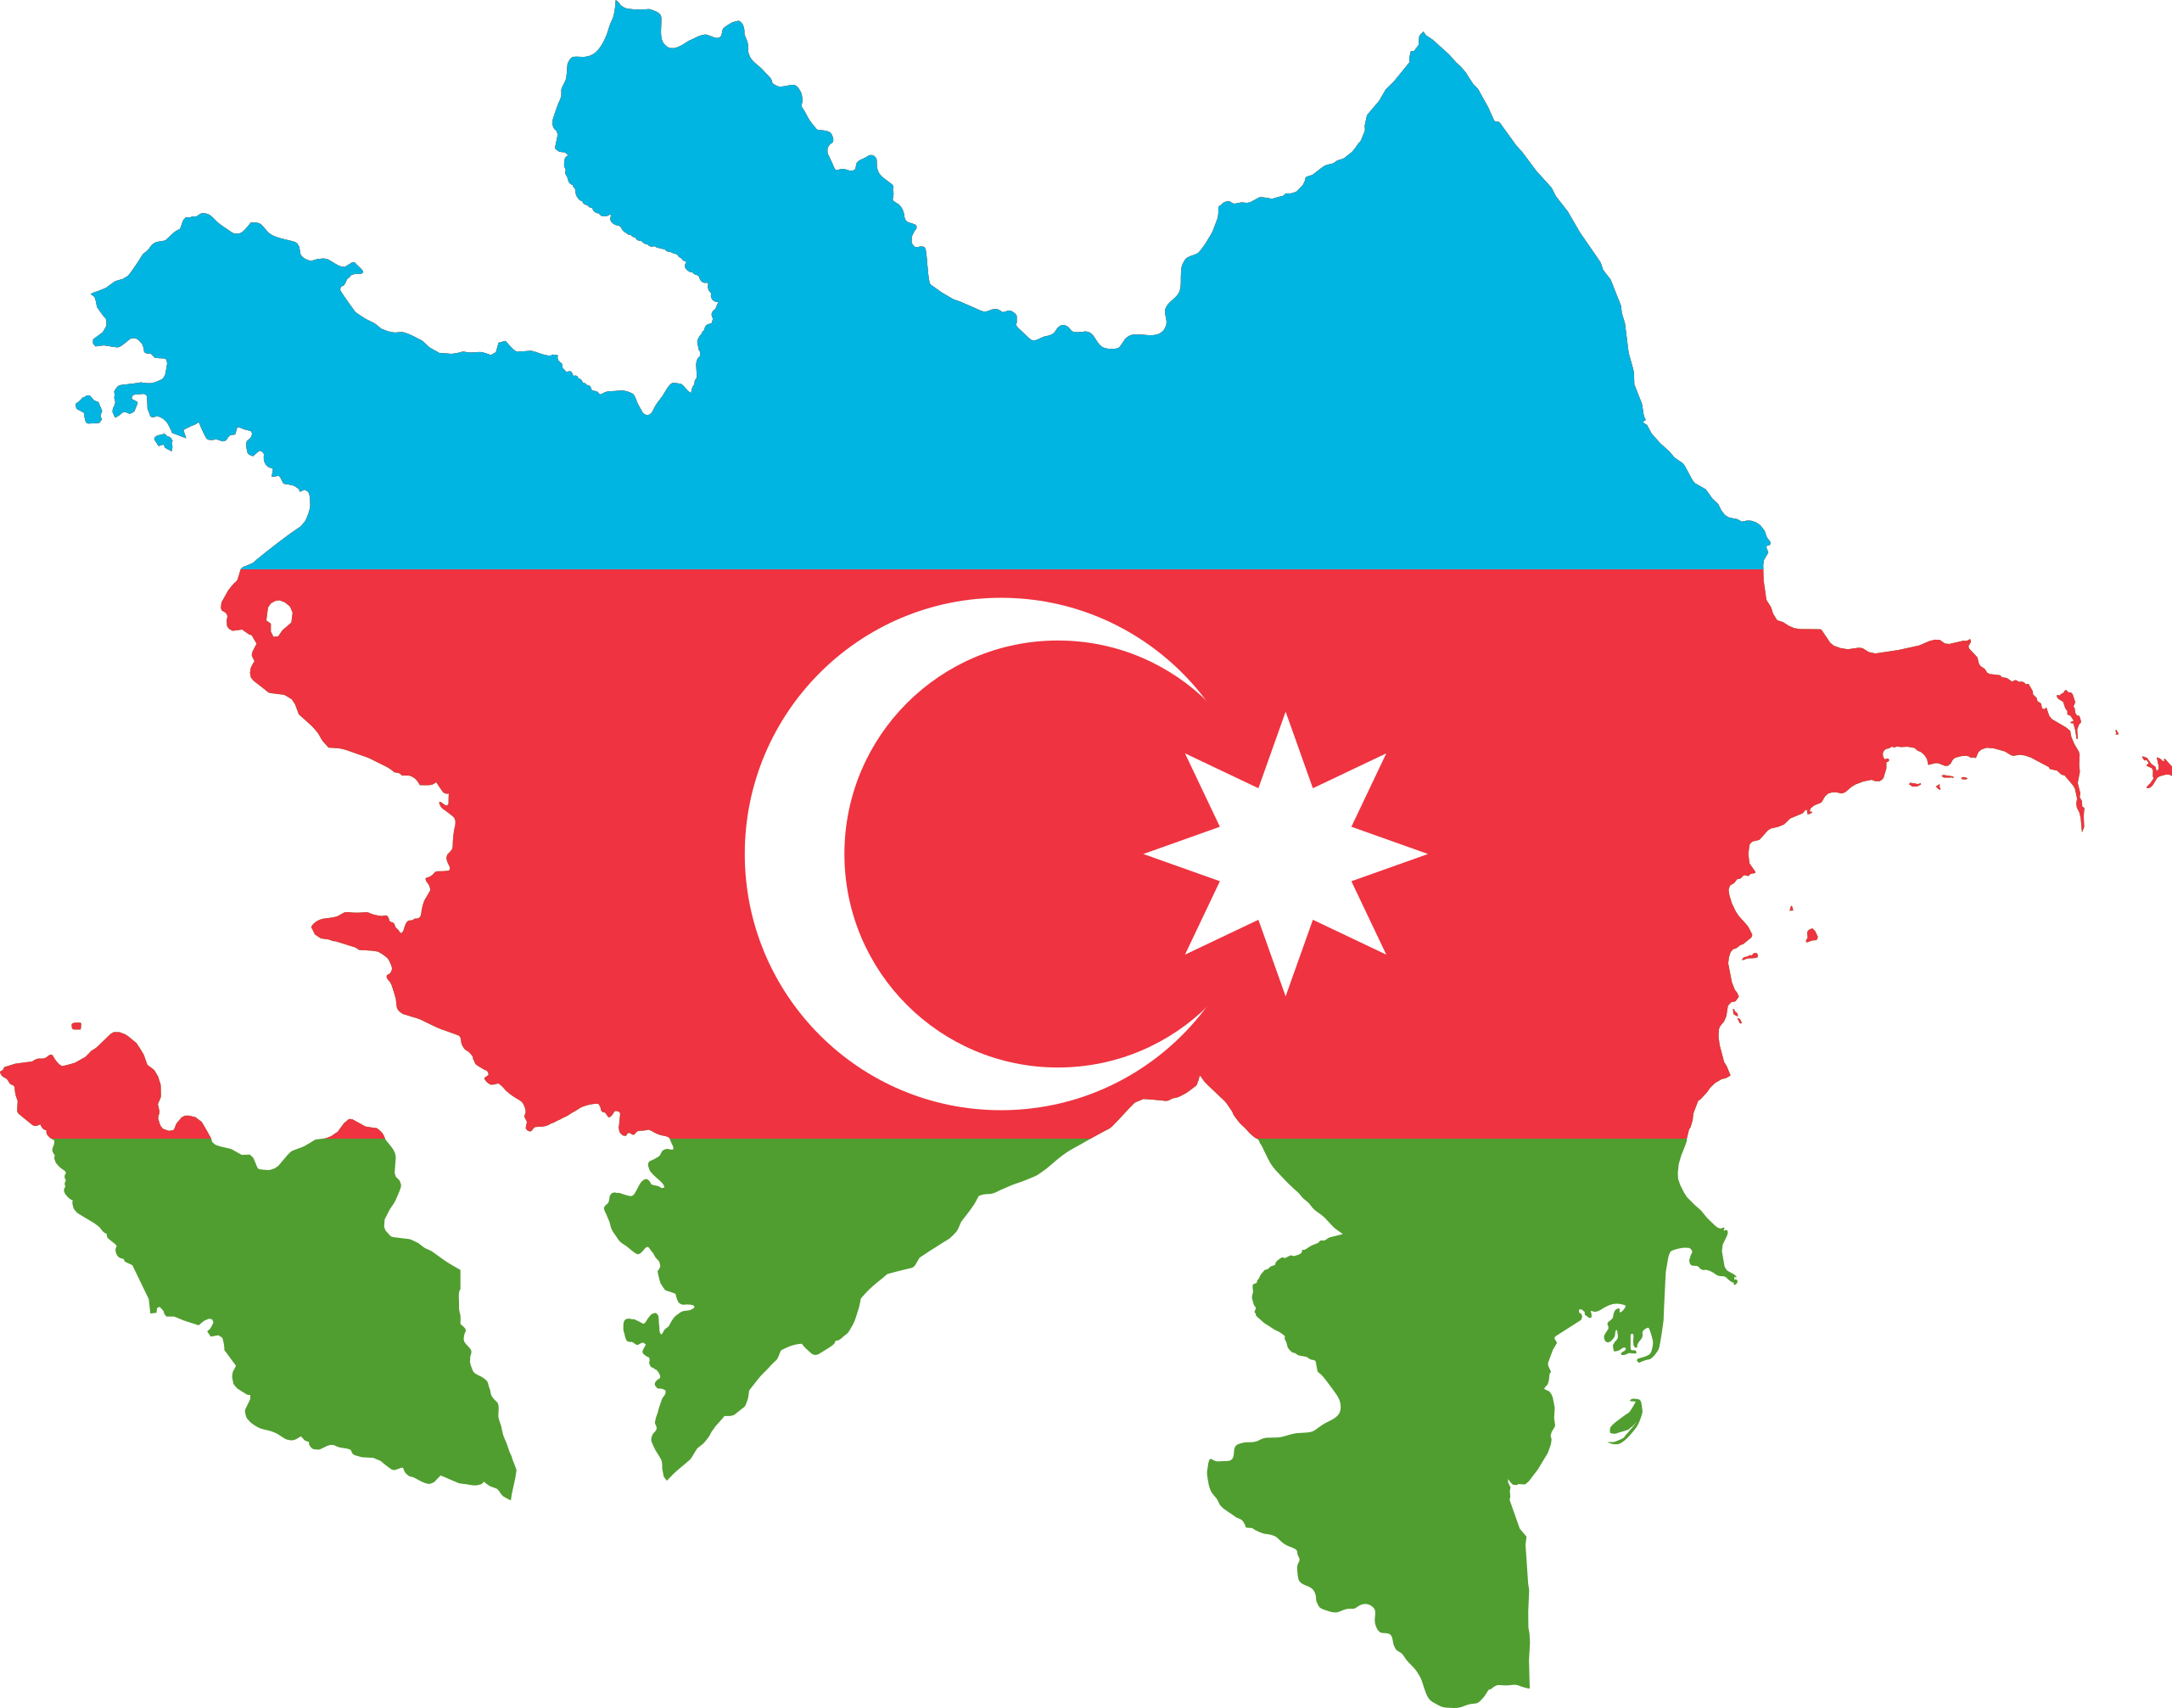

#### TABLE OF CONTENT

#### 1. INTRODUCTION
    1.0 OVERVIEW
    1.1 AIM

#### 2. REPOSITORY
    2.0 IMPORT LIBRARIES
    2.1 LOAD DATASETS

#### 3. ADMINISTRATIVE
     3.0 BOUNDARY
       3.01 UNDERSTAND THE DATA
       3.02 COMPREHENSIVE ANALYSIS
     3.1 PROTECTED AREAS
       3.11 UNDERSTAND THE DATA
       3.12 COMPREHENSIVE ANALYSIS
     3.2 ROADS
       3.21 UNDERSTAND THE DATA
       3.22 COMPREHENSIVE ANALYSIS
     3.3 ADMINISTRATIVE OVERVIEW

#### 4. BIOCLIMATIC AND ECOLOGICAL ZONES
     4.0 BIODIVERSITY HOTSPOTS
       4.01 UNDERSTAND THE DATA
       4.02 COMPREHENSIVE ANALYSIS
     4.1 ECOLOGICAL ZONES
       4.11 UNDERSTAND THE DATA
       4.12 COMPREHENSIVE ANALYSIS
     4.2 AGROECOLOGICAL ZONES
       4.21 UNDERSTAND THE DATA
       4.22 COMPREHENSIVE ANALYSIS
     4.3 HOLDRIDGE LIFE ZONES
       4.31 UNDERSTAND THE DATA
       4.32 COMPREHENSIVE DATA
     4.4 TERRESTIAL ECOREGIONS
       4.41 UNDERSTAND THE DATA
       4.42 COMPREHENSIVE ANALYSIS
     4.5 BIOCLIMATIC AND ECOLOGICAL ZONES OVERVIEW

#### 5.SOIL RESOURCES
    5.0 SOIL RESOURCES
      5.01 UNDERSTAND THE DATA
      5.02 COMPREHENSIVE ANALYSIS
    5.1 SOIL RESOURCES OVERVIEW

#### 6. CLIMATE
     6.0 CLIMATE ZONES
       6.01 UNDERSTAND THE DATA
       6.02 COMPREHENSIVE ANALYSIS
     6.1 CLIMATE SHIFTS
       6.11 UNDERSTAND THE DATA
       6.12 COMPREHENSIVE ANALYSIS
     6.2 CLIMATE ZONES OVERVIEW

#### 7. SUMMARY & RECOMMENDATION

#### 8. REFERENCES

#### 1. INTRODUCTION
    1.0 OVERVIEW

Azerbaijan, officially the Republic of Azerbaijan, is a transcontinental country located at the boundary of Eastern Europe and West Asia. It spans both Asia and Europe and is situated in the South Caucasus region, bordered by the Caspian Sea to the east. The capital and largest city of Azerbaijan is Baku, renowned for its medieval walled Inner City and boasting the best harbor on the Caspian Sea.

Historically, the territory of Azerbaijan was ruled by Caucasian Albania and later various Persian empires, remaining part of Qajar Iran until the 19th century. Today, Azerbaijan offers a captivating blend of traditions and modern development, with its diverse and often picturesque terrain reflecting its rich cultural heritage.

While remote areas preserve distinctive folk traditions, the country has undergone significant modernization characterized by industrialization, the development of power resources, and urban growth. More than half of the population now resides in cities, underscoring Azerbaijan's transition towards a more urbanized and dynamic society.

This project involves carrying out geospatial analysis to explore and understand the geographic context of the land sector data for Azerbaijan (AZE). The project's processes include;
- Data Preparation
- Exploratory Data Analysis
- Geospatial Analysis
- Data Interpretation

Data cleaning is unnecessary as the datasets are preprocessed and FLINT-ready.

    1.1 AIM

The aim of the this project is to apply various analytical techniques to gain insights into the spatial patterns, relationships, and characteristics of the land sector data. 

#### 2. REPOSITORY
    2.0 IMPORT LIBRARIES

Importing libraries is a critical step before loading the dataset. It is critical to import only the libraries that you are certain you will need to work with your dataset. To import to libraries, use the keyword import.

In [1]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
import geoplot as gplt 
import geoplot.crs as gcrs 
import folium
import os

    2.1 LOAD DATASETS

In [3]:
# Download data from google drive if it does not exist in the directory
def download_data(*args):
    import gdown
    for file_id in args:
        output_path = file_id + ".json"
        if not os.path.exists(output_path):
            url = "https://drive.google.com/uc?id=" + file_id
            gdown.download(url, output=output_path, quiet=False)

# Define file IDs
file_ids = [
    "1CCYUXOEsz87pSbvfWXElI-ruhGzEz6lC",
    "1RfzG7AYkyo9GtdldL7mjm8rWC7sAib-Q",
    "1YLo59yilv2m540eNe7Mt6Iv93dRA7l1C",
    "1_mfGM-9gE6p10vPwePnjRNBgp8ysA0dy",
    "1ws0-GJnLHjnnn7vr-lub742Er6JDbZrw",
    "1BQ69Wss6gb-KinmgfZaiIoggezUHAUyL",
    "1R4vMJTE1rTA5oSTiAQHp1hemvYrflMeq",
    "1nnHitsfCPrfxuxj8Saxdc5lueEpeQ52T",
    "1tkrT7UCaaMmEyr-xVGxTDPhFBSvGw_6M",
    "1T9VxSgPN6me2puQz-pMhBIxvASS__TNG", 
    "1NJRMUyZ2QCTSu9dXz9inzlgHDt_QGUqg"
]

# Download data
download_data(*file_ids)

# Define filenames
filenames = [
    "AZE_AL2_Azerbaijan.json",
    "AZE_ALL_states_GEZ.json",
    "Global Roads Open Access Data Set_dissolved.json",
    "CI_BiodiversityHotspots.geojson",
    "AZE_AL2_Azerbaijan_GEZ.json",
    "AZE_ALL_states_GEZ.json",
    "GlobalAgroEcologicalZones_GAEZ.geojson",
    "HoldridgeLifeZones.json",
    "TerrestrialEcoregionsoftheWorld_WWF.geojson",
    "AZE_AL2_Azerbaijan_WSR.json",
    "IPCC_ClimateZoneMap_Vector.geojson" 
]

# Read GeoDataFrames
data = {}
for filename in filenames:
    data[filename.split(".")[0]] = gpd.read_file(filename)

#### 3. ADMINISTRATIVE

    3.0 BOUNDARY

In [4]:
# Read the shapefile into geodataframe
admin = gpd.read_file("AZE_AL2_Azerbaijan.json")

In [5]:
# Check the first 2 rows of the dataframe
admin.head(2)

country ISO3166_2        name      enname     locname  \
0     AZE            Azerbaijan  Azerbaijan  Azərbaycan   

                   offname        boundary  adminlevel wikidata  \
0  Azərbaycan Respublikası  administrative           2     Q227   

       wikimedia           timestamp  \
0  az:Azərbaycan 2019-08-28 22:02:02   

                                            geometry  
0  MULTIPOLYGON (((49.58110 40.03604, 49.58205 40...

In [6]:
# Read the shapefile into geodataframe
adminstates = gpd.read_file("AZE_ALL_states_GEZ.json")

In [7]:
# Check the first 2 rows of the dataframe
adminstates.head(2)

country ISO3166_2                name                  gez_name  gez_code  \
0     AZE    AZ-AST     Astara District  Subtropical humid forest        21   
1     AZE    AZ-CAL  Jalilabad District  Subtropical humid forest        21   

  gez_abbrev  adminlevel                                           geometry  
0        SCf           4  POLYGON ((48.87443 38.62658, 48.86201 38.62726...  
1        SCf           4  POLYGON ((48.60950 39.10362, 48.58947 39.11364...

        COUNTRY BOUNDARY

In [8]:
# Check no.of rows and columns for admin boundary dataframme
admin.shape

(1, 12)

In [9]:
# View all column titles in the dataframe
admin.columns

Index(['country', 'ISO3166_2', 'name', 'enname', 'locname', 'offname',
       'boundary', 'adminlevel', 'wikidata', 'wikimedia', 'timestamp',
       'geometry'],
      dtype='object')

The above shows the names of the columns.

In [10]:
# Check the data-type of each column
admin.dtypes

country               object
ISO3166_2             object
name                  object
enname                object
locname               object
offname               object
boundary              object
adminlevel             int64
wikidata              object
wikimedia             object
timestamp     datetime64[ns]
geometry            geometry
dtype: object

The above shows the data types for each column.

In [11]:
# Check information about the dataframe
admin.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   country     1 non-null      object        
 1   ISO3166_2   1 non-null      object        
 2   name        1 non-null      object        
 3   enname      1 non-null      object        
 4   locname     1 non-null      object        
 5   offname     1 non-null      object        
 6   boundary    1 non-null      object        
 7   adminlevel  1 non-null      int64         
 8   wikidata    1 non-null      object        
 9   wikimedia   1 non-null      object        
 10  timestamp   1 non-null      datetime64[ns]
 11  geometry    1 non-null      geometry      
dtypes: datetime64[ns](1), geometry(1), int64(1), object(9)
memory usage: 228.0+ bytes


This provides basic information about the dataframe. It contains categorical values, which are represented by columns with 'object' data types, numerical values, which are represented with 'int64' data types, and geometric data, which is stored in columns with 'geometry' data types. Geometric data represents spatial or geographic information.

In [12]:
# Check the coordinate system of the dataframe
admin.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The Coordinate system of the dataframe is 4326, which is the WGS 84 coordinate system.

In [13]:
# Check the geometric type of the dataframe
admin.geom_type

0    MultiPolygon
dtype: object

       STATE BOUNDARIES

In [14]:
# Check no.of rows and columns for states boundaries dataframme
adminstates.shape

(131, 8)

Note:  Further details regarding the boundaries of individual states within Azerbaijan are not required for the current scope of analysis.

    3.02 COMPREHENSIVE ANALYSIS

    DEFINE THE BOUNDARY

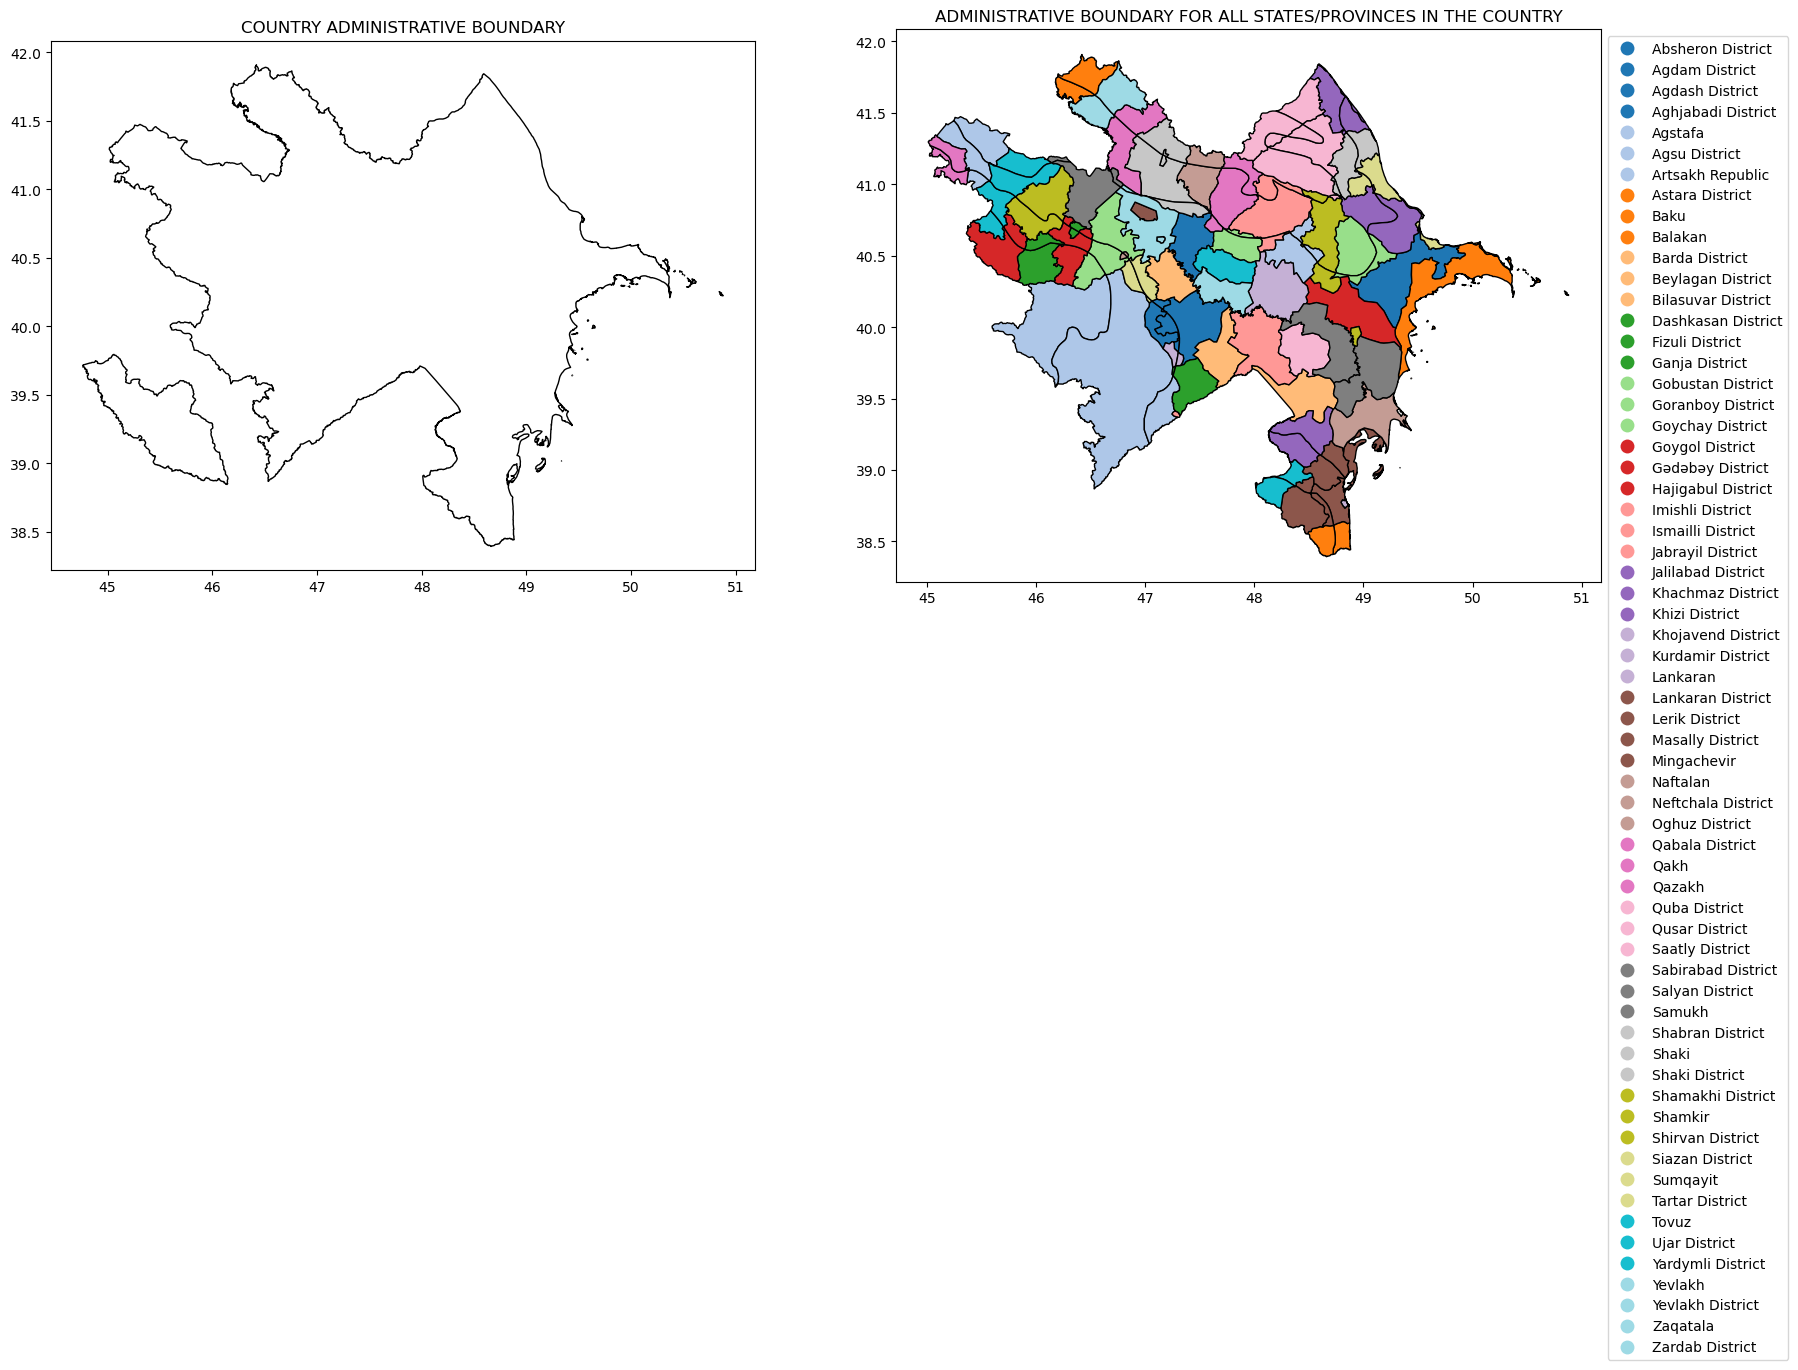

In [15]:
# Create subplot with two panels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15))

# Plot the administrative boundary of country in panel 1
admin.plot(ax=ax1, color="none", edgecolor="black")
ax1.set_title("COUNTRY ADMINISTRATIVE BOUNDARY")

# Plot the administrative boundaries of all states/territories in panel 2
adminstates.plot(ax=ax2,column="name", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, cmap="tab20", edgecolor="black")
ax2.set_title("ADMINISTRATIVE BOUNDARY FOR ALL STATES/PROVINCES IN THE COUNTRY")

# Display plot
plt.show()

**Observation**

The plot above illustrates the administrative boundary of Azerbaijan, alongside the administrative boundaries of all its states/provinces.

In [16]:
# Get the total area for country

# Replace EPSG:4326 with a projects CRS of 32639
projected_crs = "EPSG:32639"

# Re-project geometries to a projected CRS
admin = admin.to_crs(projected_crs)

# Get the total area of country in sqm of the new CRS
total_area = admin["geometry"].area.sum()

print(f"Total Area: {total_area} sqm")

Total Area: 85969029811.79912 sqm


In [17]:
# Check the for the largest state in sqm

# Re-project geometries to a projected CRS
adminstates = adminstates.to_crs(projected_crs)

# Calculate and print the area for each geometry 
adminstates["area"] = adminstates.geometry.area

In [18]:
# Create an interactive map of the states/pronvinces showing their respective areas
adminstates.explore()

In [19]:
# Reproject geometries to original CRS for admin
original_crs = "EPSG:4326"
admin = admin.to_crs(original_crs)

# Reproject geometries to original CRS for adminstates
adminstates = adminstates.to_crs(original_crs)

    3.1 PROTECTED AREAS

In [20]:
# Access world protected areas datasets using file path
wdpa = (r"C:\Users\User\Documents\Scholarships application\Women Techstars Application\internships\Outreachy\Contribution\Outreachy_Nwajiunor_2023\WDPA_WDOECM_wdpa_gdb_polygons\WDPA_WDOECM_wdpa_gdb_polygons.shx")

In [21]:
# Read the shapefile into geodataframe
protected_areas = gpd.read_file(wdpa)

In [22]:
protected_areas.head(2)

WDPAID  WDPA_PID PA_DEF  \
0   10715.0     10715      1   
1  209777.0  209777_E      1   

                                                NAME              ORIG_NAME  \
0                                         Kronotskiy             Kronotskiy   
1  Sarali Land between Rivers / Great Volzhsko-Ka...  Great Volzhsko-Kamsky   

                          DESIG                     DESIG_ENG     DESIG_TYPE  \
0  UNESCO-MAB Biosphere Reserve  UNESCO-MAB Biosphere Reserve  International   
1  UNESCO-MAB Biosphere Reserve  UNESCO-MAB Biosphere Reserve  International   

         IUCN_CAT        INT_CRIT  ...     MANG_AUTH     MANG_PLAN  \
0  Not Applicable  Not Applicable  ...  Not Reported  Not Reported   
1  Not Applicable  Not Applicable  ...  Not Reported  Not Reported   

            VERIF  METADATAID  SUB_LOC PARENT_ISO  ISO3       SUPP_INFO  \
0  State Verified         840   RU-KAM        RUS   RUS  Not Applicable   
1  State Verified         840    RU-TA        RUS   RUS  Not Applicable   

         CONS_OBJ                                           geometry  
0  Not Applicable  MULTIPOLYGON (((160.49655 55.17709, 160.49907 ...  
1  Not Applicable  POLYGON ((49.30487 55.36806, 49.30433 55.37184...  

[2 rows x 31 columns]

In [23]:
# Filter data for country
ctry_protected_areas = protected_areas[protected_areas["PARENT_ISO"] == "AZE"]

In [24]:
ctry_protected_areas.head(2)

WDPAID   WDPA_PID PA_DEF                          NAME  \
23783  555549393.0  555549393      1  Garagol State Nature Reserve   
23784  555549394.0  555549394      1          Goygol National Park   

                          ORIG_NAME                 DESIG  \
23783  Garagol State Nature Reserve  State Nature Reserve   
23784          Goygol National Park         National Park   

                  DESIG_ENG DESIG_TYPE IUCN_CAT        INT_CRIT  ...  \
23783  State Nature Reserve   National       Ia  Not Applicable  ...   
23784         National Park   National       II  Not Applicable  ...   

                                               MANG_AUTH     MANG_PLAN  \
23783  Ministry of Ecology and Natural Resources of A...  Not Reported   
23784  Ministry of Ecology and Natural Resources of A...  Not Reported   

                VERIF  METADATAID       SUB_LOC PARENT_ISO  ISO3  \
23783  State Verified        1825  Not Reported        AZE   AZE   
23784  State Verified        1825  Not Reported        AZE   AZE   

            SUPP_INFO        CONS_OBJ  \
23783  Not Applicable  Not Applicable   
23784  Not Applicable  Not Applicable   

                                                geometry  
23783  POLYGON ((46.16675 39.64200, 46.17839 39.64721...  
23784  POLYGON ((46.38559 40.41504, 46.38519 40.41413...  

[2 rows x 31 columns]

    3.11 UNDERSTAND THE DATA

In [25]:
# Check no.of rows and columns for world protected areas dataframe
protected_areas.shape

(240165, 31)

In [26]:
# Check no.of rows and columns for ctry's protected areas dataframe
ctry_protected_areas.shape

(34, 31)

In [27]:
# Check for unique value and their counts in the selected column
ctry_protected_areas["DESIG"].value_counts()

State Nature Sanctuary    17
National Park              9
State Nature Reserve       8
Name: DESIG, dtype: int64

This shows the unique values and respective counts in the "Desig" column.

In [28]:
# View all column titles in the dataframe
ctry_protected_areas.columns

Index(['WDPAID', 'WDPA_PID', 'PA_DEF', 'NAME', 'ORIG_NAME', 'DESIG',
       'DESIG_ENG', 'DESIG_TYPE', 'IUCN_CAT', 'INT_CRIT', 'MARINE',
       'REP_M_AREA', 'GIS_M_AREA', 'REP_AREA', 'GIS_AREA', 'NO_TAKE',
       'NO_TK_AREA', 'STATUS', 'STATUS_YR', 'GOV_TYPE', 'OWN_TYPE',
       'MANG_AUTH', 'MANG_PLAN', 'VERIF', 'METADATAID', 'SUB_LOC',
       'PARENT_ISO', 'ISO3', 'SUPP_INFO', 'CONS_OBJ', 'geometry'],
      dtype='object')

The above shows the names of the columns.

In [29]:
# Check the data-type of each column
ctry_protected_areas.dtypes

WDPAID         float64
WDPA_PID        object
PA_DEF          object
NAME            object
ORIG_NAME       object
DESIG           object
DESIG_ENG       object
DESIG_TYPE      object
IUCN_CAT        object
INT_CRIT        object
MARINE          object
REP_M_AREA     float64
GIS_M_AREA     float64
REP_AREA       float64
GIS_AREA       float64
NO_TAKE         object
NO_TK_AREA     float64
STATUS          object
STATUS_YR        int64
GOV_TYPE        object
OWN_TYPE        object
MANG_AUTH       object
MANG_PLAN       object
VERIF           object
METADATAID       int64
SUB_LOC         object
PARENT_ISO      object
ISO3            object
SUPP_INFO       object
CONS_OBJ        object
geometry      geometry
dtype: object

The above shows the data types for each column.

In [30]:
# Check information about the dataframe
ctry_protected_areas.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 34 entries, 23783 to 23819
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   WDPAID      34 non-null     float64 
 1   WDPA_PID    34 non-null     object  
 2   PA_DEF      34 non-null     object  
 3   NAME        34 non-null     object  
 4   ORIG_NAME   34 non-null     object  
 5   DESIG       34 non-null     object  
 6   DESIG_ENG   34 non-null     object  
 7   DESIG_TYPE  34 non-null     object  
 8   IUCN_CAT    34 non-null     object  
 9   INT_CRIT    34 non-null     object  
 10  MARINE      34 non-null     object  
 11  REP_M_AREA  34 non-null     float64 
 12  GIS_M_AREA  34 non-null     float64 
 13  REP_AREA    34 non-null     float64 
 14  GIS_AREA    34 non-null     float64 
 15  NO_TAKE     34 non-null     object  
 16  NO_TK_AREA  34 non-null     float64 
 17  STATUS      34 non-null     object  
 18  STATUS_YR   34 non-null     int64   


This provides basic information about the dataframe. It contains categorical values, which are represented by columns with 'object' data types, numerical values, which are represented with 'int64' and 'float64' data types, and geometric data, which is stored in columns with 'geometry' data types. Geometric data represents spatial or geographic information.

In [31]:
# Check the coordinate system of the dataframe
ctry_protected_areas.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The Coordinate system of the dataframe is 4326, which is the WGS 84 coordinate system.

In [32]:
# Check the geometric type of the dataframe
ctry_protected_areas.geom_type

23783         Polygon
23784         Polygon
23785         Polygon
23786         Polygon
23788         Polygon
23789         Polygon
23790         Polygon
23791    MultiPolygon
23792         Polygon
23793    MultiPolygon
23794         Polygon
23795    MultiPolygon
23796         Polygon
23797         Polygon
23798         Polygon
23799    MultiPolygon
23800         Polygon
23801         Polygon
23802         Polygon
23803         Polygon
23804    MultiPolygon
23805         Polygon
23807         Polygon
23808    MultiPolygon
23809         Polygon
23810    MultiPolygon
23811         Polygon
23812         Polygon
23813    MultiPolygon
23814         Polygon
23815         Polygon
23816         Polygon
23818         Polygon
23819         Polygon
dtype: object

The dataframe has records for both multipolygon and polygon geometric type.

    3.12 COMPREHENSIVE ANALYSIS

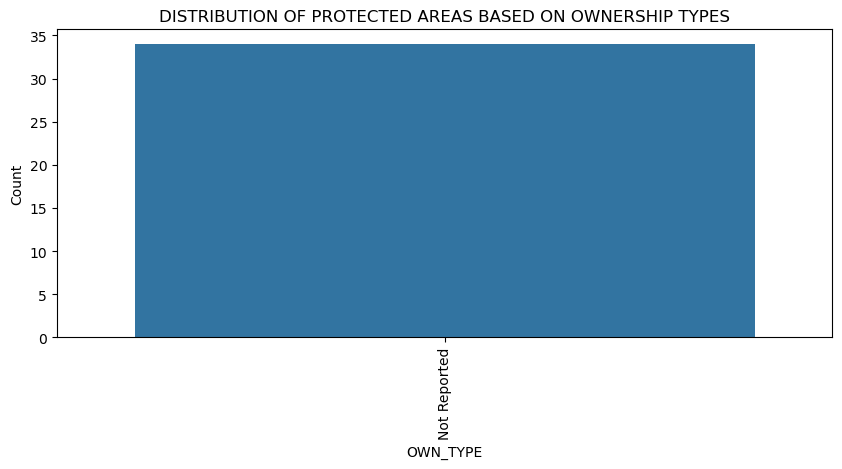

In [33]:
# Check distribution of ownership type of protected areas
plt.figure(figsize=(10, 4))
sns.countplot(x="OWN_TYPE",
              data=ctry_protected_areas,
              order=ctry_protected_areas["OWN_TYPE"].value_counts().index,
              color="#1f77b4")
plt.xticks(rotation=90)
plt.title("DISTRIBUTION OF PROTECTED AREAS BASED ON OWNERSHIP TYPES")
plt.xlabel("OWN_TYPE")
plt.ylabel("Count")

# Display plot
plt.show()

**Observation**

All of the country's protected areas are categorized as not-reported, indicating a lack of specific ownership structure data.

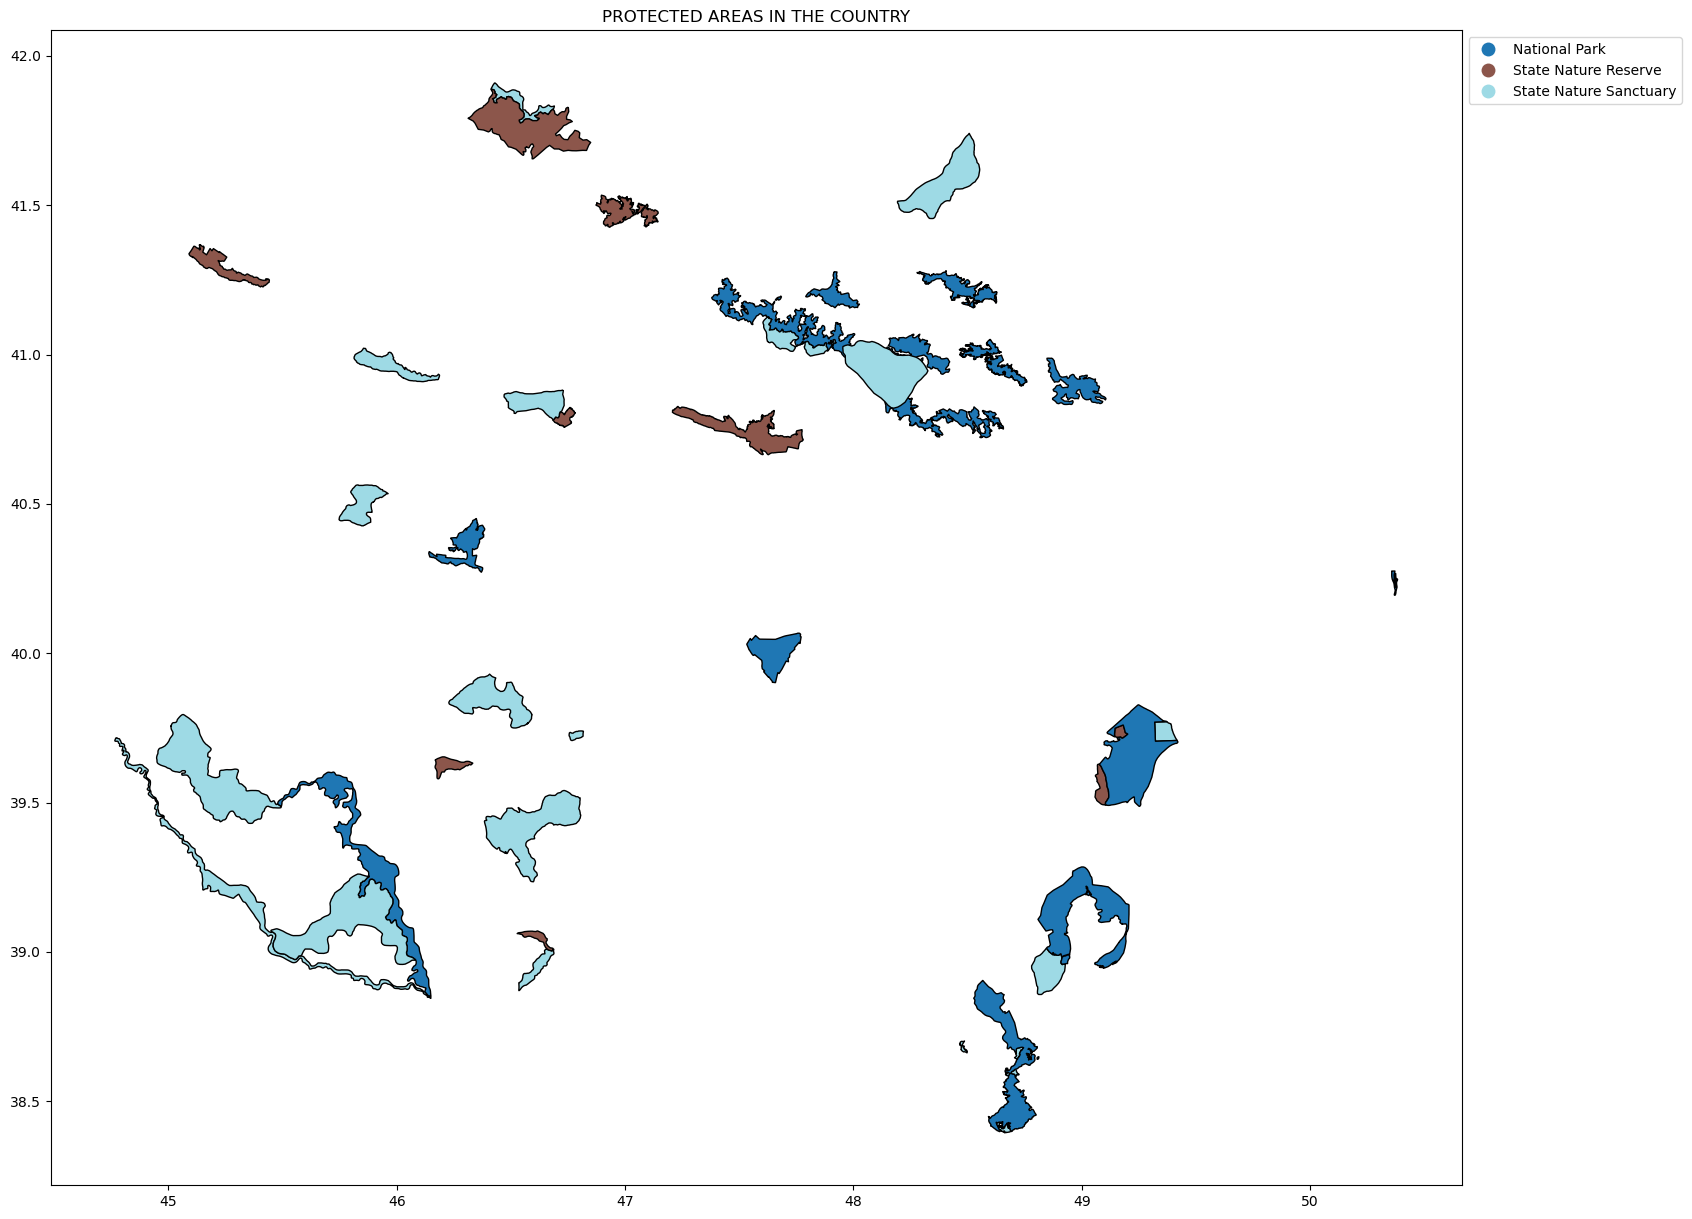

In [34]:
# Create plot
fig, ax = plt.subplots(figsize=(20, 15))

# Plot the protected areas
ctry_protected_areas.plot(ax=ax, cmap="tab20", column="DESIG", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, edgecolor="black")
ax.set_title("PROTECTED AREAS IN THE COUNTRY")

# Display plot
plt.show()

**Observation**

The map illustrates the distribution of 3 distinct protected areas in Azerbaijan. Notably, the State Nature Sanctuary emerges as the most prevalent protected area, with a total of 17 occurrences throughout the country.

    3.2 ROADS

In [35]:
# Read the json into geodataframe
open_globalroads = gpd.read_file("Global Roads Open Access Data Set_dissolved.json")

In [36]:
open_globalroads.head(2)

OBJECTID ONME  FCLASS  SRFTPE  ISSEASONAL  CURNTPRAC  GDWTHRPRAC  \
0         1  NaN       0     0.0         0.0        NaN         NaN   
1         2  NaN       0     0.0         0.0        NaN         NaN   

   SUM_LENGTH_KM                                           geometry  
0    16686.65607  LINESTRING (-66.82451 17.98029, -66.82455 17.9...  
1    16686.65607  LINESTRING (-66.62012 17.98131, -66.62126 17.9...

In [37]:
# Extract information for ctry roads only
# Overlay to get roads within ctry's boundaries
ctry_roads = gpd.overlay(open_globalroads, admin, how="intersection")

# Display the information for ctry
ctry_roads.head(2)

OBJECTID ONME  FCLASS  SRFTPE  ISSEASONAL  CURNTPRAC  GDWTHRPRAC  \
0    558695            0     0.0         0.0        0.0         0.0   
1    558942            0     0.0         0.0        0.0         0.0   

   SUM_LENGTH_KM country ISO3166_2        name      enname     locname  \
0   6.113355e+06     AZE            Azerbaijan  Azerbaijan  Azərbaycan   
1   6.113355e+06     AZE            Azerbaijan  Azerbaijan  Azərbaycan   

                   offname        boundary  adminlevel wikidata  \
0  Azərbaycan Respublikası  administrative           2     Q227   
1  Azərbaycan Respublikası  administrative           2     Q227   

       wikimedia           timestamp  \
0  az:Azərbaycan 2019-08-28 22:02:02   
1  az:Azərbaycan 2019-08-28 22:02:02   

                                            geometry  
0  LINESTRING (48.31767 38.60382, 48.31756 38.604...  
1  LINESTRING (48.86990 38.44679, 48.87255 38.44031)

    3.21 UNDERSTAND THE DATA

In [38]:
# Check no.of rows and columns for global roads dataframe
open_globalroads.shape

(1101300, 9)

In [39]:
# Check no.of rows and columns for ctry's roads dataframe
ctry_roads.shape

(1034, 20)

The increase in the number of columns is attributed to the overlay performed within the country's boundaries.

In [40]:
# Check for unique value and their counts in the selected column
ctry_roads["FCLASS"].value_counts()

0    752
5    282
Name: FCLASS, dtype: int64

This shows the unique values and respective counts in the "FCLASS" column.

In [41]:
# View all column titles in the dataframe
ctry_roads.columns

Index(['OBJECTID', 'ONME', 'FCLASS', 'SRFTPE', 'ISSEASONAL', 'CURNTPRAC',
       'GDWTHRPRAC', 'SUM_LENGTH_KM', 'country', 'ISO3166_2', 'name', 'enname',
       'locname', 'offname', 'boundary', 'adminlevel', 'wikidata', 'wikimedia',
       'timestamp', 'geometry'],
      dtype='object')

The above shows the names of the columns.

In [42]:
# Check the data-type of each column
ctry_roads.dtypes

OBJECTID                  int64
ONME                     object
FCLASS                    int64
SRFTPE                  float64
ISSEASONAL              float64
CURNTPRAC               float64
GDWTHRPRAC              float64
SUM_LENGTH_KM           float64
country                  object
ISO3166_2                object
name                     object
enname                   object
locname                  object
offname                  object
boundary                 object
adminlevel                int64
wikidata                 object
wikimedia                object
timestamp        datetime64[ns]
geometry               geometry
dtype: object

The above shows the data types for each column.

In [43]:
# Check information about the dataframe
ctry_roads.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   OBJECTID       1034 non-null   int64         
 1   ONME           1034 non-null   object        
 2   FCLASS         1034 non-null   int64         
 3   SRFTPE         1034 non-null   float64       
 4   ISSEASONAL     1034 non-null   float64       
 5   CURNTPRAC      1034 non-null   float64       
 6   GDWTHRPRAC     1034 non-null   float64       
 7   SUM_LENGTH_KM  1034 non-null   float64       
 8   country        1034 non-null   object        
 9   ISO3166_2      1034 non-null   object        
 10  name           1034 non-null   object        
 11  enname         1034 non-null   object        
 12  locname        1034 non-null   object        
 13  offname        1034 non-null   object        
 14  boundary       1034 non-null   object        
 15  adminlevel   

This provides basic information about the dataframe. It contains categorical values, which are represented by columns with 'object' data types, numerical values, which are represented with 'int64' and 'float64' data types, and geometric data, which is stored in columns with 'geometry' data types. Geometric data represents spatial or geographic information.

In [44]:
# Check the coordinate system of the dataframe
ctry_roads.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The Coordinate system of the dataframe is 4326, which is the WGS 84 coordinate system.

In [45]:
# Check the geometric type of the dataframe
ctry_roads.geom_type

0       LineString
1       LineString
2       LineString
3       LineString
4       LineString
           ...    
1029    LineString
1030    LineString
1031    LineString
1032    LineString
1033    LineString
Length: 1034, dtype: object

The records for the dataframe has the linestring geometric type.

     3.22 COMPREHENSIVE ANALYSIS

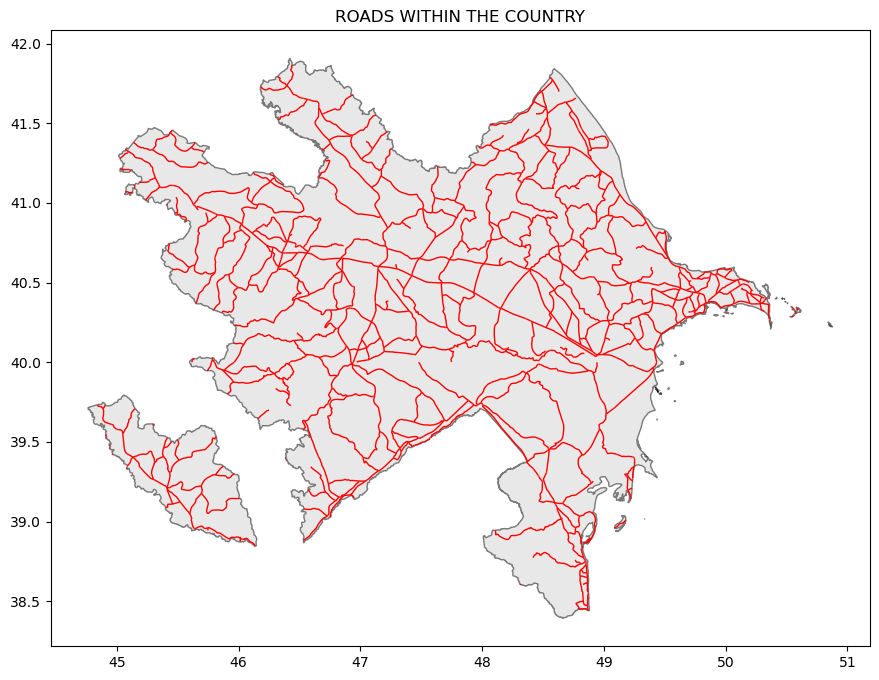

In [46]:
# Plot ctry's boundaries and the roads
fig, ax = plt.subplots(figsize=(12, 8))

# Plot ctry's boundaries
admin.plot(ax=ax, color="lightgray", edgecolor="black", alpha=0.5)

# Plot roads within the country
ctry_roads.plot(ax=ax, color="red", linewidth=1)

plt.title("ROADS WITHIN THE COUNTRY")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_10424\853786176.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("rainbow", len(road_categories))


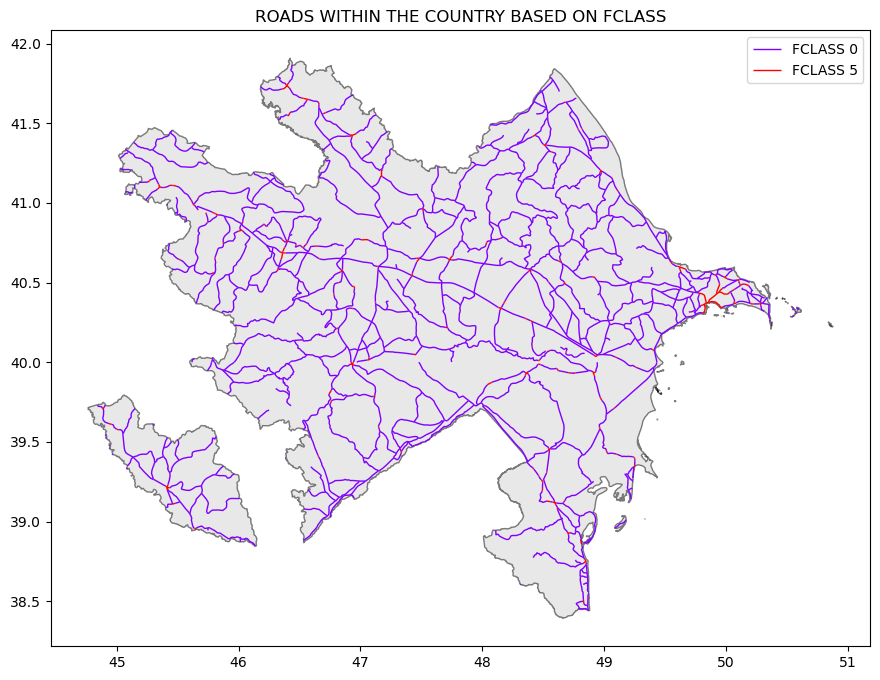

In [47]:
# Plot ctry's boundaries
fig, ax = plt.subplots(figsize=(12, 8))
admin.plot(ax=ax, color="lightgray", edgecolor="black", alpha=0.5)

# Categorize roads based on FCLASS
road_categories = ctry_roads["FCLASS"].unique()
colors = plt.cm.get_cmap("rainbow", len(road_categories))

# Plot roads based on FCLASS
for i, category in enumerate(road_categories):
    roads_subset = ctry_roads[ctry_roads["FCLASS"] == category]
    roads_subset.plot(ax=ax, color=colors(i), linewidth=1, label=f'FCLASS {category}')

plt.title("ROADS WITHIN THE COUNTRY BASED ON FCLASS")
plt.legend()

# Dsplay plot
plt.show()

**Observation**

The observation highlights the road network infrastructure in Azerbaijan, revealing that roads classified as FCLASS 0 are the most prevalent, while those classified as FCLASS 5 are notably scarce. This distribution pattern suggests a significant presence of unspecified roads, indicating areas where road designations may require further clarification or documentation.

     3.3 ADMINISTRATIVE OVERVIEW 

**Overview**

Azerbaijan, with an area spanning approximately 86 billion square meters, comprises 63 unique districts, with Artsakh Republic being the largest in terms of size. However, there are notable data quality issues regarding the ownership structure of protected areas, as all protected areas are categorized as not-reported, indicating a lack of specific ownership data. Despite this, Azerbaijan boasts a total of 34 protected areas across 3 distinct categories, with the STate Nature Santuarybeing the most prevalent, totaling 17 occurrences nationwide.

In terms of infrastructure, Azerbaijan's road network reveals an interesting pattern, with roads classified as FCLASS 0 being the most prevalent, while those categorized as FCLASS 5 are relatively scarce. This distribution highlights a significant presence of unspecified roads, signaling areas where further clarification or documentation of road designations may be necessary. Addressing these data quality issues is essential for comprehensive analysis and effective decision-making in Azerbaijan's land sector.

#### 4. BIOCLIMATIC AND ECOLOGICAL ZONES

    4.0 BIODIVERSITY HOTSPOTS

In [49]:
# Read the json into geodataframe
biodiv_hotspots = gpd.read_file("CI_BiodiversityHotspots.geojson")

In [50]:
biodiv_hotspots.head(2)

OBJECTID                                           NAME          Type  \
0         1  Chilean Winter Rainfall and Valdivian Forests  hotspot area   
1         2  Chilean Winter Rainfall and Valdivian Forests   outer limit   

   Shape_Length  Shape_Area                                           geometry  
0    200.706891   40.754665  MULTIPOLYGON (((-74.59792 -46.92502, -74.61111...  
1    191.174978  186.085694  POLYGON ((-70.30946 -22.96028, -70.48596 -22.7...

In [51]:
# Extract information for ctry's biodiversity hotspots
ctry_biohotspots = biodiv_hotspots.clip(admin)
ctry_biohotspots = ctry_biohotspots.reset_index(drop=True)

In [52]:
ctry_biohotspots.head(2)

OBJECTID             NAME          Type  Shape_Length  Shape_Area  \
0        15  Irano-Anatolian  hotspot area    184.772290   90.307526   
1        10         Caucasus  hotspot area     90.689909   58.514955   

                                            geometry  
0  MULTIPOLYGON (((46.72257 39.02821, 46.71137 39...  
1  MULTIPOLYGON (((50.30311 40.47694, 50.30364 40...

    4.01 UNDERSTAND THE DATA

In [53]:
# Check no.of rows and columns for global biodiversity hotspots dataframe
biodiv_hotspots.shape

(53, 6)

In [54]:
# Check no.of rows and columns for ctry's biodiversity hotspots dataframe
ctry_biohotspots.shape

(2, 6)

In [55]:
# View all column titles in the dataframe
ctry_biohotspots.columns

Index(['OBJECTID', 'NAME', 'Type', 'Shape_Length', 'Shape_Area', 'geometry'], dtype='object')

The above shows the names of the columns.

In [56]:
# Check the data-type of each column
ctry_biohotspots.dtypes

OBJECTID           int64
NAME              object
Type              object
Shape_Length     float64
Shape_Area       float64
geometry        geometry
dtype: object

The above shows the data types for each column.

In [57]:
# Check information about the dataframe
ctry_biohotspots.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   OBJECTID      2 non-null      int64   
 1   NAME          2 non-null      object  
 2   Type          2 non-null      object  
 3   Shape_Length  2 non-null      float64 
 4   Shape_Area    2 non-null      float64 
 5   geometry      2 non-null      geometry
dtypes: float64(2), geometry(1), int64(1), object(2)
memory usage: 228.0+ bytes


This provides basic information about the dataframe. It contains categorical values, which are represented by columns with 'object' data types, numerical values, which are represented with 'int64' and 'float 64' data types, and geometric data, which is stored in columns with 'geometry' data types. Geometric data represents spatial or geographic information.

In [58]:
# Check the coordinate system of the dataframe
ctry_biohotspots.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The Coordinate system of the dataframe is 4326, which is the WGS 84 coordinate system.

In [59]:
# Check the geometric type of the dataframe
ctry_biohotspots.geom_type

0    MultiPolygon
1    MultiPolygon
dtype: object

All records for the dataframe have the multipolygon geometric type.

    4.02 COMPREHENSIVE ANALYSIS

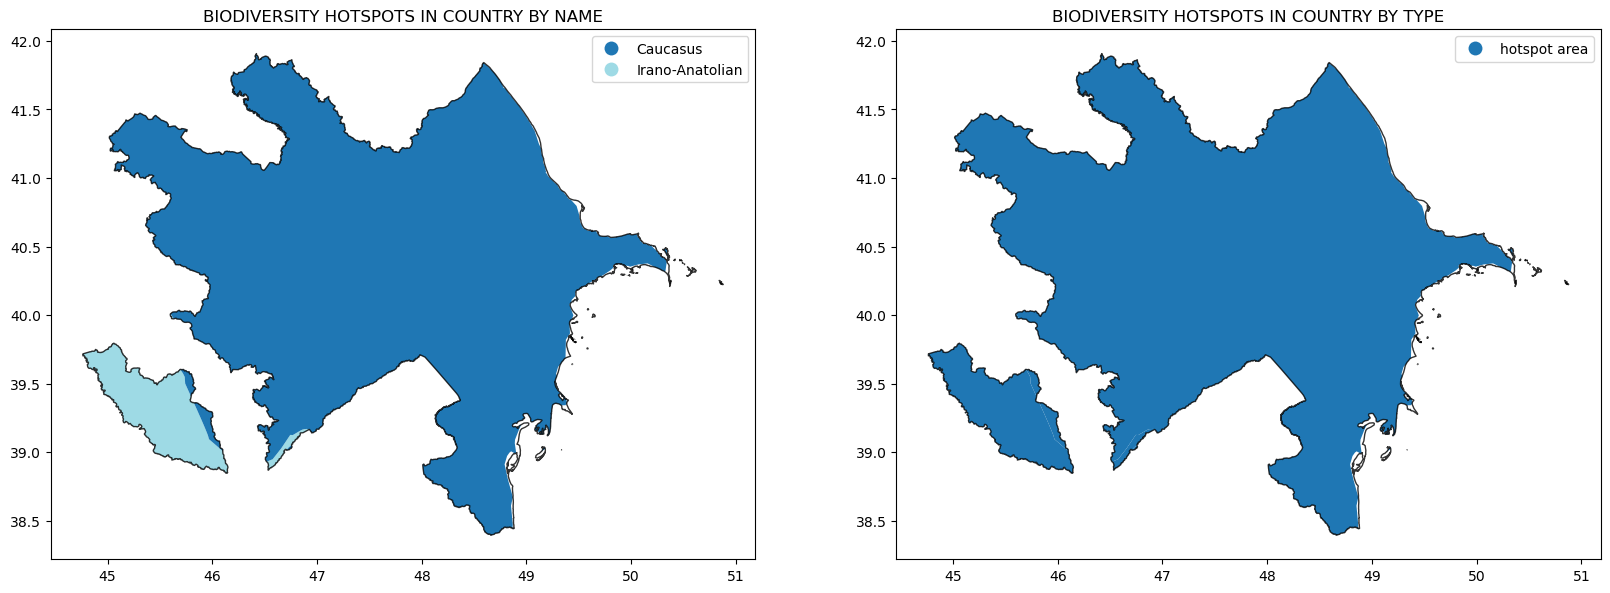

In [60]:
 # Create subplot with two panels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15))

# Plot the hotspots by name in panel 1
ctry_biohotspots.plot(column="NAME", cmap="tab20", ax=ax1, legend=True)
admin.plot(ax=ax1, color="none", edgecolor="black", alpha = 0.8)
ax1.set_title("BIODIVERSITY HOTSPOTS IN COUNTRY BY NAME")

# Plot the hotspots by type in panel 2
ctry_biohotspots.plot(column="Type", cmap="tab20", ax=ax2, legend=True)
admin.plot(ax=ax2, color="none", edgecolor="black", alpha = 0.8)
ax2.set_title("BIODIVERSITY HOTSPOTS IN COUNTRY BY TYPE")

# Display the plot
plt.show()

**Observation**

Azerbaijan harbors two distinct biodiversity hotspots, with the Caucasus being the largest among them. Remarkably, both hotspots share the same biodiversity hotspot type, indicating similar ecological characteristics and conservation significance across these regions.

    4.1 ECOLOGICAL ZONES

In [61]:
# Read geojson file into a geodataframe
gez = gpd.read_file("AZE_AL2_Azerbaijan_GEZ.json")

In [62]:
gez.head(2)

country ISO3166_2        name                     gez_name  gez_code  \
0     AZE            Azerbaijan     Subtropical humid forest        21   
1     AZE            Azerbaijan  Subtropical mountain system        25   

  gez_abbrev  adminlevel                                           geometry  
0        SCf           2  MULTIPOLYGON (((48.89330 38.88593, 48.89726 38...  
1         SM           2  MULTIPOLYGON (((48.18357 38.95154, 48.18357 38...

In [63]:
# Read geojson file into a geodataframe
gezstates = gpd.read_file("AZE_ALL_states_GEZ.json")

In [64]:
gezstates.head(2)

country ISO3166_2                name                  gez_name  gez_code  \
0     AZE    AZ-AST     Astara District  Subtropical humid forest        21   
1     AZE    AZ-CAL  Jalilabad District  Subtropical humid forest        21   

  gez_abbrev  adminlevel                                           geometry  
0        SCf           4  POLYGON ((48.87443 38.62658, 48.86201 38.62726...  
1        SCf           4  POLYGON ((48.60950 39.10362, 48.58947 39.11364...

    4.11 UNDERSTAND THE DATA

        COUNTRY ECOLOGICAL ZONES

In [65]:
# Check for unique value and their counts in the selected column
gez["gez_name"].value_counts()

Subtropical humid forest        1
Subtropical mountain system     1
Temperate continental forest    1
Temperate desert                1
Temperate mountain system       1
Water                           1
Name: gez_name, dtype: int64

In [66]:
# Check no.of rows and columns for ctry's ecological zones
gez.shape

(6, 8)

In [67]:
# View all column titles in the dataframe
gez.columns

Index(['country', 'ISO3166_2', 'name', 'gez_name', 'gez_code', 'gez_abbrev',
       'adminlevel', 'geometry'],
      dtype='object')

The above shows the names of the columns.

In [68]:
# Check information about the dataframe
gez.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   country     6 non-null      object  
 1   ISO3166_2   6 non-null      object  
 2   name        6 non-null      object  
 3   gez_name    6 non-null      object  
 4   gez_code    6 non-null      int64   
 5   gez_abbrev  6 non-null      object  
 6   adminlevel  6 non-null      int64   
 7   geometry    6 non-null      geometry
dtypes: geometry(1), int64(2), object(5)
memory usage: 516.0+ bytes


This provides basic information about the dataframe. It contains categorical values, which are represented by columns with 'object' data types, numerical values, which are represented with 'int64' data types, and geometric data, which is stored in columns with 'geometry' data types. Geometric data represents spatial or geographic information.

In [69]:
# Check the coordinate system of the dataframe
gez.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The Coordinate system of the dataframe is 4326, which is the WGS 84 coordinate system.

In [70]:
# Check the geometric type of the dataframe
gez.geom_type

0    MultiPolygon
1    MultiPolygon
2    MultiPolygon
3    MultiPolygon
4         Polygon
5    MultiPolygon
dtype: object

The records for the dataframe has both the multipolygon and polygon geometric type.

       ALL STATES ECOLOGICAL ZONES

In [71]:
gezstates["gez_name"].value_counts()

Temperate desert                52
Temperate continental forest    38
Temperate mountain system       12
Water                           12
Subtropical mountain system     10
Subtropical humid forest         7
Name: gez_name, dtype: int64

This analysis shows the unique values and respective counts in the "gez_name" column on state levels for the country.

Note: Further analyses on states ecological zones is deemed unnecessary to avoid redundancy.

    4.12 COMPREHENSIVE ANALYSIS

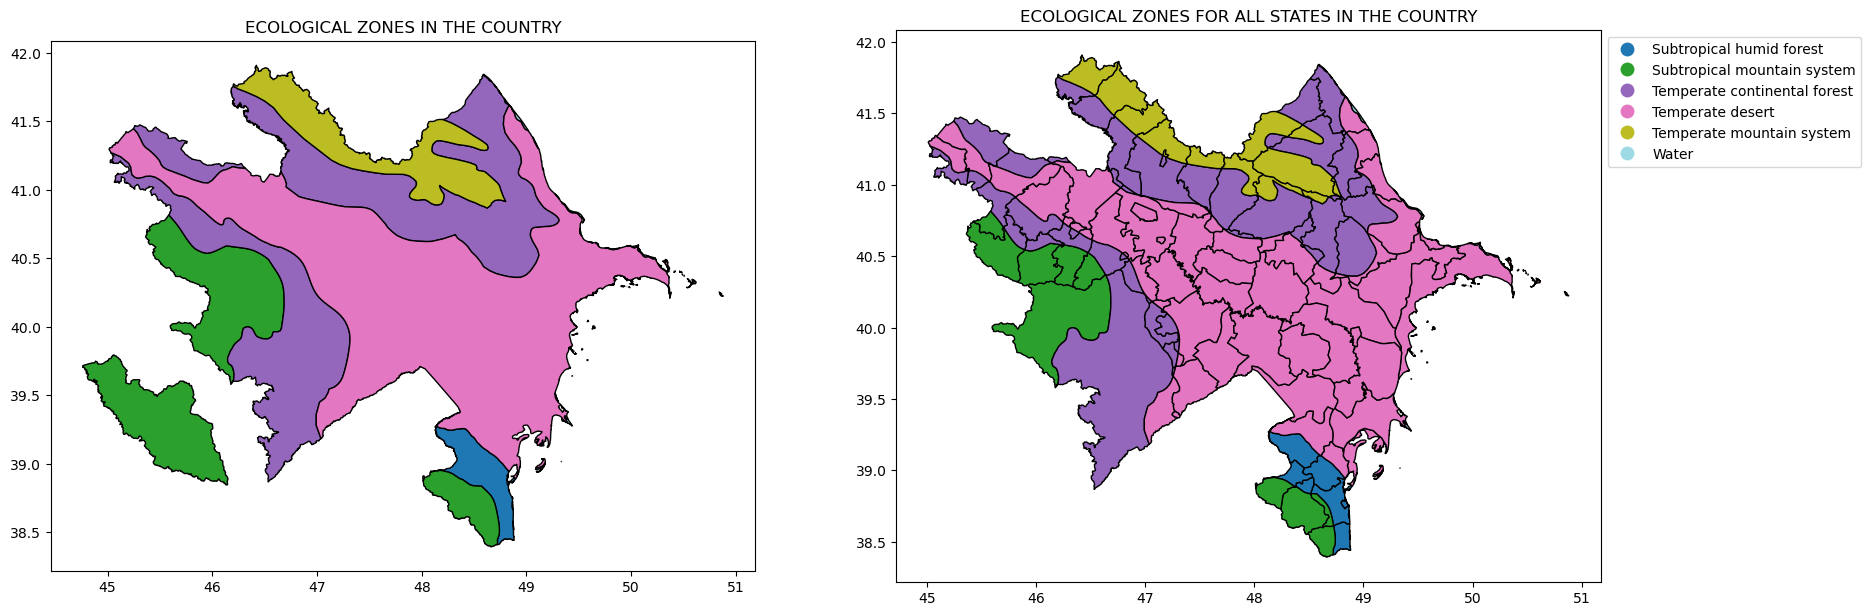

In [72]:
# Create subplot with two panels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15))

# Plot the ecological zones of ctry in panel 1
gez.plot(ax=ax1, cmap="tab20", column="gez_name", edgecolor="black")
ax1.set_title("ECOLOGICAL ZONES IN THE COUNTRY")

# Plot the ecological zones of all states in panel 2
gezstates.plot(ax=ax2,column="gez_name", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, cmap="tab20", edgecolor="black")
ax2.set_title("ECOLOGICAL ZONES FOR ALL STATES IN THE COUNTRY")

# Display plot
plt.show()

**Observation**

Azerbaijan's ecological landscape reveals the Temperate desert as its largest ecological zone, spanning across different districts within the country. Interestingly, certain districts exhibit a combination of two distinct ecological zones, adding to the complexity of Azerbaiajan's environmental makeup. Moreover, water plays a significant role as part of the ecological zone in this country, highlighting the interconnectedness of land and water systems in shaping Azerbaiajan's natural environment.

    4.2 AGROECOLOGICAL ZONES

In [73]:
# Read geojson file into a geodataframe
aeczones = gpd.read_file("GlobalAgroEcologicalZones_GAEZ.geojson")

In [74]:
aeczones.head(2)

Value                                           geometry
0      1  POLYGON ((-33.50000 83.65000, -33.50000 83.500...
1      1  POLYGON ((-37.85000 83.60000, -37.85000 83.500...

    4.21 UNDERSTAND THE DATA

In [75]:
# Check no.of rows and columns for global ecological zones
aeczones.shape

(116675, 2)

In [76]:
# Check for unique values present in the value column
aeczones["Value"].unique()

array([ 1,  2, 18, 14, 11, 12, 13,  5, 10,  9, 17,  8, 16, 15,  4,  6,  7,
        3], dtype=int64)

This shows the unique values and respective counts in the "Value" column.

In [77]:
# Fix the data and replace numbers with acgroecological zones

values = {"1": "Tropical-Arid", "2": "Tropical-Dry Semi-Arid", "3": "Tropical -Moist Semi-Arid", "4": "Tropical-Sub-Humid", "5": "Tropical-Humid", 
          "6": "Tropical-Humid (year round)", "7": "Temperate-Arid", "8": "Temperate-Dry Semi-Arid", "9": "Temperate-Moist Semi-Arid", 
          "10": "Temperate-Sub-Humid", "11": "Temperate-Humid", "12": "Temperate-Humid (year round)", "13": "Boreal-Arid", 
          "14": "Boreal-Dry Semi-Arid", "15": "Boreal-Moist Semi-Arid", "16": "Boreal-Sub-humid", "17": "Boreal-Humid", 
          "18": "Boreal-Humid (year round)"}

In [78]:
# Standardize the column names
aeczones.columns = aeczones.columns.str.lower()

In [79]:
# Rename class name
aeczones.value = aeczones.value.astype("str").replace(values)

In [80]:
# Check to see replaced values
aeczones.head(2)

value                                           geometry
0  Tropical-Arid  POLYGON ((-33.50000 83.65000, -33.50000 83.500...
1  Tropical-Arid  POLYGON ((-37.85000 83.60000, -37.85000 83.500...

In [81]:
# Extract ctry's agroecological zones
ctry_aeczones = aeczones.clip(admin)
ctry_aeczones = ctry_aeczones.reset_index(drop=True)

In [82]:
ctry_aeczones.head(2)

value                                           geometry
0     Tropical-Arid  MULTIPOLYGON (((48.35000 39.00000, 48.35000 39...
1  Boreal-Sub-humid  POLYGON ((48.75000 38.50000, 48.87662 38.50000...

In [83]:
# Check for the no. of rows and columns in the dataframe
ctry_aeczones.shape

(170, 2)

In [84]:
# View all column titles in the dataframe
ctry_aeczones.columns

Index(['value', 'geometry'], dtype='object')

The above shows the names of the columns.

In [85]:
# Check for unique value and their counts in the selected column
ctry_aeczones["value"].value_counts()

Tropical-Sub-Humid              28
Temperate-Sub-Humid             24
Temperate-Moist Semi-Arid       20
Tropical-Humid                  15
Temperate-Arid                  14
Tropical-Humid (year round)     14
Tropical-Arid                   11
Temperate-Humid                 11
Temperate-Humid (year round)    10
Temperate-Dry Semi-Arid          9
Boreal-Arid                      8
Boreal-Dry Semi-Arid             4
Boreal-Sub-humid                 1
Boreal-Humid (year round)        1
Name: value, dtype: int64

This shows the unique values and respective counts in the "value" column.

In [86]:
# Check the data-type of each column
ctry_aeczones.dtypes

value         object
geometry    geometry
dtype: object

The above shows the data types for each column.

In [87]:
# Check information about the dataframe
ctry_aeczones.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   value     170 non-null    object  
 1   geometry  170 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 2.8+ KB


This provides basic information about the dataframe. It contains categorical values, which are represented by columns with 'object' data types and geometric data, which is stored in columns with 'geometry' data types. Geometric data represents spatial or geographic information.

In [88]:
# Check the coordinate system of the dataframe
ctry_aeczones.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The Coordinate System of the dataframe is 4326, which is the WGS 84 Coordinate System.

In [89]:
# Check the geometric type of the dataframe
ctry_aeczones.geom_type

0      MultiPolygon
1           Polygon
2           Polygon
3           Polygon
4      MultiPolygon
           ...     
165         Polygon
166         Polygon
167         Polygon
168         Polygon
169         Polygon
Length: 170, dtype: object

The records for the dataframe have the polygon and multipolgon geometric type.

    4.22 COMPREHENSIVE ANALYSIS

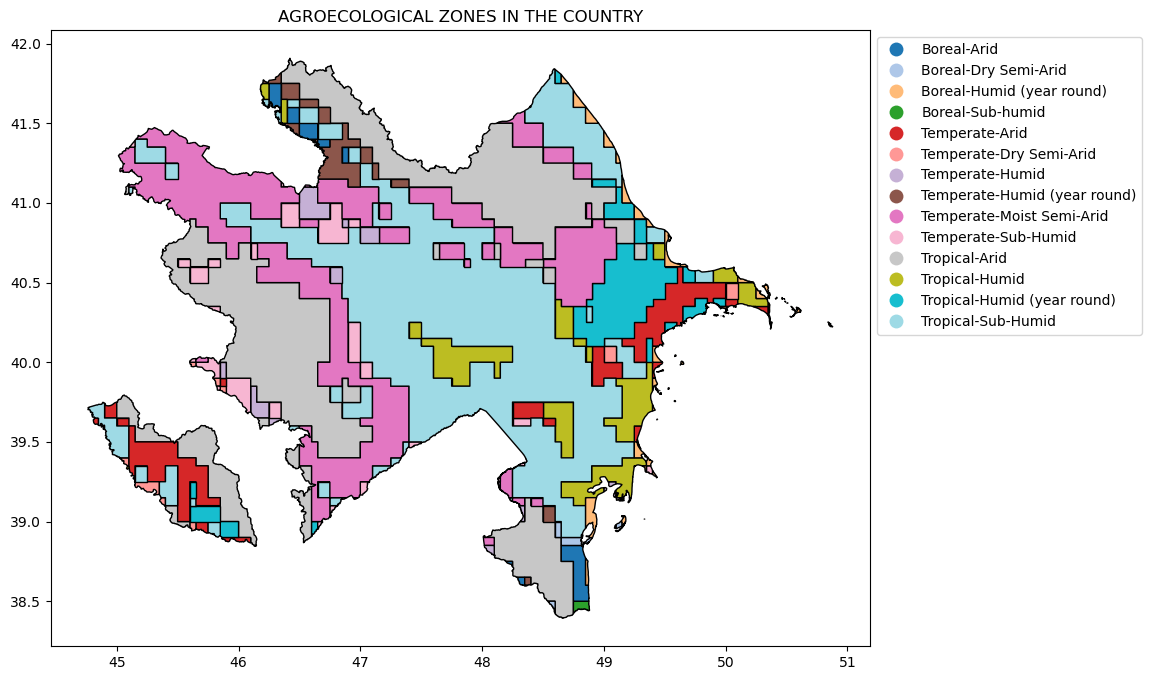

In [90]:
# Create plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the agroecological zones
ctry_aeczones.plot(ax=ax, cmap="tab20", column="value", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, edgecolor="black")
ax.set_title("AGROECOLOGICAL ZONES IN THE COUNTRY")

# Display plot
plt.show()

**Observation**

The agroecological landscape in Azerbaijan is dominated by the Tropical-Sub-Humid zone, which covers a large geographic area and is the most prevalent. Following closely is the Temperate-Sub-Humid zone. This observation emphasizes the significance of these zones in shaping agricultural practices, climate patterns, and ecological dynamics within Azerbaijan.

    4.3 HOLDRIDGE LIFEZONES

In [91]:
# Read geojson file into a geodataframe
hldridge = gpd.read_file("HoldridgeLifeZones.json")

In [92]:
hldridge.head(2)

FID    AREA  PERIMETER  HOLDRIG_  HOLDRIG_ID  ZONE  CASE_  FREQUENCY  \
0    0  240.50        173         2        3695     1      2         13   
1    1    1.25          6         3         110     2      3        232   

           DESC  SYMBOL                                           geometry  
0           Ice       5  POLYGON ((-61.00000 81.00000, -61.50000 81.000...  
1  Polar desert       5  POLYGON ((-80.50000 83.00000, -81.00000 83.000...

In [93]:
# Extract information for ctry's holdridge
ctry_hldridge = hldridge.clip(admin)
ctry_hldridge = ctry_hldridge.reset_index(drop=True)

In [94]:
ctry_hldridge.head(2)

FID   AREA  PERIMETER  HOLDRIG_  HOLDRIG_ID  ZONE  CASE_  FREQUENCY  \
0  1718  21.75         49      1720        4125    14     15        156   
1  1797   1.25          6      1799        1127    15     16        246   

                          DESC  SYMBOL  \
0        Cool temperate steppe     120   
1  Cool temperate moist forest     110   

                                            geometry  
0  MULTIPOLYGON (((45.50000 39.50000, 45.48073 39...  
1  MULTIPOLYGON (((48.50000 39.50000, 48.50000 39...

    4.31 UNDERSTAND THE DATA

In [95]:
# Check no.of rows and columns for global holdridge life zones
hldridge.shape

(4831, 11)

The dataframe has 4831 rows and 11 columns

In [96]:
# Check no.of rows and columns for ctry's holdridge life zones
ctry_hldridge.shape

(29, 11)

In [97]:
# View all column titles in the dataframe
ctry_hldridge.columns

Index(['FID', 'AREA', 'PERIMETER', 'HOLDRIG_', 'HOLDRIG_ID', 'ZONE', 'CASE_',
       'FREQUENCY', 'DESC', 'SYMBOL', 'geometry'],
      dtype='object')

The above shows the names of the columns.

In [98]:
# Check for unique value and their counts in the selected column
ctry_hldridge["DESC"].value_counts()

Cool temperate steppe          8
Cool temperate moist forest    4
Warm temperate thorn steppe    3
Cool temperate desert bush     3
Boreal moist forest            3
Warm temperate dry forest      2
Polar wet tundra               2
Warm temperate moist forest    1
Warm temperate desert bush     1
Polar desert                   1
                               1
Name: DESC, dtype: int64

This shows the unique values and respective counts in the "DESC" column.

In [99]:
# Check the data-type of each column
ctry_hldridge.dtypes

FID              int64
AREA           float64
PERIMETER        int64
HOLDRIG_         int64
HOLDRIG_ID       int64
ZONE             int64
CASE_            int64
FREQUENCY        int64
DESC            object
SYMBOL           int64
geometry      geometry
dtype: object

The above shows the data types for each column.

In [100]:
# Check information about the dataframe
ctry_hldridge.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FID         29 non-null     int64   
 1   AREA        29 non-null     float64 
 2   PERIMETER   29 non-null     int64   
 3   HOLDRIG_    29 non-null     int64   
 4   HOLDRIG_ID  29 non-null     int64   
 5   ZONE        29 non-null     int64   
 6   CASE_       29 non-null     int64   
 7   FREQUENCY   29 non-null     int64   
 8   DESC        29 non-null     object  
 9   SYMBOL      29 non-null     int64   
 10  geometry    29 non-null     geometry
dtypes: float64(1), geometry(1), int64(8), object(1)
memory usage: 2.6+ KB


This provides basic information about the dataframe. It contains categorical values, which are represented by columns with 'object' data types, numerical values, which are represented with 'int64'  and 'float64' data types, and geometric data, which is stored in columns with 'geometry' data types. Geometric data represents spatial or geographic information.

In [101]:
# Check the coordinate system of the dataframe
ctry_hldridge.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The Coordinate System of the dataframe is 4326, which is the WGS 84 Coordinate System.

In [102]:
# Check the geometric type of the dataframe
ctry_hldridge.geom_type

0     MultiPolygon
1     MultiPolygon
2          Polygon
3          Polygon
4     MultiPolygon
5     MultiPolygon
6          Polygon
7          Polygon
8     MultiPolygon
9          Polygon
10         Polygon
11         Polygon
12         Polygon
13         Polygon
14         Polygon
15         Polygon
16         Polygon
17         Polygon
18         Polygon
19    MultiPolygon
20         Polygon
21         Polygon
22    MultiPolygon
23         Polygon
24         Polygon
25         Polygon
26    MultiPolygon
27         Polygon
28    MultiPolygon
dtype: object

The records for the dataframe have the polygon and multipolygon geometric type.

    4.32 COMPREHENSIVE ANALYSIS

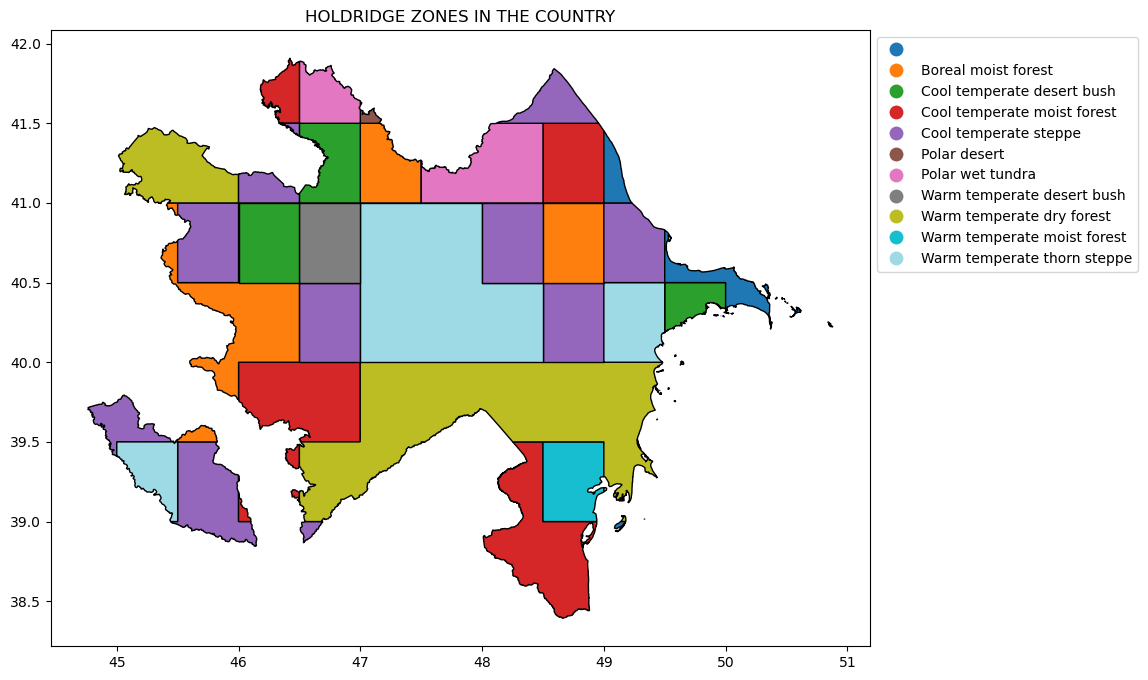

In [103]:
# Create plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the ctry's holdridge life zones
ctry_hldridge.plot(ax=ax, cmap="tab20", column="DESC", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, edgecolor="black")
ax.set_title("HOLDRIDGE ZONES IN THE COUNTRY")

# Display plot
plt.show()

**Observation**

Azerbaijan exhibits a diverse range of Holdridge life zones, with the  Cool temperate steppe being the most frequently occuring and the Warm temperate moist, Warm temperate desert bush, and Polar desert being less common

    4.4  TERRESTIAL ECOREGIONS

In [104]:
# Read geojson file into a geodataframe
terr_ecoregion = gpd.read_file("TerrestrialEcoregionsoftheWorld_WWF.geojson")

In [105]:
terr_ecoregion.head(2)

OBJECTID_1  OBJECTID       AREA                                 ECO_NAME  \
0           1         1  29.802942  Northern Mesoamerican Pacific mangroves   
1           2         2  11.977824  Northern Mesoamerican Pacific mangroves   

  REALM  BIOME  ECO_NUM  ECO_ID  ECO_SYM  GBL_STAT  ... G200_BIOME  G200_STAT  \
0    NT     14        4   61404      119         1  ...          0          0   
1    NT     14        4   61404      119         1  ...          0          0   

   area_km2  eco_code  BIOME_1 GBL_STAT_1     REALM_1 Shape_Length Shape_Area  \
0      8174    NT1404                      Neotropics     0.219475   0.002769   
1      8174    NT1404                      Neotropics     0.193289   0.001111   

                                            geometry  
0  POLYGON ((-112.30433 29.33480, -112.29035 29.3...  
1  POLYGON ((-112.19639 29.20719, -112.19669 29.2...  

[2 rows x 22 columns]

In [106]:
# Extract information for ctry's terrestial ecoregions
ctry_ecoregion = terr_ecoregion.clip(admin)
ctry_ecoregion = ctry_ecoregion.reset_index(drop=True)

In [107]:
ctry_ecoregion.head(2)

OBJECTID_1  OBJECTID           AREA                          ECO_NAME  \
0        7990      7619  168299.068449  Eastern Anatolian montane steppe   
1        3698      7746   53261.420273   Caspian Hyrcanian mixed forests   

  REALM  BIOME  ECO_NUM  ECO_ID  ECO_SYM  GBL_STAT  ... G200_BIOME  G200_STAT  \
0    PA      8        5   80805       88         1  ...          0          0   
1    PA      4        7   80407      221         1  ...          5          1   

   area_km2  eco_code  BIOME_1 GBL_STAT_1     REALM_1 Shape_Length Shape_Area  \
0    168382    PA0805                      Palearctic    45.734909  17.466327   
1     55132    PA0407                      Palearctic    26.386641   5.411352   

                                            geometry  
0  MULTIPOLYGON (((46.52471 38.94278, 46.57437 38...  
1  POLYGON ((48.17656 39.29008, 48.21569 39.28762...  

[2 rows x 22 columns]

    4.41 UNDERSTAND THE DATA

In [108]:
# Check no.of rows and columns for world terrestial ecoregions
terr_ecoregion.shape

(14351, 22)

In [110]:
# Check no.of rows and columns for ctry's terrestial ecoregions
ctry_ecoregion.shape

(4, 22)

In [111]:
# View all column titles in the dataframe
ctry_ecoregion.columns

Index(['OBJECTID_1', 'OBJECTID', 'AREA', 'ECO_NAME', 'REALM', 'BIOME',
       'ECO_NUM', 'ECO_ID', 'ECO_SYM', 'GBL_STAT', 'G200_REGIO', 'G200_NUM',
       'G200_BIOME', 'G200_STAT', 'area_km2', 'eco_code', 'BIOME_1',
       'GBL_STAT_1', 'REALM_1', 'Shape_Length', 'Shape_Area', 'geometry'],
      dtype='object')

The above shows the names of the columns.

In [112]:
# Check for unique value and their counts in the selected column
ctry_ecoregion["ECO_NAME"].value_counts()

Eastern Anatolian montane steppe      1
Caspian Hyrcanian mixed forests       1
Azerbaijan shrub desert and steppe    1
Caucasus mixed forests                1
Name: ECO_NAME, dtype: int64

This shows the unique values and respective counts in the "ECO_NAME" column.

In [113]:
# Check the data-type of each column
ctry_ecoregion.dtypes

OBJECTID_1         int64
OBJECTID           int64
AREA             float64
ECO_NAME          object
REALM             object
BIOME              int64
ECO_NUM            int64
ECO_ID             int64
ECO_SYM            int64
GBL_STAT           int64
G200_REGIO        object
G200_NUM           int64
G200_BIOME         int64
G200_STAT          int64
area_km2           int64
eco_code          object
BIOME_1           object
GBL_STAT_1        object
REALM_1           object
Shape_Length     float64
Shape_Area       float64
geometry        geometry
dtype: object

The above shows the data types for each column.

In [114]:
# Check information about the dataframe
ctry_ecoregion.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   OBJECTID_1    4 non-null      int64   
 1   OBJECTID      4 non-null      int64   
 2   AREA          4 non-null      float64 
 3   ECO_NAME      4 non-null      object  
 4   REALM         4 non-null      object  
 5   BIOME         4 non-null      int64   
 6   ECO_NUM       4 non-null      int64   
 7   ECO_ID        4 non-null      int64   
 8   ECO_SYM       4 non-null      int64   
 9   GBL_STAT      4 non-null      int64   
 10  G200_REGIO    4 non-null      object  
 11  G200_NUM      4 non-null      int64   
 12  G200_BIOME    4 non-null      int64   
 13  G200_STAT     4 non-null      int64   
 14  area_km2      4 non-null      int64   
 15  eco_code      4 non-null      object  
 16  BIOME_1       4 non-null      object  
 17  GBL_STAT_1    4 non-null      object  
 18  REALM_

This provides basic information about the dataframe. It contains categorical values, which are represented by columns with 'object' data types, numerical values, whuch are represented with 'int64' and 'float64' data types, and geometric data, which is stored in columns with 'geometry' data types. Geometric data represents spatial or geographic information.

In [115]:
# Check the coordinate system of the dataframe
ctry_ecoregion.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The Coordinate System of the dataframe is 4326, which is the WGS 84 Coordinate System.

In [116]:
# Check the geometric type of the dataframe
ctry_ecoregion.geom_type

0    MultiPolygon
1         Polygon
2    MultiPolygon
3    MultiPolygon
dtype: object

The records for the dataframe have polygon and multipolygon geometric type.

    4.42 COMPREHENSIVE ANALYSIS

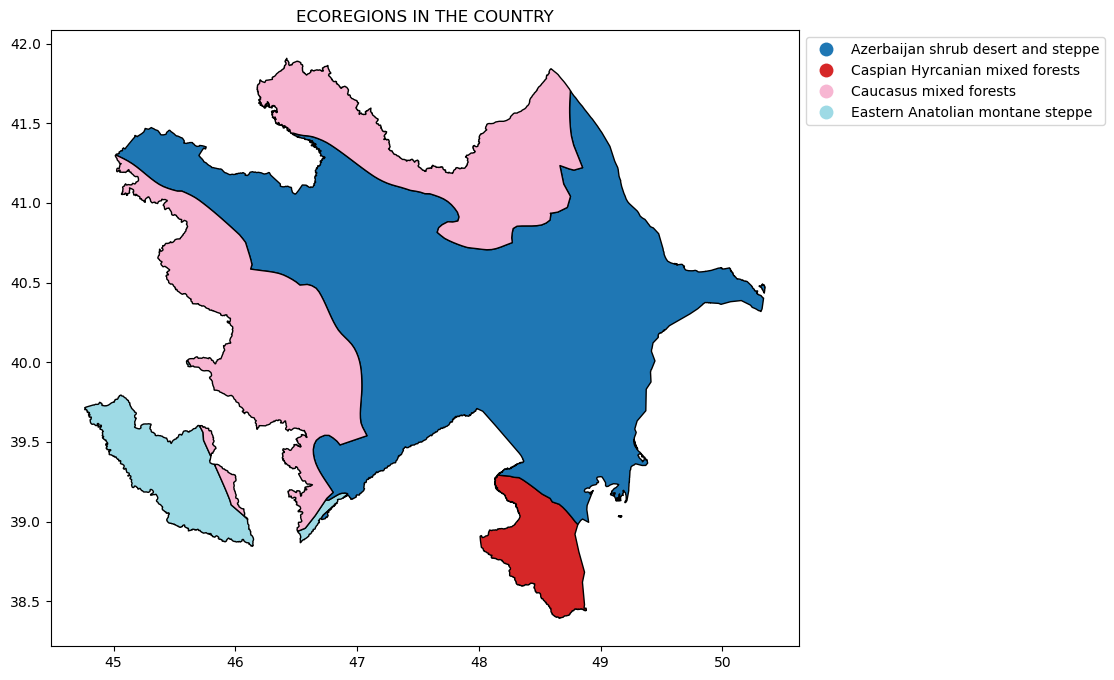

In [117]:
# Create plot for ecoregions
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the Arm's terrestial ecoregions
ctry_ecoregion.plot(ax=ax, cmap="tab20", column="ECO_NAME", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, edgecolor="black")
ax.set_title("ECOREGIONS IN THE COUNTRY")

# Display plot
plt.show()

In [118]:
# Create interactive map of the terrestial ecoregions in the country
ctry_ecoregion.explore()

**Observation**

Azerbaijan's ecological landscape comprises four main terrestrial ecoregions, with the Azerbaijan shrub desert and steppe emerging as the ecoregion with the widest coverage. Alongside this dominant ecoregion, the other three terrestrial ecoregions also play a significant role in shaping Azerbaijan's biodiversity and ecological dynamics.

       OVERLAPPING ANALYSIS OF ECOREGIONS AND BIODIVERSITY HOTSPOTS

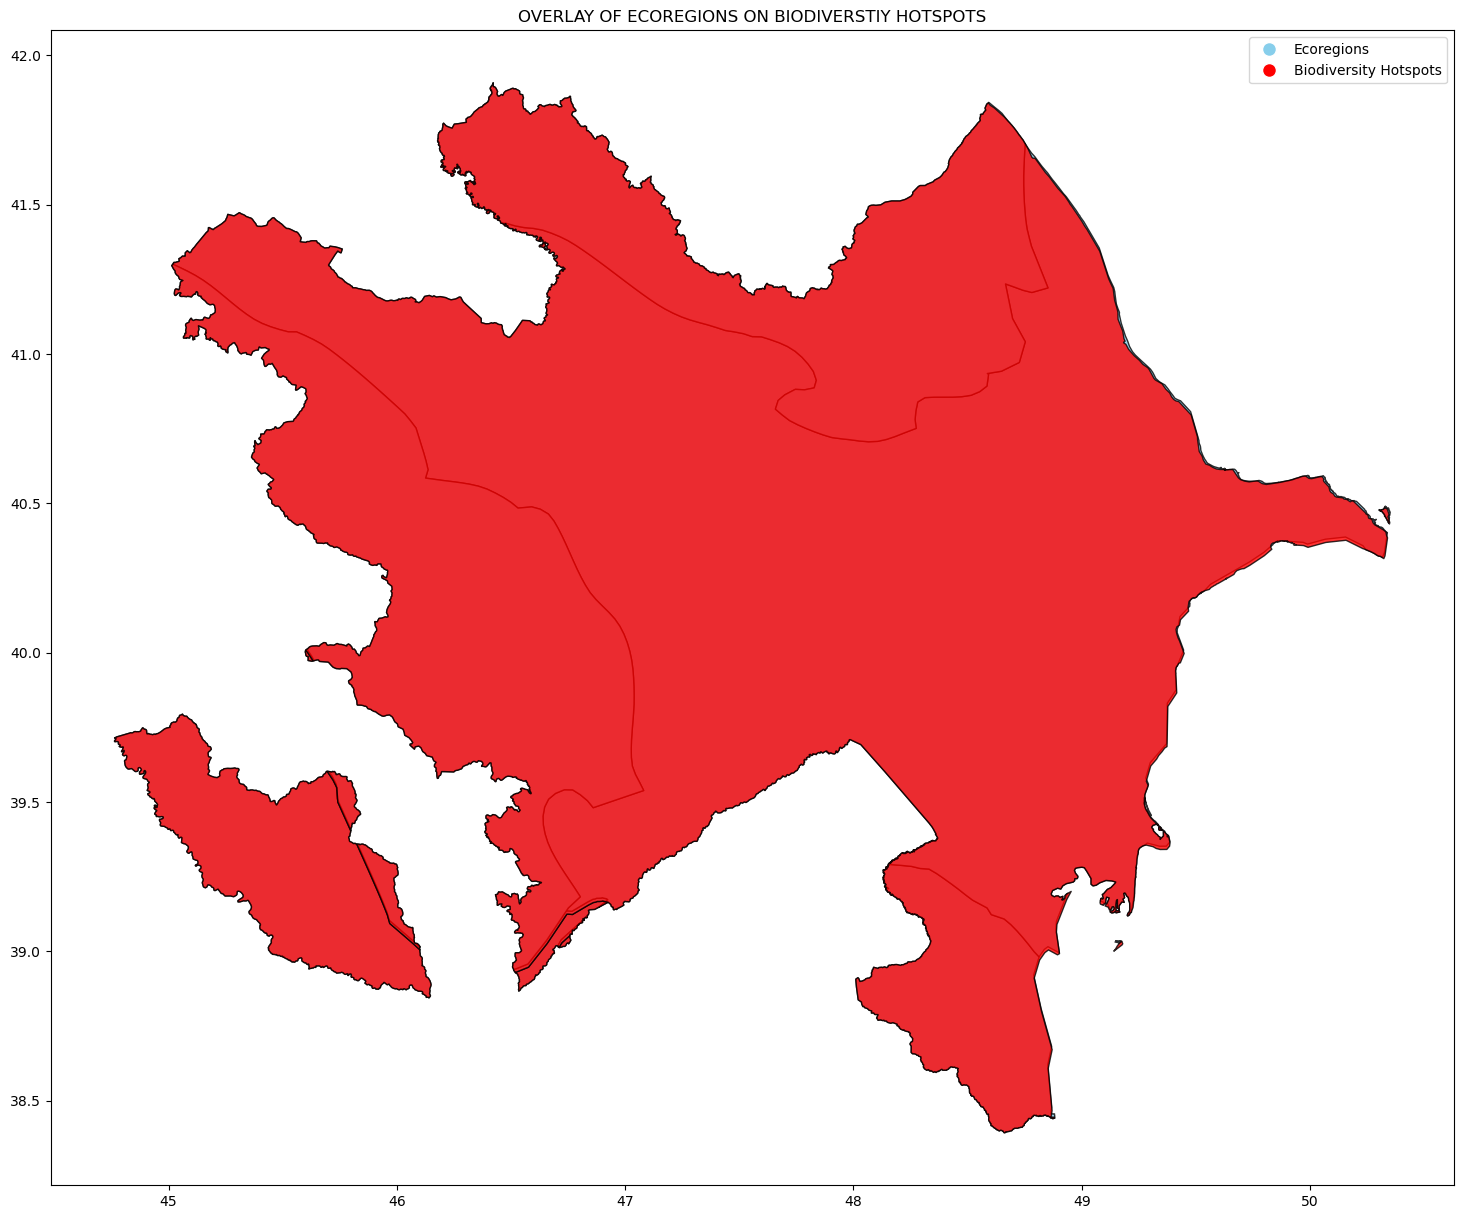

In [119]:
# Create subplot with one panel
fig, ax = plt.subplots(1, figsize=(20, 15))

# Plot ecoregions in panel 1
ecoregion_plot = ctry_ecoregion.plot(ax=ax, color="skyblue", edgecolor="black", alpha=0.8)

# Plot biodiversity hotspots on the same panel
biohotspots_plot = ctry_biohotspots.plot(ax=ax, color="red", edgecolor="black", alpha=0.8)

# Set title
plt.title("OVERLAY OF ECOREGIONS ON BIODIVERSTIY HOTSPOTS")

# Create legend handles and labels
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='skyblue', markersize=10, label='Ecoregions'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Biodiversity Hotspots')]

# Add legend
ax.legend(handles=handles)

# Display the plot
plt.show()


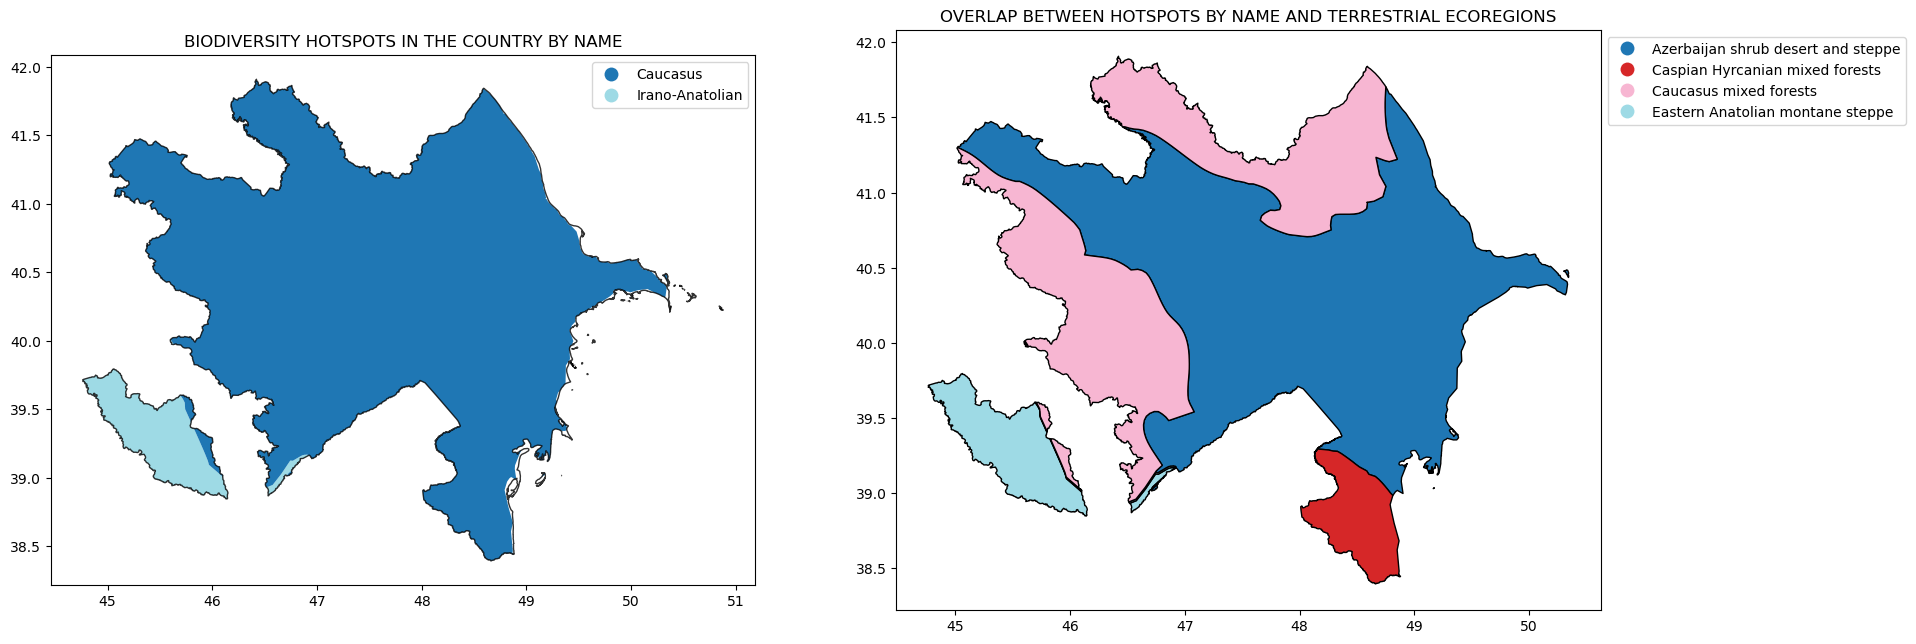

In [120]:
# Further investigate the intersection between biodiversity hotspots and different ecoregions.

from geopandas.tools import overlay

# Perform a spatial overlay between biodiversity hotspots and ecoregions
overlap = overlay(ctry_biohotspots, ctry_ecoregion, how="intersection")

# Create a subplot with two panels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot the biodiversity hotspots by name in panel 1
ctry_biohotspots.plot(column="NAME", cmap="tab20", ax=ax1, legend=True)
admin.plot(ax=ax1, color="none", edgecolor="black", alpha=0.8)
ax1.set_title("BIODIVERSITY HOTSPOTS IN THE COUNTRY BY NAME")

# Plot the overlapping areas between hotspots by name and ecoregions in panel 2
overlap.plot(ax=ax2, cmap="tab20", column="ECO_NAME", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, edgecolor="black")
ax2.set_title("OVERLAP BETWEEN HOTSPOTS BY NAME AND TERRESTRIAL ECOREGIONS")

# Display the plot
plt.show()

**Observation**

The maps provided depict the intersection of ecoregions and biodiversity hotspots in Azerbaijan. The first map illustrates this overlap, suggesting that biodiversity hotspots are distributed across the entire country. Conversely, the second map (second plot) delimits the precise areas where biodiversity hotspots intersect with ecoregions. Notably, these maps reveal that biodiversity hotspots coincide with terrestrial ecoregions, indicating a significant correlation between these ecological features.

     OVERLAY OF STATES ON BIODIVERSITY HOTSPOTS

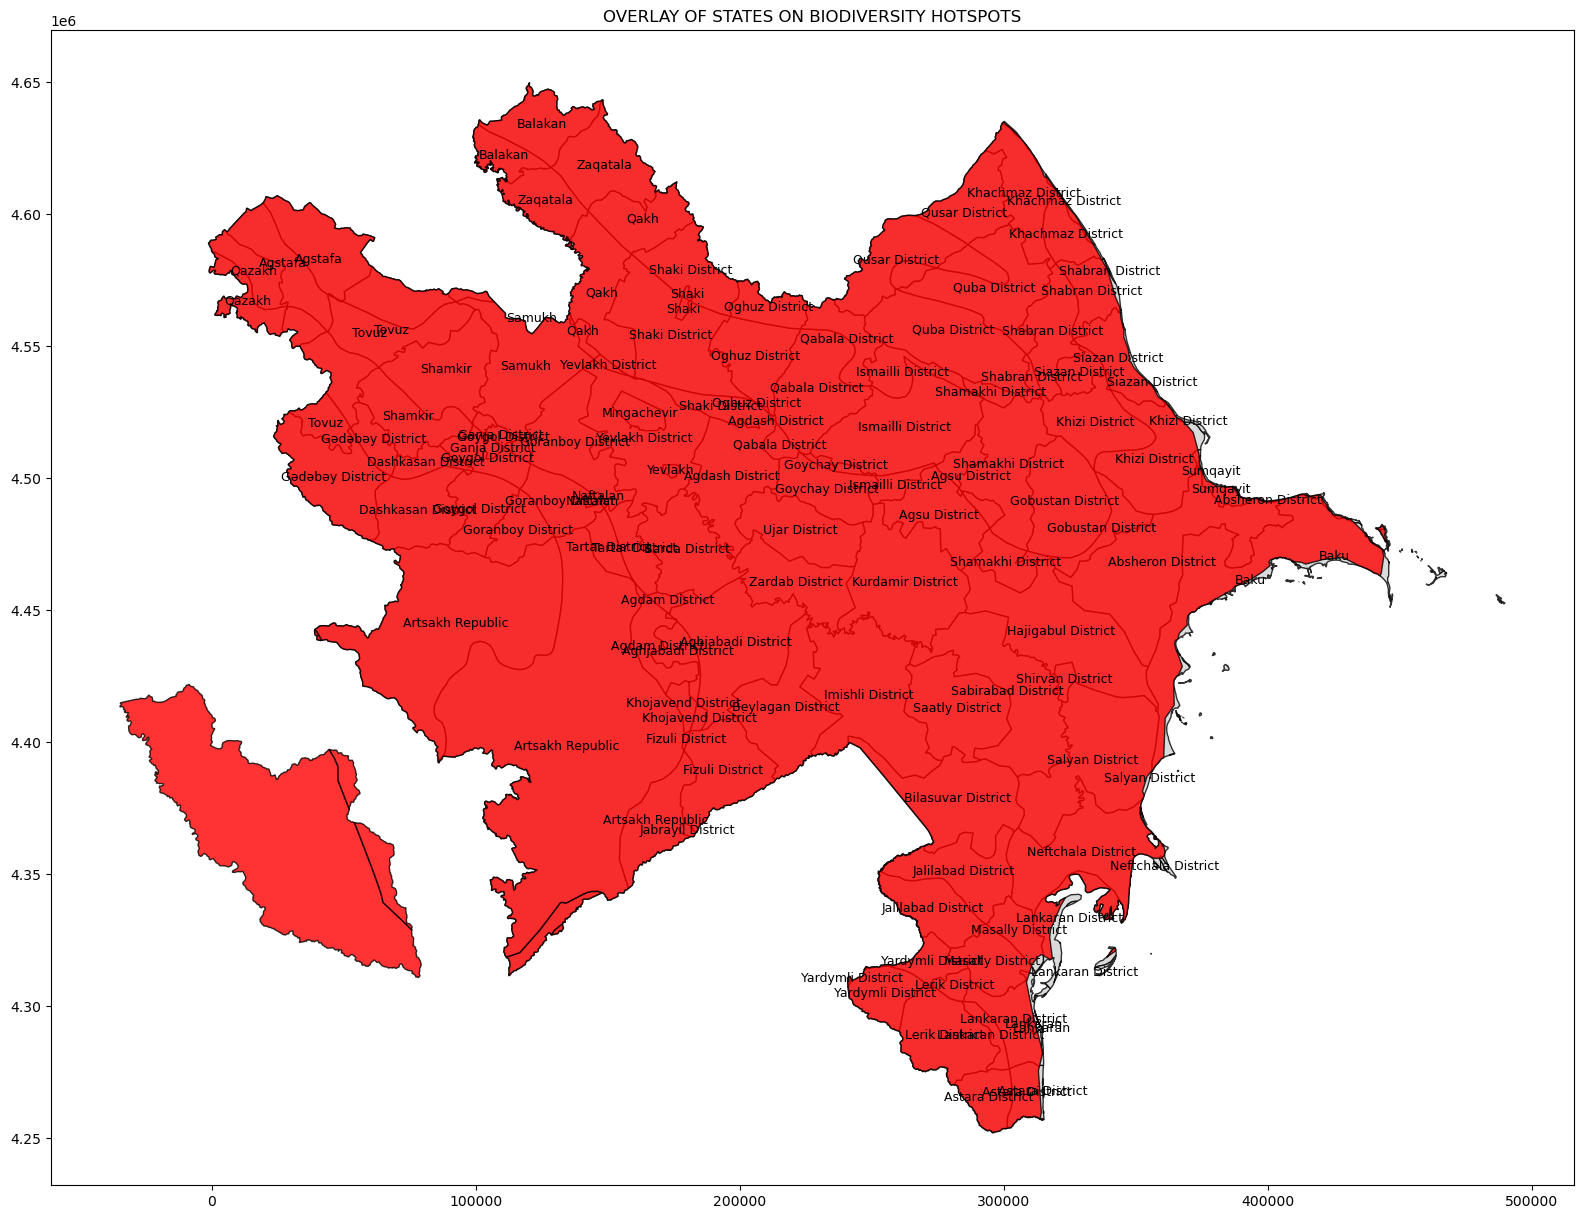

In [121]:
# Reproject geometries to a projected CRS
adminstates = adminstates.to_crs(projected_crs)
ctry_biohotspots = ctry_biohotspots.to_crs(projected_crs)

# Create subplot with one panel
fig, ax = plt.subplots(figsize=(20, 15))

# Plot ecoregions and biodiversity hotspots on the same panel
adminstates.plot(ax=ax, color="lightgrey", edgecolor="black", alpha=0.8, label="States")
ctry_biohotspots.plot(ax=ax, color="red", edgecolor="black", alpha=0.8, label="Biodiversity Hotspots")

# Annotate with state names
for x, y, label in zip(adminstates.geometry.centroid.x, adminstates.geometry.centroid.y, adminstates["name"]):
    ax.text(x, y, label, fontsize=9, ha="center", va="center", color="black")

plt.title("OVERLAY OF STATES ON BIODIVERSITY HOTSPOTS")

# Display the plot
plt.show()

In [122]:
# Reproject geometries to original CRS for arm_biodiversityhotspots
original_crs = "EPSG:4326"
ctry_biohotspots = ctry_biohotspots.to_crs(original_crs)

# Reproject geometries to original CRS for armstates_admin
adminstates = adminstates.to_crs(original_crs)

    4.5 BIOCLIMATIC AND ECOLOGICAL OVERVIEW

**Overview**

Azerbaijan showcases two significant biodiversity hotspots, with the Caucasus standing out as the largest among them. Notably, both hotspots share the same biodiversity hotspot type, indicating similar ecological characteristics and conservation importance across these regions.

The ecological landscape of Azerbaijan reveals the Temperate desert as its largest ecological zone, extending across all districts within the country. Interestingly, certain districts exhibit a combination of two distinct ecological zones, adding complexity to Azerbaijan's environmental makeup. Moreover, water plays a significant role within the ecological zone framework in this country, highlighting the interconnectedness of land and water systems in shaping Azerbaijan's natural environment.

Azerbaijan is predominantly characterized by the Tropical-Sub-Humid agroecological zone, covering a significant geographical area and serving as the primary agroecological feature. This dominance implies a potential suitability for tropical and subtropical agricultural practices, indicating favorable conditions for crops and vegetation typical of such zones. Additionally, it suggests a regional climate conducive to agricultural productivity, which could influence land use patterns, crop selection, and farming strategies in the area.

Azerbaijan's ecological diversity is further emphasized by its range of Holdridge life zones, with the Cool temperate steppe being the most prevalent. Additionally, less common zones like the Warm temperate moist, Warm temperate desert bush, and Polar desert contribute to the country's ecological richness. This ecological diversity not only supports a variety of plant and animal species but also highlights the importance of conservation efforts tailored to each unique ecosystem.

The country's terrestrial ecoregions play a pivotal role in shaping biodiversity, with the Azerbaijan shrub desert and steppe  being the most extensive. Alongside this dominant ecoregion, the other three which include the Eastern Anatolian montane steppe,
Caspian Hyrcanian mixed forests, Azerbaijan shrub desert and steppe and Caucasus mixed forests significantly influence Azerbaijan's biodiversity and ecological dynamics.

There is also the intersection between ecoregions and biodiversity hotspots in Azerbaijan. Notably, the locations of biodiversity hotspots are all over the districts in the country and align with the areas occupied by terrestrial ecoregions. This highlights the interconnectedness of diverse ecosystems within Azerbaijan.

#### 5. SOIL

    5.0 SOIL RESOURCES

In [123]:
# Read geojson file into a geodataframe
soil = gpd.read_file("AZE_AL2_Azerbaijan_WSR.json")

In [124]:
soil.head(2)

country ISO3166_2        name SNAME  mg_code      IPCC  adminlevel  \
0     AZE            Azerbaijan    CL       29  Calcisol           2   
1     AZE            Azerbaijan    LP       18  Leptosol           2   

                                            geometry  
0  MULTIPOLYGON (((48.90758 39.07103, 48.91837 39...  
1  MULTIPOLYGON (((48.86985 38.86276, 48.87479 38...

    5.01 UNDERSTAND THE DATA

In [125]:
# Check no.of rows and columns for ctry's soil reosurces
soil.shape

(3, 8)

In [126]:
# View all column titles in the dataframe
soil.columns

Index(['country', 'ISO3166_2', 'name', 'SNAME', 'mg_code', 'IPCC',
       'adminlevel', 'geometry'],
      dtype='object')

The above shows the names of the columns.

In [127]:
# Check for unique value and their counts in the selected column
soil["IPCC"].value_counts()

Calcisol       1
Leptosol       1
Waterbodies    1
Name: IPCC, dtype: int64

This shows the unique values and respective counts in the "IPCC" column.

In [128]:
# Check the data-type of each column
soil.dtypes

country         object
ISO3166_2       object
name            object
SNAME           object
mg_code          int64
IPCC            object
adminlevel       int64
geometry      geometry
dtype: object

The above shows the data types for each column.

In [129]:
# Check information about the dataframe
soil.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   country     3 non-null      object  
 1   ISO3166_2   3 non-null      object  
 2   name        3 non-null      object  
 3   SNAME       3 non-null      object  
 4   mg_code     3 non-null      int64   
 5   IPCC        3 non-null      object  
 6   adminlevel  3 non-null      int64   
 7   geometry    3 non-null      geometry
dtypes: geometry(1), int64(2), object(5)
memory usage: 324.0+ bytes


This provides basic information about the dataframe. It contains categorical values, which are represented by columns with 'object' data types, numerical values, whuch are represented with 'int64' data types, and geometric data, which is stored in columns with 'geometry' data types. Geometric data represents spatial or geographic information.

In [130]:
# Check the coordinate system of the dataframe
soil.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The Coordinate System of the dataframe is 4326, which is the WGS 84 Coordinate System.

In [131]:
# Check the geometric type of the dataframe
soil.geom_type

0    MultiPolygon
1    MultiPolygon
2    MultiPolygon
dtype: object

The records for the dataframe have polygon geometric type.

    5.02 COMPREHENSIVE ANALYSIS

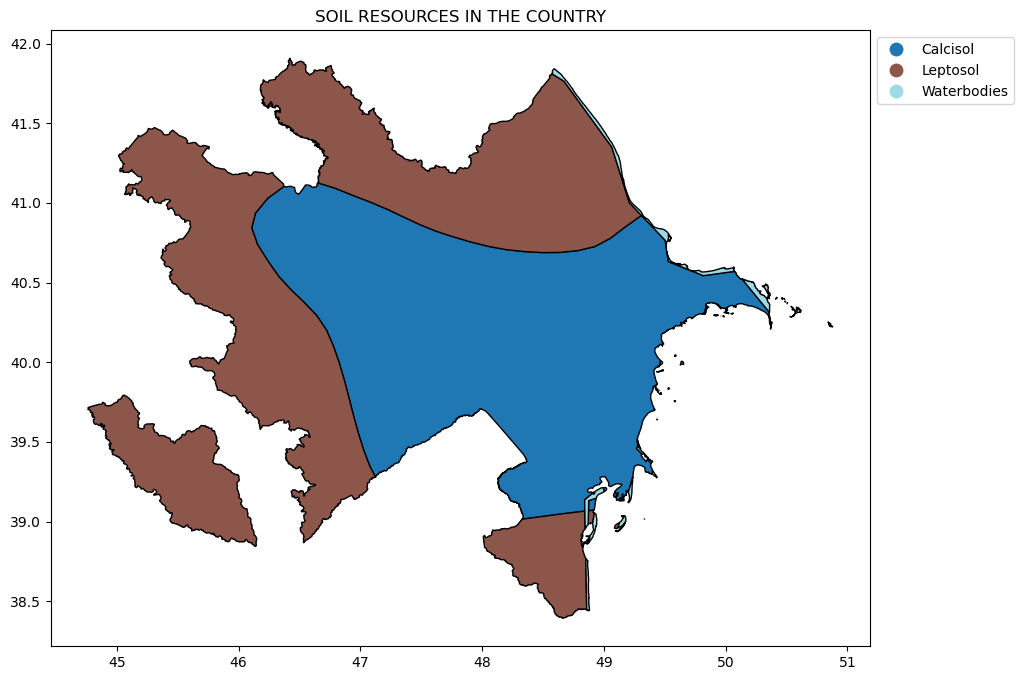

In [132]:
# Create plot for soil resources
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the ctry's soil resoucrces
soil.plot(ax=ax, cmap="tab20", column="IPCC", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, edgecolor="black")
ax.set_title("SOIL RESOURCES IN THE COUNTRY")

# Display plot
plt.show()

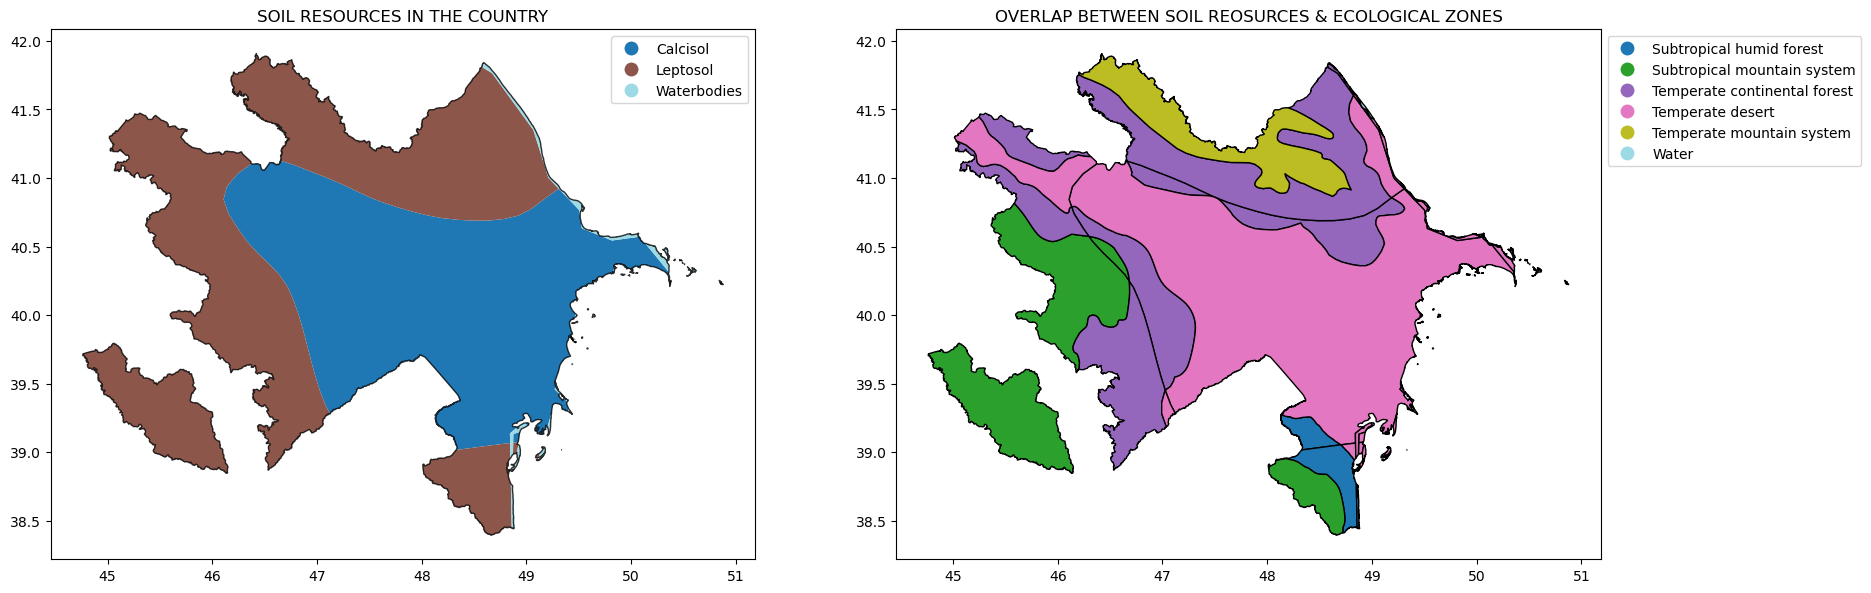

In [133]:
# Further investigate the intersection between soil resources and different terr. ecoregions.

from geopandas.tools import overlay

# Perform a spatial overlay between soil resources and terr. ecoregions
overlap = overlay(soil, gez, how="intersection", keep_geom_type=False)

# Create a subplot with two panels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot the soil resources in panel 1
soil.plot(column="IPCC", cmap="tab20", ax=ax1, legend=True)
admin.plot(ax=ax1, color="none", edgecolor="black", alpha=0.8)
ax1.set_title("SOIL RESOURCES IN THE COUNTRY")

# Plot the overlapping areas between soils and ecoregions in panel 2
overlap.plot(ax=ax2, cmap="tab20", column="gez_name", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, edgecolor="black")
ax2.set_title("OVERLAP BETWEEN SOIL REOSURCES & ECOLOGICAL ZONES")

# Display the plot
plt.show()

**Observation**

The soil resource mapping conducted in Azerbaijan provides valuable insights into the nation's diverse soil composition, highlighting two distinct soil types, alongside waterbodies at the boundaries of the country that play crucial roles in supporting various ecosystems and land uses. Among these, Leptosol stands out as the soil resource with the broadest coverage, underscoring its prevalence and significance across Azerbaijan's landscapes.

Furthermore, the spatial distribution of soil resources reveals interesting patterns of coexistence within specific ecological zones. For instance, within the Temperate desert, a blend of these two soil resources is evident, alongside water bodies. This co-occurrence emphasizes the intricate interplay between soil formation processes, climatic conditions, and vegetation dynamics within distinct ecological settings.

    6.1 SOIL RESOURCES OVERVIEW

**Overview**

Azerbaijan's ecosystems are significantly influenced by two distinct soil types: Leptosol and Calcisol. Leptosol, characterized by limitations to root growth, is prevalent in the country, particularly in mountainous regions with shallow soil profiles and rocky surfaces. These soils are young, often with little to no soil development, making them unsuitable for agriculture but ideal for seasonal grazing and forest land. However, erosion poses a significant threat in these areas, especially in temperate zones with high population pressure and environmental degradation.

In contrast, Calcisol, known for its accumulation of moderately soluble salts, is less abundant and contributes less to Azerbaijan's ecosystems. These soils are commonly found in arid and semiarid regions, where water deficit limits their agricultural potential. Grazing is a predominant land use in Calcisol-dominated areas, with only a few areas suitable for rainfed agriculture. Under irrigation, crops like grain, cotton, and vegetables can be efficiently grown in these soils.

Understanding the prevalence and characteristics of Leptosol and Calcisol soils in Azerbaijan is crucial for various reasons. Firstly, it helps inform land use planning and management strategies, ensuring that areas with Leptosol soils are preserved for grazing and forestry activities rather than agricultural development, which could exacerbate erosion and soil degradation. Secondly, knowledge of Calcisol soils highlights regions where water deficit limits agricultural productivity, enabling targeted interventions to improve soil fertility and water management practices in these areas. 

Lastly, Azerbaijan's water bodies, located at the country's boundaries, serve as essential soil resources. Integrating water bodies into soil resource management contributes to sustainable land management practices and supports environmental conservation and ecosystem preservation efforts in Azerbaijan.

#### 6. CLIMATE

    6.0 CLIMATE ZONE

In [134]:
# Read geojson file into a geodataframe
wrld_climzones = gpd.read_file("IPCC_ClimateZoneMap_Vector.geojson")

In [135]:
wrld_climzones.head(2)

CLASS_NAME                                           geometry
0           0  MULTIPOLYGON (((-37.65000 83.50000, -37.65000 ...
1           0  MULTIPOLYGON (((-38.75000 83.40000, -38.75000 ...

    7.01 UNDERSTAND THE DATA

In [136]:
# Check no.of rows and columns for world climate zones
wrld_climzones.shape

(26165, 2)

In [137]:
# Check for unique values present in the value column
wrld_climzones["CLASS_NAME"].unique()

array([ 0,  5,  6,  7,  8,  3,  4,  1,  2, 12, 11,  9, 10], dtype=int64)

In [138]:
# Fix data and replace numbers with climate zones
classification =  {"0": "Not Defined", "1" : "Warm Temperate Moist", "2" : "Warm Temperate Dry", "3" : "Cool Temperate Moist", "4" : "Cool Temperate Dry", "5" : "Polar Moist",
    "6" : "Polar Dry", "7" : "Boreal Moist", "8" : "Boreal Dry", "9" : "Tropical Montane", "10" : "Tropical Wet", "11" : "Tropical Moist", "12" : "Tropical Dry"}

In [139]:
# Rename class name
wrld_climzones.CLASS_NAME = wrld_climzones.CLASS_NAME.astype("str").replace(classification)

In [140]:
wrld_climzones.head(2)

CLASS_NAME                                           geometry
0  Not Defined  MULTIPOLYGON (((-37.65000 83.50000, -37.65000 ...
1  Not Defined  MULTIPOLYGON (((-38.75000 83.40000, -38.75000 ...

In [141]:
# Extract ctry's climate zones zones
ctry_climzones = wrld_climzones.clip(admin)
ctry_climzones = ctry_climzones.reset_index(drop=True)

In [142]:
ctry_climzones.head(2)

CLASS_NAME                                           geometry
0  Cool Temperate Dry  POLYGON ((48.25000 38.90000, 48.20000 38.90000...
1  Warm Temperate Dry  MULTIPOLYGON (((48.65000 41.75000, 48.70998 41...

In [143]:
# Check no.of rows and columns for ctry's climate zones
ctry_climzones.shape

(31, 2)

In [144]:
# View all column titles in the dataframe
ctry_climzones.columns

Index(['CLASS_NAME', 'geometry'], dtype='object')

The above shows the names of the columns.

In [145]:
# Check for unique value and their counts in the selected column
ctry_climzones["CLASS_NAME"].value_counts()

Cool Temperate Dry      15
Cool Temperate Moist     5
Warm Temperate Moist     4
Polar Moist              4
Warm Temperate Dry       2
Not Defined              1
Name: CLASS_NAME, dtype: int64

This shows the unique values and respective counts in the "CLASS_NAME" column.

In [146]:
# Check the data-type of each column
ctry_climzones.dtypes

CLASS_NAME      object
geometry      geometry
dtype: object

The above shows the data types for each column.

In [147]:
# Check information about the dataframe
ctry_climzones.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CLASS_NAME  31 non-null     object  
 1   geometry    31 non-null     geometry
dtypes: geometry(1), object(1)
memory usage: 628.0+ bytes


This provides basic information about the dataframe. It contains categorical values, which are represented by columns with 'object' data types and geometric data, which is stored in columns with 'geometry' data types. Geometric data represents spatial or geographic information.

In [148]:
# Check the coordinate system of the dataframe
ctry_climzones.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The Coordinate System of the dataframe is 4326, which is the WGS 84 Coordinate System.

In [149]:
# Check the geometric type of the dataframe
ctry_climzones.geom_type

0          Polygon
1     MultiPolygon
2     MultiPolygon
3          Polygon
4     MultiPolygon
5          Polygon
6          Polygon
7          Polygon
8          Polygon
9          Polygon
10         Polygon
11         Polygon
12         Polygon
13         Polygon
14         Polygon
15         Polygon
16    MultiPolygon
17         Polygon
18         Polygon
19         Polygon
20         Polygon
21         Polygon
22         Polygon
23         Polygon
24         Polygon
25         Polygon
26         Polygon
27         Polygon
28    MultiPolygon
29         Polygon
30    MultiPolygon
dtype: object

The records for the dataframe have polygon and multipolygon geometric type. 

    6.02 COMPREHENSIVE ANALYSIS

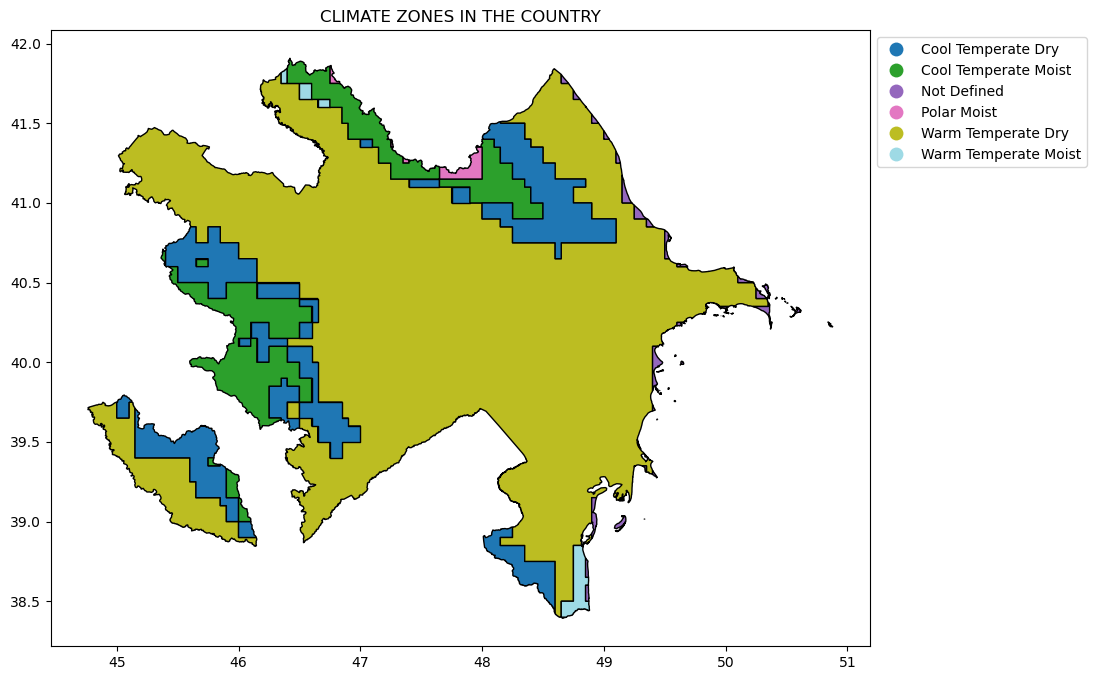

In [150]:
# Create plot for soil resources
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the ctry's soil resoucrces
ctry_climzones.plot(ax=ax, cmap="tab20", column="CLASS_NAME", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, edgecolor="black")
ax.set_title("CLIMATE ZONES IN THE COUNTRY")

# Display plot
plt.show()

In [151]:
# Re-project geometries to a projected CRS
ctry_climzones = ctry_climzones.to_crs(projected_crs)

#Calculate and print the area for each geometry 
ctry_climzones["area"] = ctry_climzones.geometry.area

In [152]:
ctry_climzones.head(2)

CLASS_NAME                                           geometry  \
0  Cool Temperate Dry  POLYGON ((261518.302 4309275.036, 257181.542 4...   
1  Warm Temperate Dry  MULTIPOLYGON (((304612.367 4624688.558, 309599...   

           area  
0  1.018678e+09  
1  6.497967e+10

In [153]:
# Create interactive map of the climate zones in Armenia
ctry_climzones.explore()

**Observation**

In Azerbaijan, the Cool temperate dry climate zone emerges as the most frequently occurring climate zone. However, despite its lower frequency, the warm Temperate dry climate zone exhibits significant prevalence, boasting a broad distribution across the country. This observation emphasizes the diverse climatic conditions present in the country, ranging from dry to moist temperate climates, each playing a crucial role in shaping local ecosystems and influencing agricultural practices.

    6.1 KOPPEN-GIEGER CLIMATE CHANGES (1901 -2100)

    6.11 LOAD DATASETS

In [154]:
# Access world climate shifts from 1901 -2100 using file paths and assign to a variable
climateshift_25 = (r"C:\Users\User\Documents\Scholarships application\Women Techstars Application\internships\Outreachy\Contribution\Outreachy_Nwajiunor_2023\KoppenGeigerClimateShifts\1901-1925.geojson")
climateshift_50 = (r"C:\Users\User\Documents\Scholarships application\Women Techstars Application\internships\Outreachy\Contribution\Outreachy_Nwajiunor_2023\KoppenGeigerClimateShifts\1926-1950.geojson")
climateshift_75 = (r"C:\Users\User\Documents\Scholarships application\Women Techstars Application\internships\Outreachy\Contribution\Outreachy_Nwajiunor_2023\KoppenGeigerClimateShifts\1951-1975.geojson")
climateshift_00 = (r"C:\Users\User\Documents\Scholarships application\Women Techstars Application\internships\Outreachy\Contribution\Outreachy_Nwajiunor_2023\KoppenGeigerClimateShifts\1976-2000.geojson")
climateshift_A125 = (r"C:\Users\User\Documents\Scholarships application\Women Techstars Application\internships\Outreachy\Contribution\Outreachy_Nwajiunor_2023\KoppenGeigerClimateShifts\2001-2025-A1FI.geojson")
climateshift_A225 = (r"C:\Users\User\Documents\Scholarships application\Women Techstars Application\internships\Outreachy\Contribution\Outreachy_Nwajiunor_2023\KoppenGeigerClimateShifts\2001-2025-A2.geojson")
climateshift_B125 = (r"C:\Users\User\Documents\Scholarships application\Women Techstars Application\internships\Outreachy\Contribution\Outreachy_Nwajiunor_2023\KoppenGeigerClimateShifts\2001-2025-B1.geojson")
climateshift_B225 = (r"C:\Users\User\Documents\Scholarships application\Women Techstars Application\internships\Outreachy\Contribution\Outreachy_Nwajiunor_2023\KoppenGeigerClimateShifts\2001-2025-B2.geojson")
climateshift_A150 = (r"C:\Users\User\Documents\Scholarships application\Women Techstars Application\internships\Outreachy\Contribution\Outreachy_Nwajiunor_2023\KoppenGeigerClimateShifts\2026-2050-A1FI.geojson")
climateshift_A250 = (r"C:\Users\User\Documents\Scholarships application\Women Techstars Application\internships\Outreachy\Contribution\Outreachy_Nwajiunor_2023\KoppenGeigerClimateShifts\2026-2050-A2.geojson")
climateshift_B150 = (r"C:\Users\User\Documents\Scholarships application\Women Techstars Application\internships\Outreachy\Contribution\Outreachy_Nwajiunor_2023\KoppenGeigerClimateShifts\2026-2050-B1.geojson")
climateshift_B250 = (r"C:\Users\User\Documents\Scholarships application\Women Techstars Application\internships\Outreachy\Contribution\Outreachy_Nwajiunor_2023\KoppenGeigerClimateShifts\2026-2050-B2.geojson")
climateshift_A175 = (r"C:\Users\User\Documents\Scholarships application\Women Techstars Application\internships\Outreachy\Contribution\Outreachy_Nwajiunor_2023\KoppenGeigerClimateShifts\2051-2075-A1FI.geojson")
climateshift_A275 = (r"C:\Users\User\Documents\Scholarships application\Women Techstars Application\internships\Outreachy\Contribution\Outreachy_Nwajiunor_2023\KoppenGeigerClimateShifts\2051-2075-A2.geojson")
climateshift_B175 = (r"C:\Users\User\Documents\Scholarships application\Women Techstars Application\internships\Outreachy\Contribution\Outreachy_Nwajiunor_2023\KoppenGeigerClimateShifts\2051-2075-B1.geojson")
climateshift_B275 = (r"C:\Users\User\Documents\Scholarships application\Women Techstars Application\internships\Outreachy\Contribution\Outreachy_Nwajiunor_2023\KoppenGeigerClimateShifts\2051-2075-B2.geojson")
climateshift_A1100 = (r"C:\Users\User\Documents\Scholarships application\Women Techstars Application\internships\Outreachy\Contribution\Outreachy_Nwajiunor_2023\KoppenGeigerClimateShifts\2076-2100-A1FI.geojson")
climateshift_A2100 = (r"C:\Users\User\Documents\Scholarships application\Women Techstars Application\internships\Outreachy\Contribution\Outreachy_Nwajiunor_2023\KoppenGeigerClimateShifts\2076-2100-A2.geojson")
climateshift_B1100 = (r"C:\Users\User\Documents\Scholarships application\Women Techstars Application\internships\Outreachy\Contribution\Outreachy_Nwajiunor_2023\KoppenGeigerClimateShifts\2076-2100-B1.geojson")
climateshift_B2100 = (r"C:\Users\User\Documents\Scholarships application\Women Techstars Application\internships\Outreachy\Contribution\Outreachy_Nwajiunor_2023\KoppenGeigerClimateShifts\2076-2100-B2.geojson")

In [155]:
# Read geojson files into  geodataframe
shift_25 = gpd.read_file(climateshift_25)
shift_50 = gpd.read_file(climateshift_50)
shift_75 = gpd.read_file(climateshift_75)
shift_00 = gpd.read_file(climateshift_00)
shift_A125 = gpd.read_file(climateshift_A125)
shift_A225 = gpd.read_file(climateshift_A225)
shift_B125 = gpd.read_file(climateshift_B125)
shift_B225 = gpd.read_file(climateshift_B225)
shift_A150 = gpd.read_file(climateshift_A150)
shift_A250 = gpd.read_file(climateshift_A250)
shift_B150 = gpd.read_file(climateshift_B150)
shift_B250 = gpd.read_file(climateshift_B250)
shift_A175 = gpd.read_file(climateshift_A175)
shift_A275 = gpd.read_file(climateshift_A275)
shift_B175 = gpd.read_file(climateshift_B175)
shift_B275 = gpd.read_file(climateshift_B275)
shift_A1100 = gpd.read_file(climateshift_A1100)
shift_A2100 = gpd.read_file(climateshift_A2100)
shift_B1100 = gpd.read_file(climateshift_B1100)
shift_B2100 = gpd.read_file(climateshift_B2100)

In [156]:
# Check for the top two rows using any of the dataframes
shift_50.head(2)

OBJECTID  ID  GRIDCODE  Shape_Length  Shape_Area  \
0         1   1        62           2.0        0.25   
1         2   2        62           5.0        1.00   

                                            geometry  
0  POLYGON ((-37.50000 83.50000, -37.50000 84.000...  
1  POLYGON ((-46.00000 83.00000, -44.00000 83.000...

    6.12 UNDERSTAND THE DATA

In [157]:
# understand the data using one of the dataframes

# Check no.of rows and columns for any dataframe
shift_25.shape

(2319, 6)

The dataframe has 2319 rows and 6 columns.

In [158]:
# Check for unique values present in the value column
shift_25["GRIDCODE"].unique()

array([62, 61, 44, 52, 43, 47, 51, 48, 33, 42, 32, 46, 50, 26, 35, 36, 41,
       31, 45, 34, 21, 49, 38, 37, 22, 27, 39, 14, 12, 13, 11],
      dtype=int64)

In [159]:
# Check for unique values present in the value column in another dataframe
shift_A225["GRIDCODE"].unique()

array([62., 61., 44., 47., 43., 51., 33., 52., 32., 42., 26., 50., 41.,
       35., 46., 49., 21., 31., 45., 34., 27., 22., 37., 36., 38., 39.,
       12., 14., 13., 11., nan])

Both dataframes contan different datatypes in the 'GRIDCODE' column

In [160]:
# Iterate through dataframes and update GRIDCODE column to integers

# List of dataframes to iterate through
dataframes = [shift_25, shift_50, shift_75, shift_00, 
              shift_A125, shift_A225, shift_B125, shift_B225, 
              shift_A150, shift_A250, shift_B150, shift_B250, 
              shift_A175, shift_A275, shift_B175, shift_B275, 
              shift_A1100, shift_A2100, shift_B1100, shift_B2100]

# Iterate through dataframes
for df in dataframes:
    # Check for non-finite values and replace them with a default value. In this case, 0
    df["GRIDCODE"] = df["GRIDCODE"].replace([np.inf, -np.inf, np.nan], 0)
    
    # Convert the GRIDCODE column to integers
    df["GRIDCODE"] = df["GRIDCODE"].astype(int)


In [161]:
# Fix data and replace numbers with climate classes using the Koppen-Geiger system
koppen_abb = {"11": "Af", "12": "Am", "13": "As", "14": "Aw", "21": "BWk", "22": "BWh", "26": "BSk", "27": "BSh", "31": "Cfa", 
              "32": "Cfb", "33": "Cfc", "34": "Csa", "35": "Csb", "36": "Csc", "37": "Cwa", "38": "Cwb", "39": "Cwc", "41": "Dfa", 
              "42": "Dfb", "43": "Dfc", "44": "Dfd", "45": "Dsa", "46": "Dsb", "47": "Dsc", "48": "Dsd", "49": "Dwa", "50": "Dwb", 
              "51": "Dwc", "52": "Dwd", "61": "EF", "62": "ET"}


In [162]:
# Rename class name for all dataframes
shift_25.GRIDCODE = shift_25.GRIDCODE.astype("str").replace(koppen_abb)
shift_50.GRIDCODE = shift_50.GRIDCODE.astype("str").replace(koppen_abb)
shift_75.GRIDCODE = shift_75.GRIDCODE.astype("str").replace(koppen_abb)
shift_00.GRIDCODE = shift_00.GRIDCODE.astype("str").replace(koppen_abb)
shift_A125.GRIDCODE = shift_A125.GRIDCODE.astype("str").replace(koppen_abb)
shift_A225.GRIDCODE = shift_A225.GRIDCODE.astype("str").replace(koppen_abb)
shift_B125.GRIDCODE = shift_B125.GRIDCODE.astype("str").replace(koppen_abb)
shift_B225.GRIDCODE = shift_B225.GRIDCODE.astype("str").replace(koppen_abb)
shift_A150.GRIDCODE = shift_A150.GRIDCODE.astype("str").replace(koppen_abb)
shift_A250.GRIDCODE = shift_A250.GRIDCODE.astype("str").replace(koppen_abb)
shift_B150.GRIDCODE = shift_B150.GRIDCODE.astype("str").replace(koppen_abb)
shift_B250.GRIDCODE = shift_B250.GRIDCODE.astype("str").replace(koppen_abb)
shift_A175.GRIDCODE = shift_A175.GRIDCODE.astype("str").replace(koppen_abb)
shift_A275.GRIDCODE = shift_A275.GRIDCODE.astype("str").replace(koppen_abb)
shift_B175.GRIDCODE = shift_B175.GRIDCODE.astype("str").replace(koppen_abb)
shift_B275.GRIDCODE = shift_B275.GRIDCODE.astype("str").replace(koppen_abb)
shift_A1100.GRIDCODE = shift_A1100.GRIDCODE.astype("str").replace(koppen_abb)
shift_A2100.GRIDCODE = shift_A2100.GRIDCODE.astype("str").replace(koppen_abb)
shift_B1100.GRIDCODE = shift_B1100.GRIDCODE.astype("str").replace(koppen_abb)
shift_B2100.GRIDCODE = shift_B2100.GRIDCODE.astype("str").replace(koppen_abb)

In [163]:
# Define mappings for abbreviated climate classes
koppen_term = {
    "Af": "Tropical rainforest climate", "Am": "Tropical monsoon climate",
    "As": "Tropical savanna climate with dry-summer characteristics",
    "Aw": "Tropical savanna climate with dry-winter characteristics",
    "BWk": "Cold desert climate", "BWh": "Hot desert climate",
    "BSk": "Cold semi-arid climate", "BSh": "Hot semi-arid climate",
    "Cfa": "Humid subtropical climate;", "Cfb": "Temperate oceanic climate",
    "Cfc": "Subpolar oceanic climate", "Csa": "Hot-summer Mediterranean climate",
    "Csb": "Warm-summer Mediterranean climate", "Csc": "Cold-summer Mediterranean climate",
    "Cwa": "Monsoon-influenced humid subtropical climate", "Cwb": "Subtropical highland climate",
    "Cwc": "Cold subtropical highland climate", "Dfa": "Hot-summer humid continental climate",
    "Dfb": "Warm-summer humid continental climate", "Dfc": "Subarctic climate",
    "Dfd": "Extremely cold subarctic climate", "Dsa": "Mediterranean-influenced hot-summer humid continental climate",
    "Dsb": "Mediterranean-influenced warm-summer humid continental climate",
    "Dsc": "Mediterranean-influenced subarctic climate", "Dsd": "Mediterranean-influenced extremely cold subarctic climate",
    "Dwa": "Monsoon-influenced hot-summer humid continental climate",
    "Dwb": "Monsoon-influenced warm-summer humid continental climate",
    "Dwc": "Monsoon-influenced subarctic climate",
    "Dwd": "Monsoon-influenced extremely cold subarctic climate",
    "EF": "Ice cap climate", "ET": "Tundra climate"
}

# Iterate through dataframes and update GRIDCODE column
for df in dataframes:
    df["GRIDCODE"] = df["GRIDCODE"].astype("str").replace(koppen_abb)

# Create a new column for defined climate classes in full terms
for df in dataframes:
    df["koppen_term"] = "Unknown"
    df["koppen_term"] = df["GRIDCODE"].map(koppen_term)

In [164]:
# Check dataframe after mapping
shift_25.head(2)

OBJECTID  ID GRIDCODE  Shape_Length  Shape_Area  \
0         1   1       ET           2.0        0.25   
1         2   2       ET          16.0        3.75   

                                            geometry     koppen_term  
0  POLYGON ((-37.50000 83.50000, -37.50000 84.000...  Tundra climate  
1  POLYGON ((-29.50000 83.50000, -29.50000 84.000...  Tundra climate

In [165]:
shift_A225.head(2)

OBJECTID   ID GRIDCODE  Shape_Length  Shape_Area  \
0         1  1.0       ET      1.874914    0.160097   
1         2  2.0       ET      5.000000    1.000000   

                                            geometry     koppen_term  
0  POLYGON ((-37.50000 83.50000, -37.75000 84.140...  Tundra climate  
1  POLYGON ((-46.00000 83.00000, -44.00000 83.000...  Tundra climate

In [166]:
# Extract ctry's climate shifts
ctry_climshifts_25 = shift_25.clip(admin)
ctry_climshifts_25 = ctry_climshifts_25.reset_index(drop=True)

ctry_climshifts_50 = shift_50.clip(admin)
ctry_climshifts_50 = ctry_climshifts_50.reset_index(drop=True)

ctry_climshifts_75 = shift_75.clip(admin)
ctry_climshifts_75 = ctry_climshifts_75.reset_index(drop=True)

ctry_climshifts_00 = shift_00.clip(admin)
ctry_climshifts_00 = ctry_climshifts_00.reset_index(drop=True)

ctry_climshifts_A125 = shift_A125.clip(admin)
ctry_climshifts_A125 = ctry_climshifts_A125.reset_index(drop=True)

ctry_climshifts_A225 = shift_A225.clip(admin)
ctry_climshifts_A225 = ctry_climshifts_A225.reset_index(drop=True)

ctry_climshifts_B125 = shift_B125.clip(admin)
ctry_climshifts_B125 = ctry_climshifts_B125.reset_index(drop=True)

ctry_climshifts_B225 = shift_B225.clip(admin)
ctry_climshifts_B225 = ctry_climshifts_B225.reset_index(drop=True)

ctry_climshifts_A150 = shift_A150.clip(admin)
ctry_climshifts_A150 = ctry_climshifts_A150.reset_index(drop=True)

ctry_climshifts_A250 = shift_A250.clip(admin)
ctry_climshifts_A250 = ctry_climshifts_A250.reset_index(drop=True)

ctry_climshifts_B150 = shift_B150.clip(admin)
ctry_climshifts_B150 = ctry_climshifts_B150.reset_index(drop=True)

ctry_climshifts_B250 = shift_B250.clip(admin)
ctry_climshifts_B250 = ctry_climshifts_B250.reset_index(drop=True)

ctry_climshifts_A175 = shift_A175.clip(admin)
ctry_climshifts_A175 = ctry_climshifts_A175.reset_index(drop=True)

ctry_climshifts_A275 = shift_A275.clip(admin)
ctry_climshifts_A275 = ctry_climshifts_A275.reset_index(drop=True)

ctry_climshifts_B175 = shift_B175.clip(admin)
ctry_climshifts_B175 = ctry_climshifts_B175.reset_index(drop=True)

ctry_climshifts_B275 = shift_B275.clip(admin)
ctry_climshifts_B275 = ctry_climshifts_B275.reset_index(drop=True)

ctry_climshifts_A1100 = shift_A1100.clip(admin)
ctry_climshifts_A1100 = ctry_climshifts_A1100.reset_index(drop=True)

ctry_climshifts_A2100 = shift_A2100.clip(admin)
ctry_climshifts_A2100 = ctry_climshifts_A2100.reset_index(drop=True)

ctry_climshifts_B1100 = shift_B1100.clip(admin)
ctry_climshifts_B1100 = ctry_climshifts_B1100.reset_index(drop=True)

ctry_climshifts_B2100 = shift_B2100.clip(admin)
ctry_climshifts_B2100 = ctry_climshifts_B2100.reset_index(drop=True)

In [167]:
# Read dataframe 
ctry_climshifts_B175.head(5)

OBJECTID    ID GRIDCODE  Shape_Length  Shape_Area  \
0      1194  1194      BSk          38.0       15.50   
1       889   889      Csa           5.0        1.00   
2       938   938      BSk          14.0        4.50   
3       868   868      Dsa           2.0        0.25   
4       890   890      BSh          10.0        2.50   

                                            geometry  \
0  POLYGON ((48.87662 38.50000, 48.87640 38.49731...   
1  MULTIPOLYGON (((48.50000 39.00000, 48.50000 38...   
2  POLYGON ((45.50000 39.50000, 45.50000 39.00000...   
3  POLYGON ((46.00000 39.00000, 45.50000 39.00000...   
4  MULTIPOLYGON (((49.13883 39.00000, 49.13981 39...   

                                         koppen_term  
0                             Cold semi-arid climate  
1                   Hot-summer Mediterranean climate  
2                             Cold semi-arid climate  
3  Mediterranean-influenced hot-summer humid cont...  
4                              Hot semi-arid climate

In [168]:
ctry_climshifts_A225.head(5)

OBJECTID     ID GRIDCODE  Shape_Length  Shape_Area  \
0       887  887.0      BSk     11.717995    3.940033   
1       813  813.0      Csa      4.000000    0.750000   
2       795  795.0      Csa      2.000000    0.250000   
3       794  794.0      Dsa      2.000000    0.250000   
4       777  777.0      Csa      2.000000    0.250000   

                                            geometry  \
0  POLYGON ((45.50000 39.50000, 45.50000 39.00000...   
1  POLYGON ((48.50000 39.00000, 48.50000 38.55030...   
2  POLYGON ((46.68896 39.00000, 46.68888 38.99649...   
3  POLYGON ((46.00000 39.00000, 46.10086 39.00000...   
4  POLYGON ((47.00000 39.50000, 47.50000 39.50000...   

                                         koppen_term  
0                             Cold semi-arid climate  
1                   Hot-summer Mediterranean climate  
2                   Hot-summer Mediterranean climate  
3  Mediterranean-influenced hot-summer humid cont...  
4                   Hot-summer Mediterranean climate

    6.13 COMPREHENSIVE ANALYSIS

    CLIMATE SHIFTS USING OBSERVATIONS FOR 1901 -2000

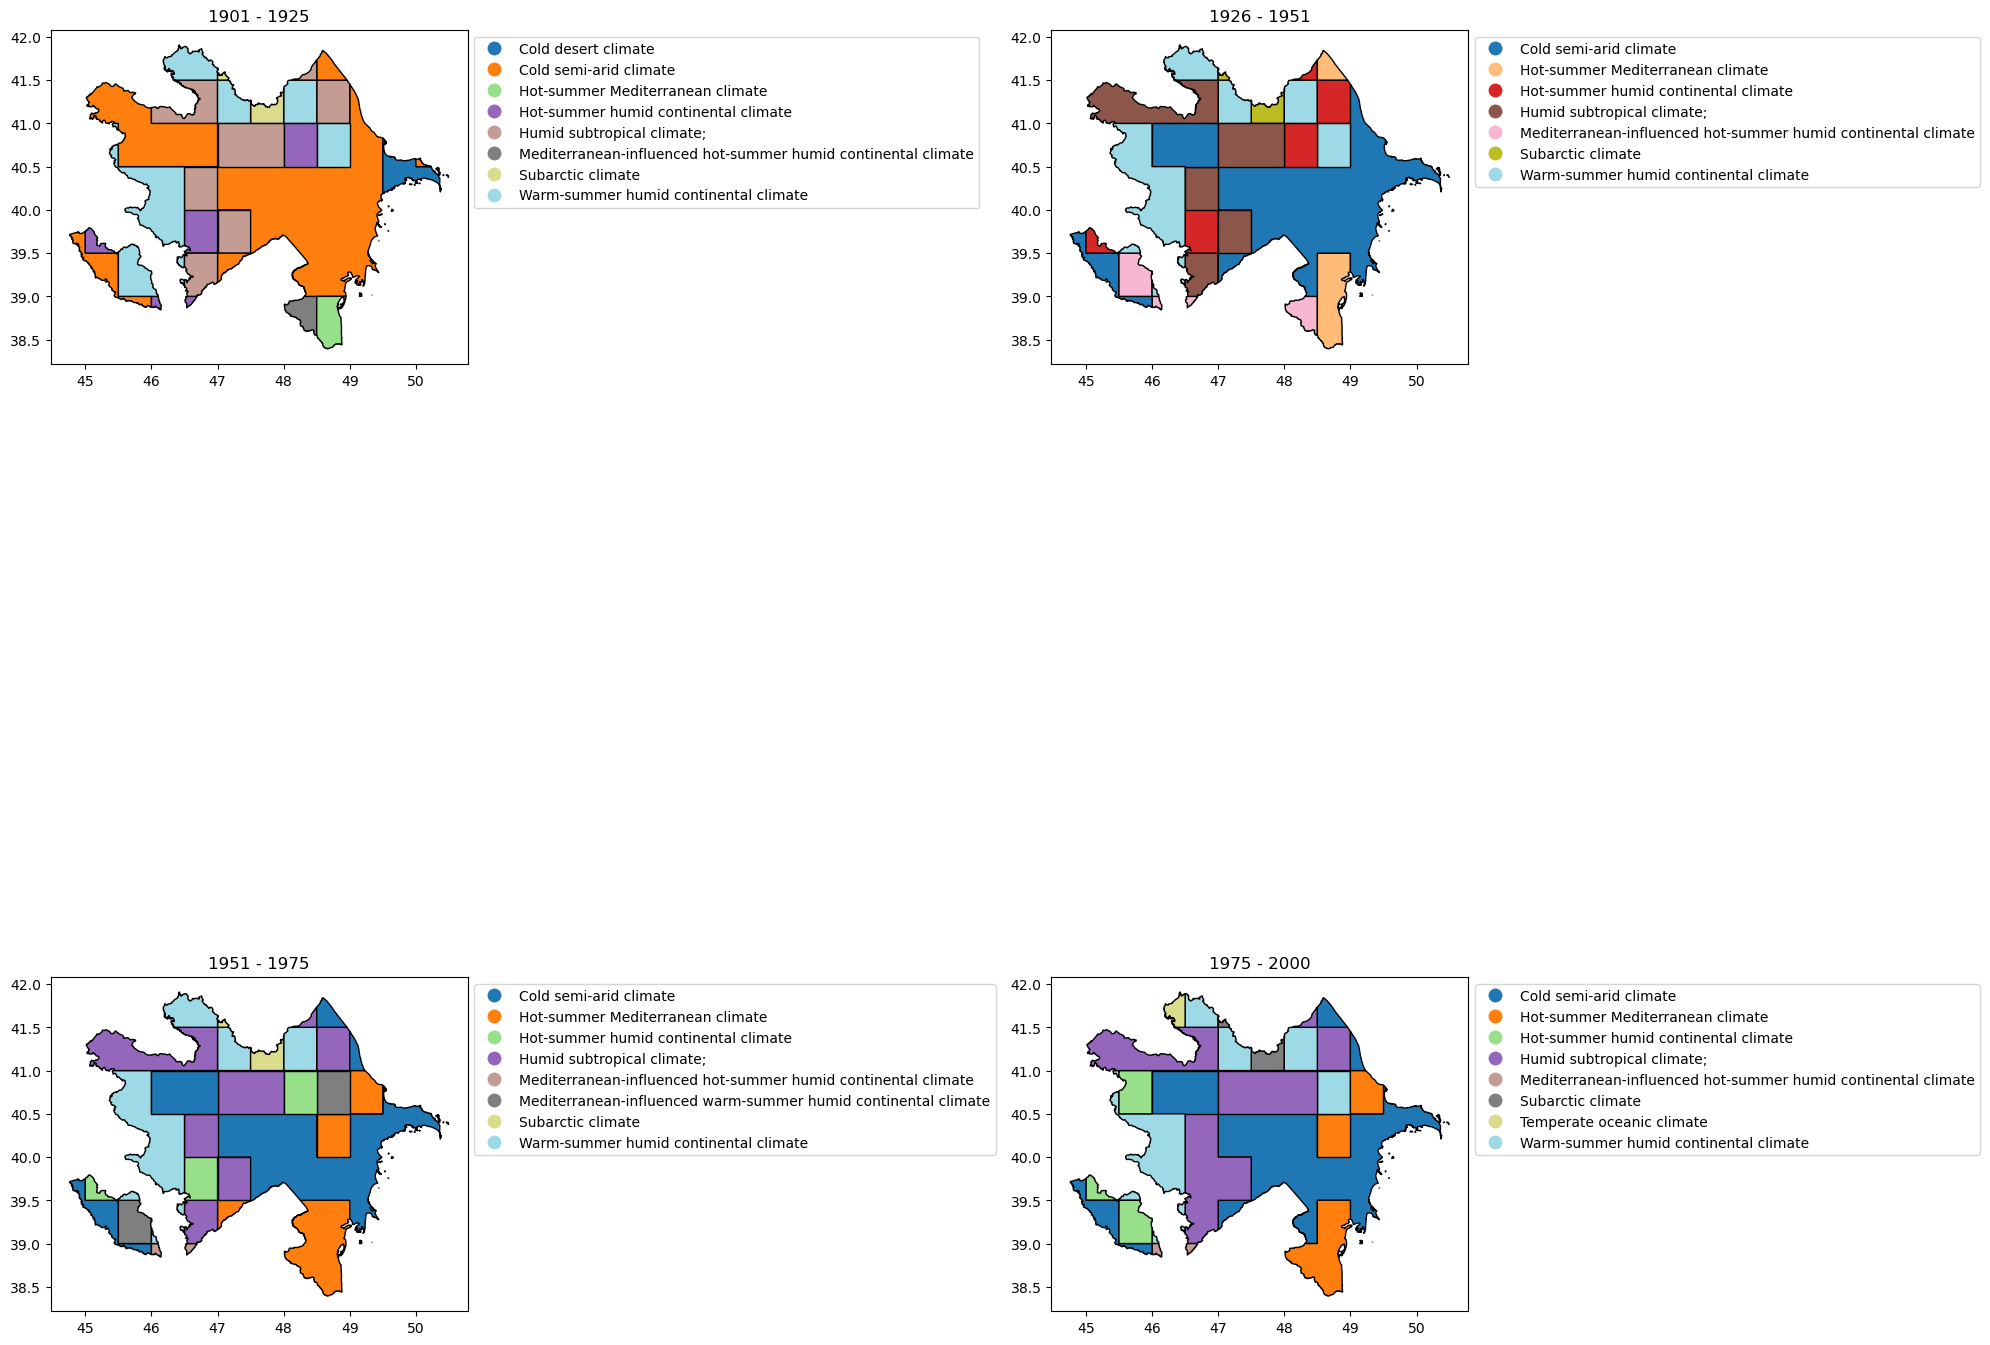

In [169]:
# Create a subplot with two panels on one row
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 20))

# Plot for 1901-1925 in panel 1
ctry_climshifts_25.plot(ax=ax1, column="koppen_term", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, cmap="tab20", edgecolor="black")
ax1.set_title("1901 - 1925")

# Plot for 1926-1950 in panel 2
ctry_climshifts_50.plot(ax=ax2, column="koppen_term", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, cmap="tab20", edgecolor="black")
ax2.set_title("1926 - 1951")

# Plot for 1951-1975 in panel 3
ctry_climshifts_75.plot(ax=ax3, column="koppen_term", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, cmap="tab20", edgecolor="black")
ax3.set_title("1951 - 1975")

# Plot for 1975-2000 in panel 4
ctry_climshifts_00.plot(ax=ax4, column="koppen_term", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, cmap="tab20", edgecolor="black")
ax4.set_title("1975 - 2000")

# Adjust layout for better appearance
plt.tight_layout()

# Display the plot
plt.show()


**Observation**

Between 1901 and 2000, Azerbaijan's primary climatic profile was characterized by the Cold semi-arid climate, which remained dominant for almost a century. Following this was the Humid subtropical climate which grew in geographic coverage over the years. 

     A1F1 CLIMATE SECENARIO

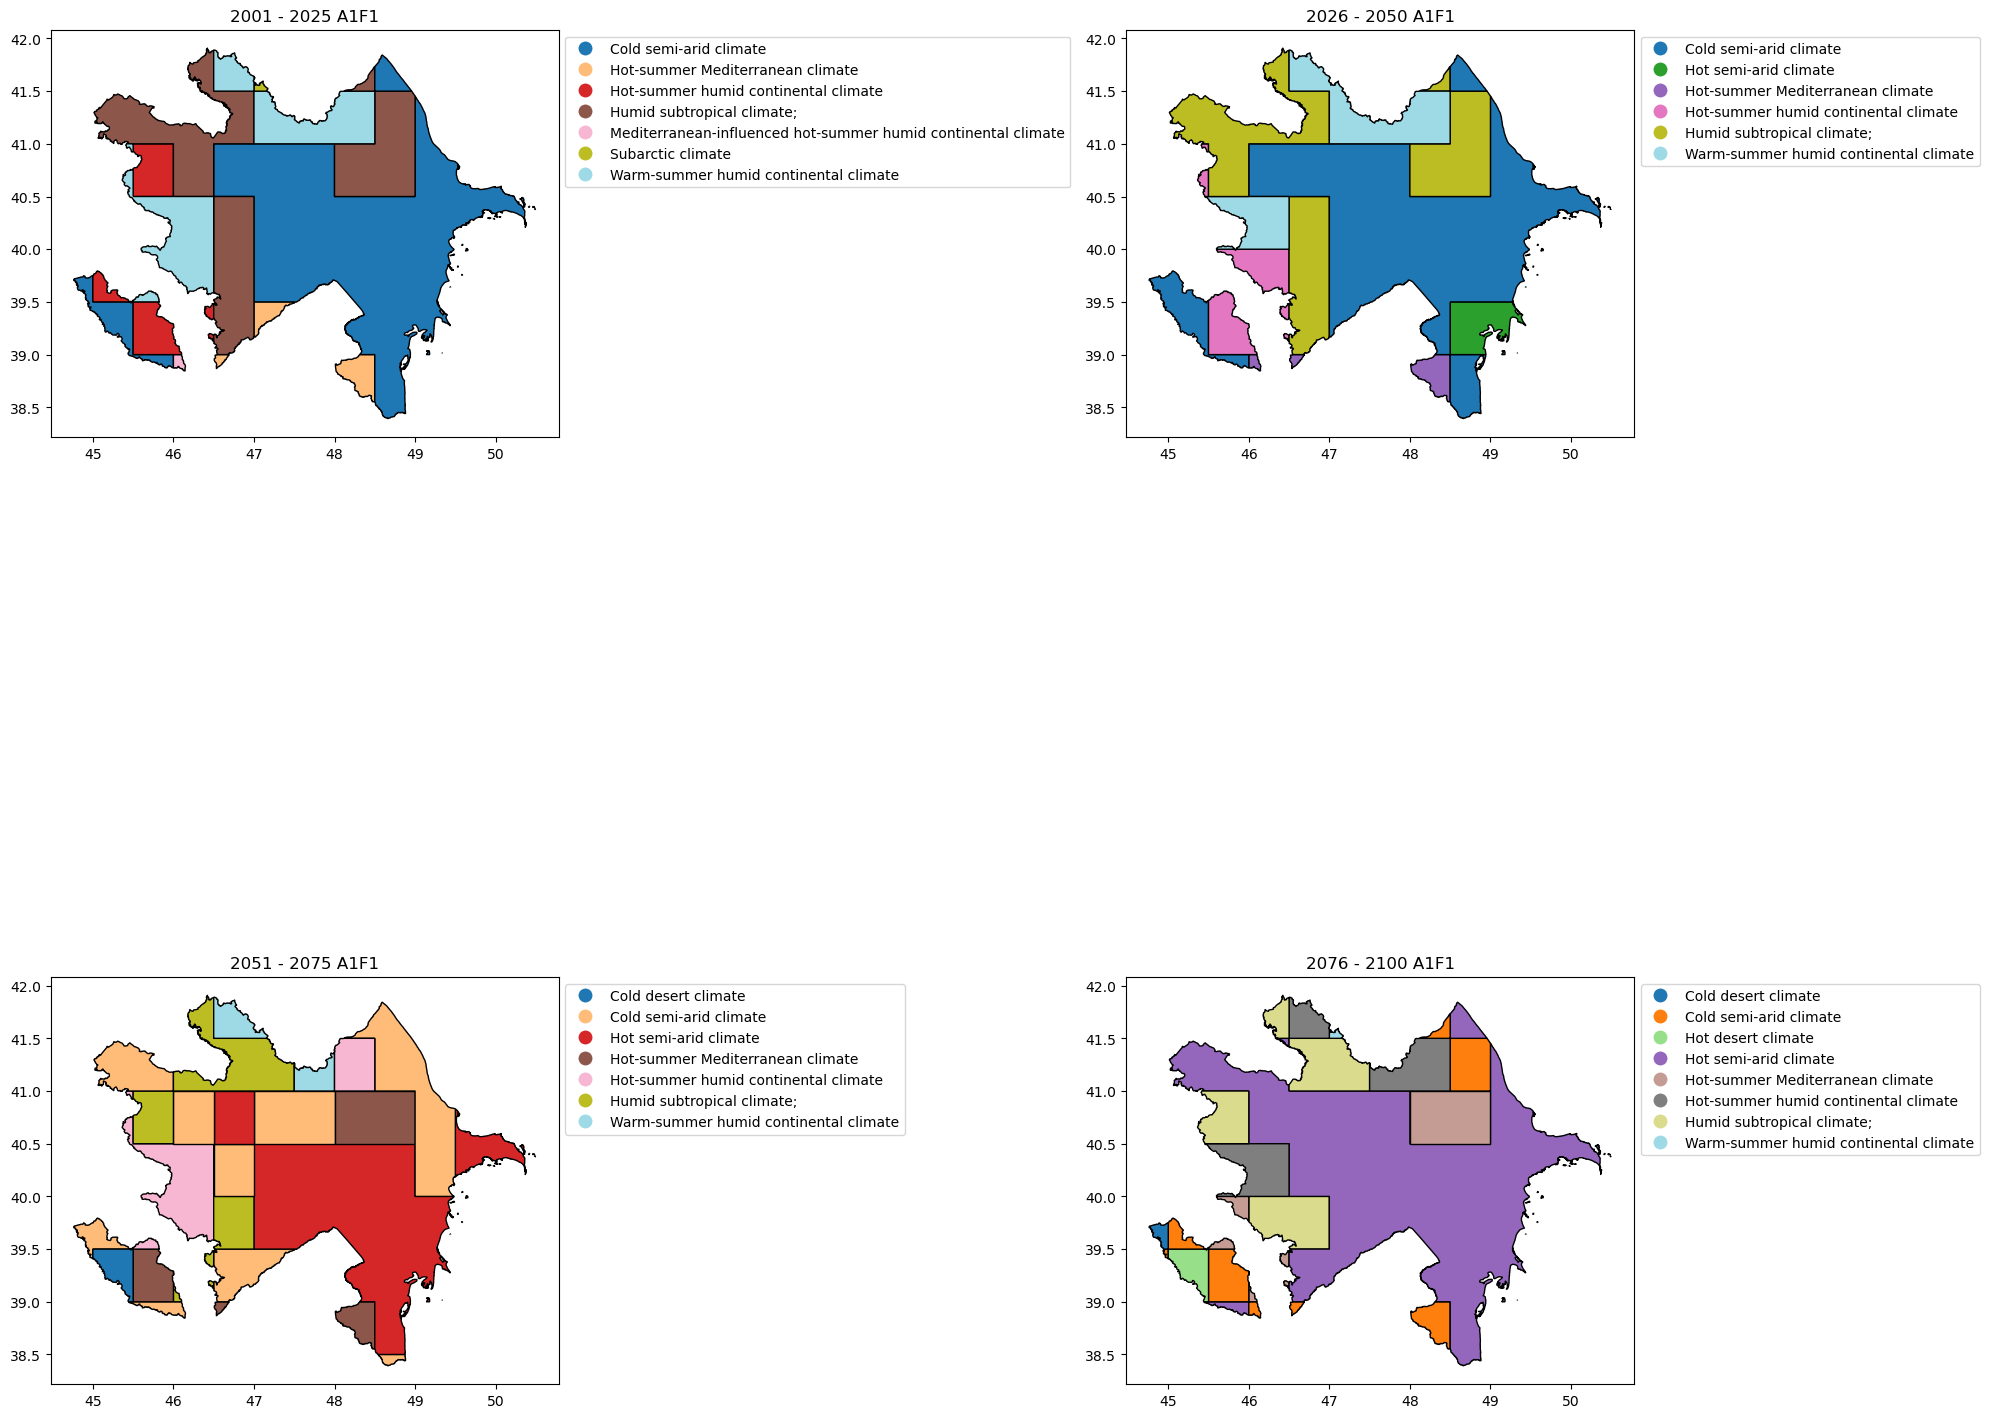

In [170]:
# Create a subplot with two panels on one row
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 20))

# Plot for 2001-2025 in panel 1
ctry_climshifts_A125.plot(ax=ax1, column="koppen_term", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, cmap="tab20", edgecolor="black")
ax1.set_title("2001 - 2025 A1F1")

# Plot for 2026-2050 in panel 2
ctry_climshifts_A150.plot(ax=ax2, column="koppen_term", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, cmap="tab20", edgecolor="black")
ax2.set_title("2026 - 2050 A1F1")

# Plot for 2051-2075 in panel 3
ctry_climshifts_A175.plot(ax=ax3, column="koppen_term", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, cmap="tab20", edgecolor="black")
ax3.set_title("2051 - 2075 A1F1")

# Plot for 2076-2100 in panel 4
ctry_climshifts_A1100.plot(ax=ax4, column="koppen_term", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, cmap="tab20", edgecolor="black")
ax4.set_title("2076 - 2100 A1F1")

# Adjust layout for better appearance
plt.tight_layout()

# Display the plot
plt.show()


**Observation**

The A1F1 scenario presents concerning projections for future climate change in Azerbaijan. It depicts the Cold semi-arid climate as the most prevalent from 2001 to 2050. However, by 2051, its coverage is anticipated to diminish, being displaced as the most dominant climate by the expanding presence of the Hot semi-arid climate. Additionally, the Hot desert climate is expected to become obsolete by 2051 and reappear by 2076, signaling significant shifts in Azerbaijan's climatic landscape over the twenty-first century.

    A2 CLIMATE SCENARIO

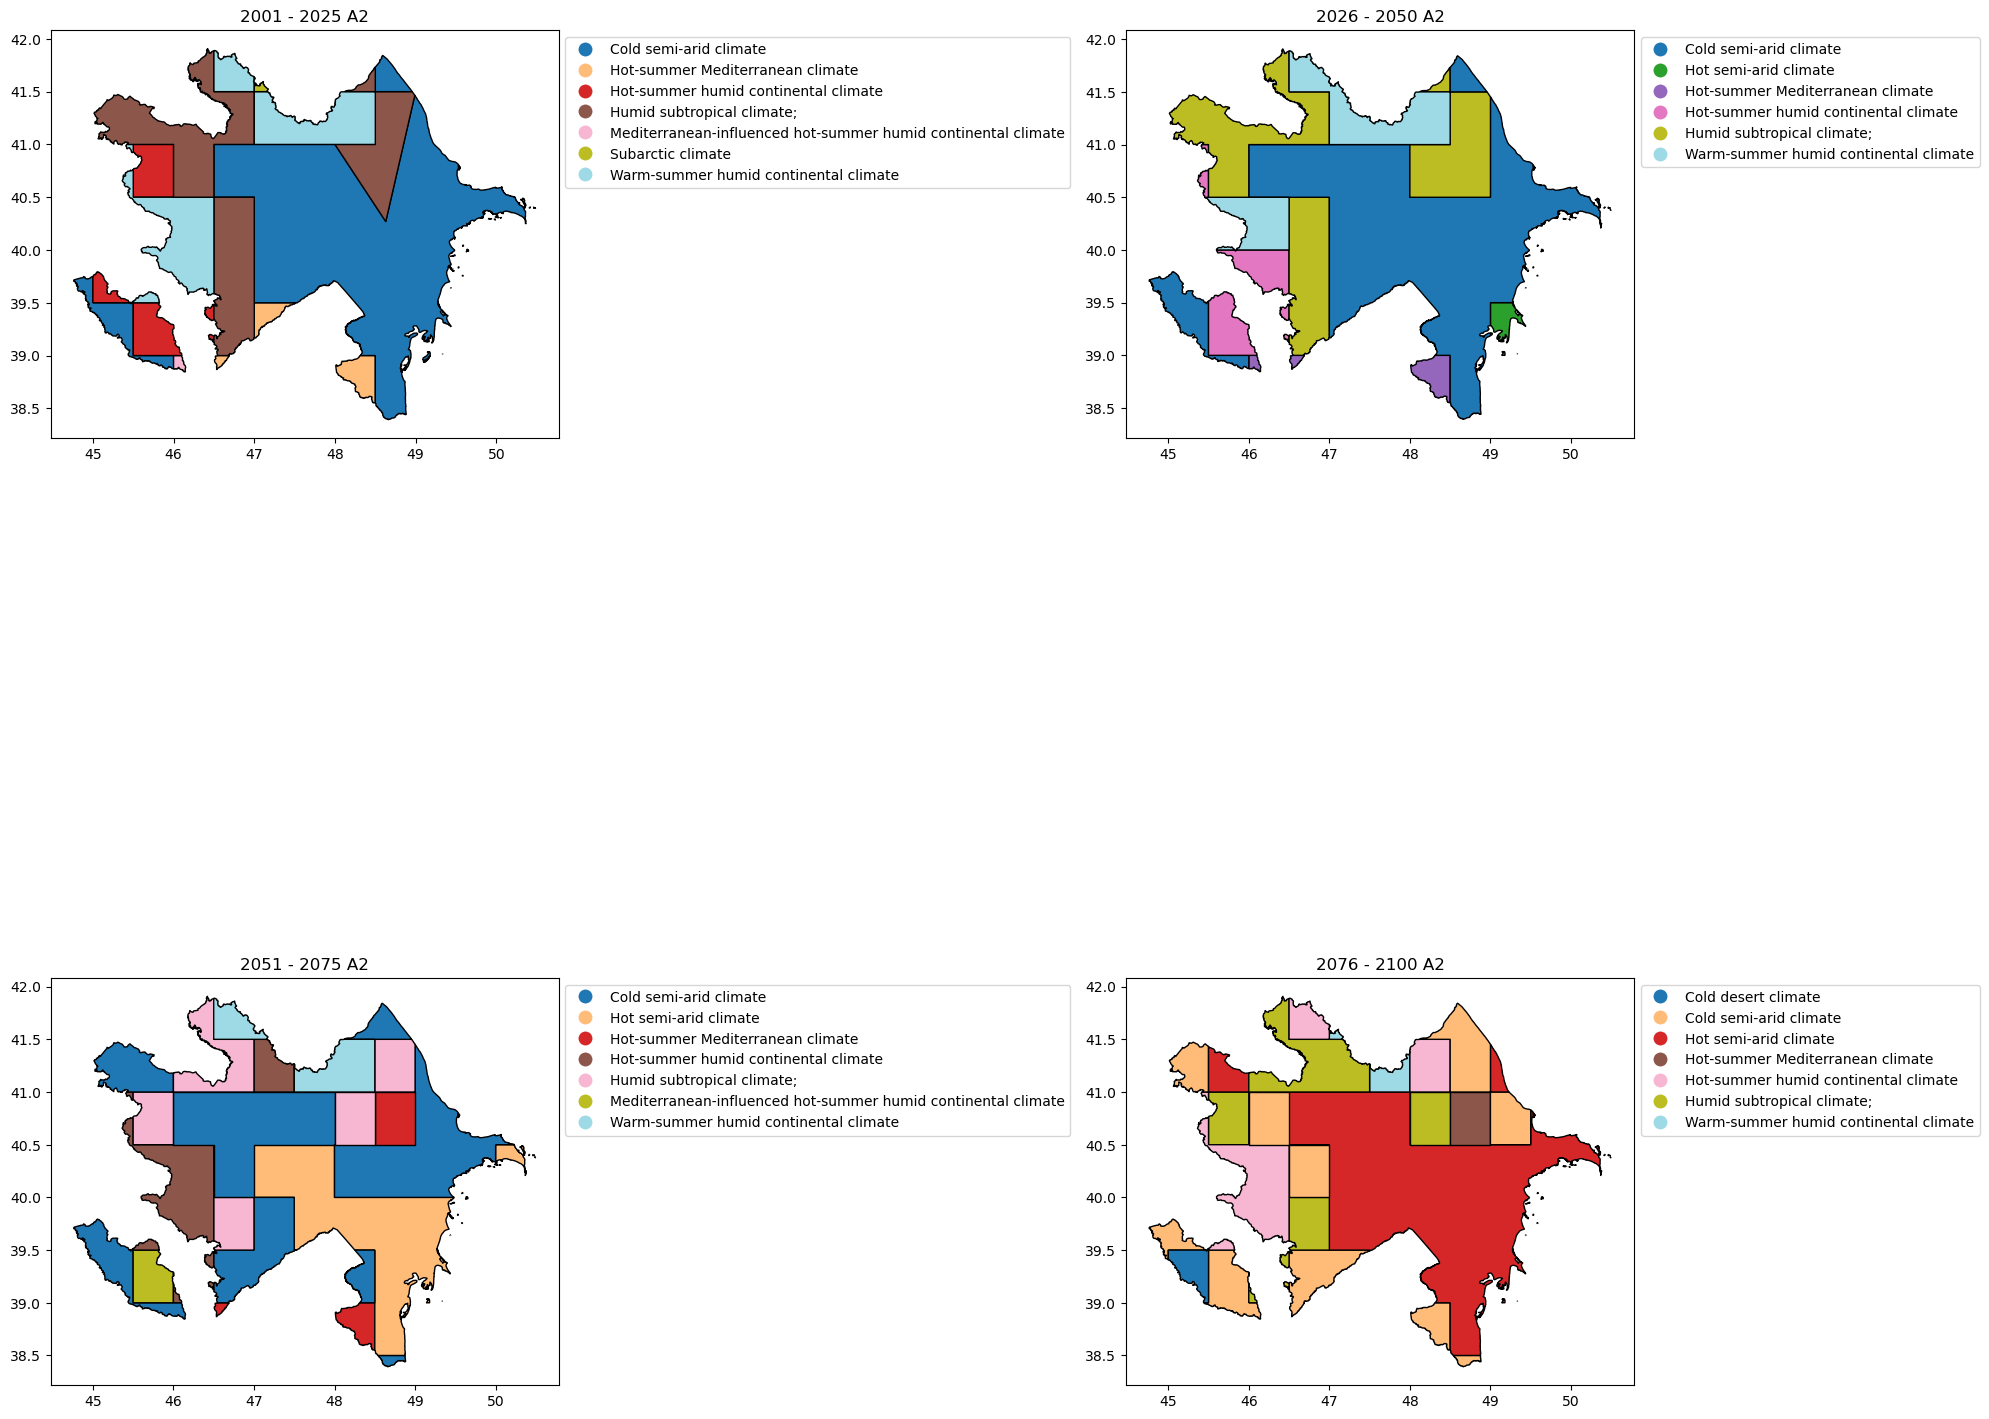

In [171]:
# Create a subplot with two panels on one row
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 20))

# Plot for 2001-2025 in panel 1
ctry_climshifts_A225.plot(ax=ax1, column="koppen_term", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, cmap="tab20", edgecolor="black")
ax1.set_title("2001 - 2025 A2")

# Plot for 2026-2050 in panel 2
ctry_climshifts_A250.plot(ax=ax2, column="koppen_term", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, cmap="tab20", edgecolor="black")
ax2.set_title("2026 - 2050 A2")

# Plot for 2051-2075 in panel 3
ctry_climshifts_A275.plot(ax=ax3, column="koppen_term", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, cmap="tab20", edgecolor="black")
ax3.set_title("2051 - 2075 A2")

# Plot for 2076-2100 in panel 4
ctry_climshifts_A2100.plot(ax=ax4, column="koppen_term", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, cmap="tab20", edgecolor="black")
ax4.set_title("2076 - 2100 A2")

# Adjust layout for better appearance
plt.tight_layout()

# Display the plot
plt.show()


**Observation**

In the A2 climate scenario, projections indicate that the Cold semi-arid climate will maintain its dominance as the most prevalent climate from 2001 to 2075. However, by 2076, it is expected to be displaced by the Hot semi-arid climate. Furthermore, by the same year, the coverage of the cold desert is projected to diminish greatly, eventually becoming the least dominant climate.

    B1 CLIMATE SCENARIO

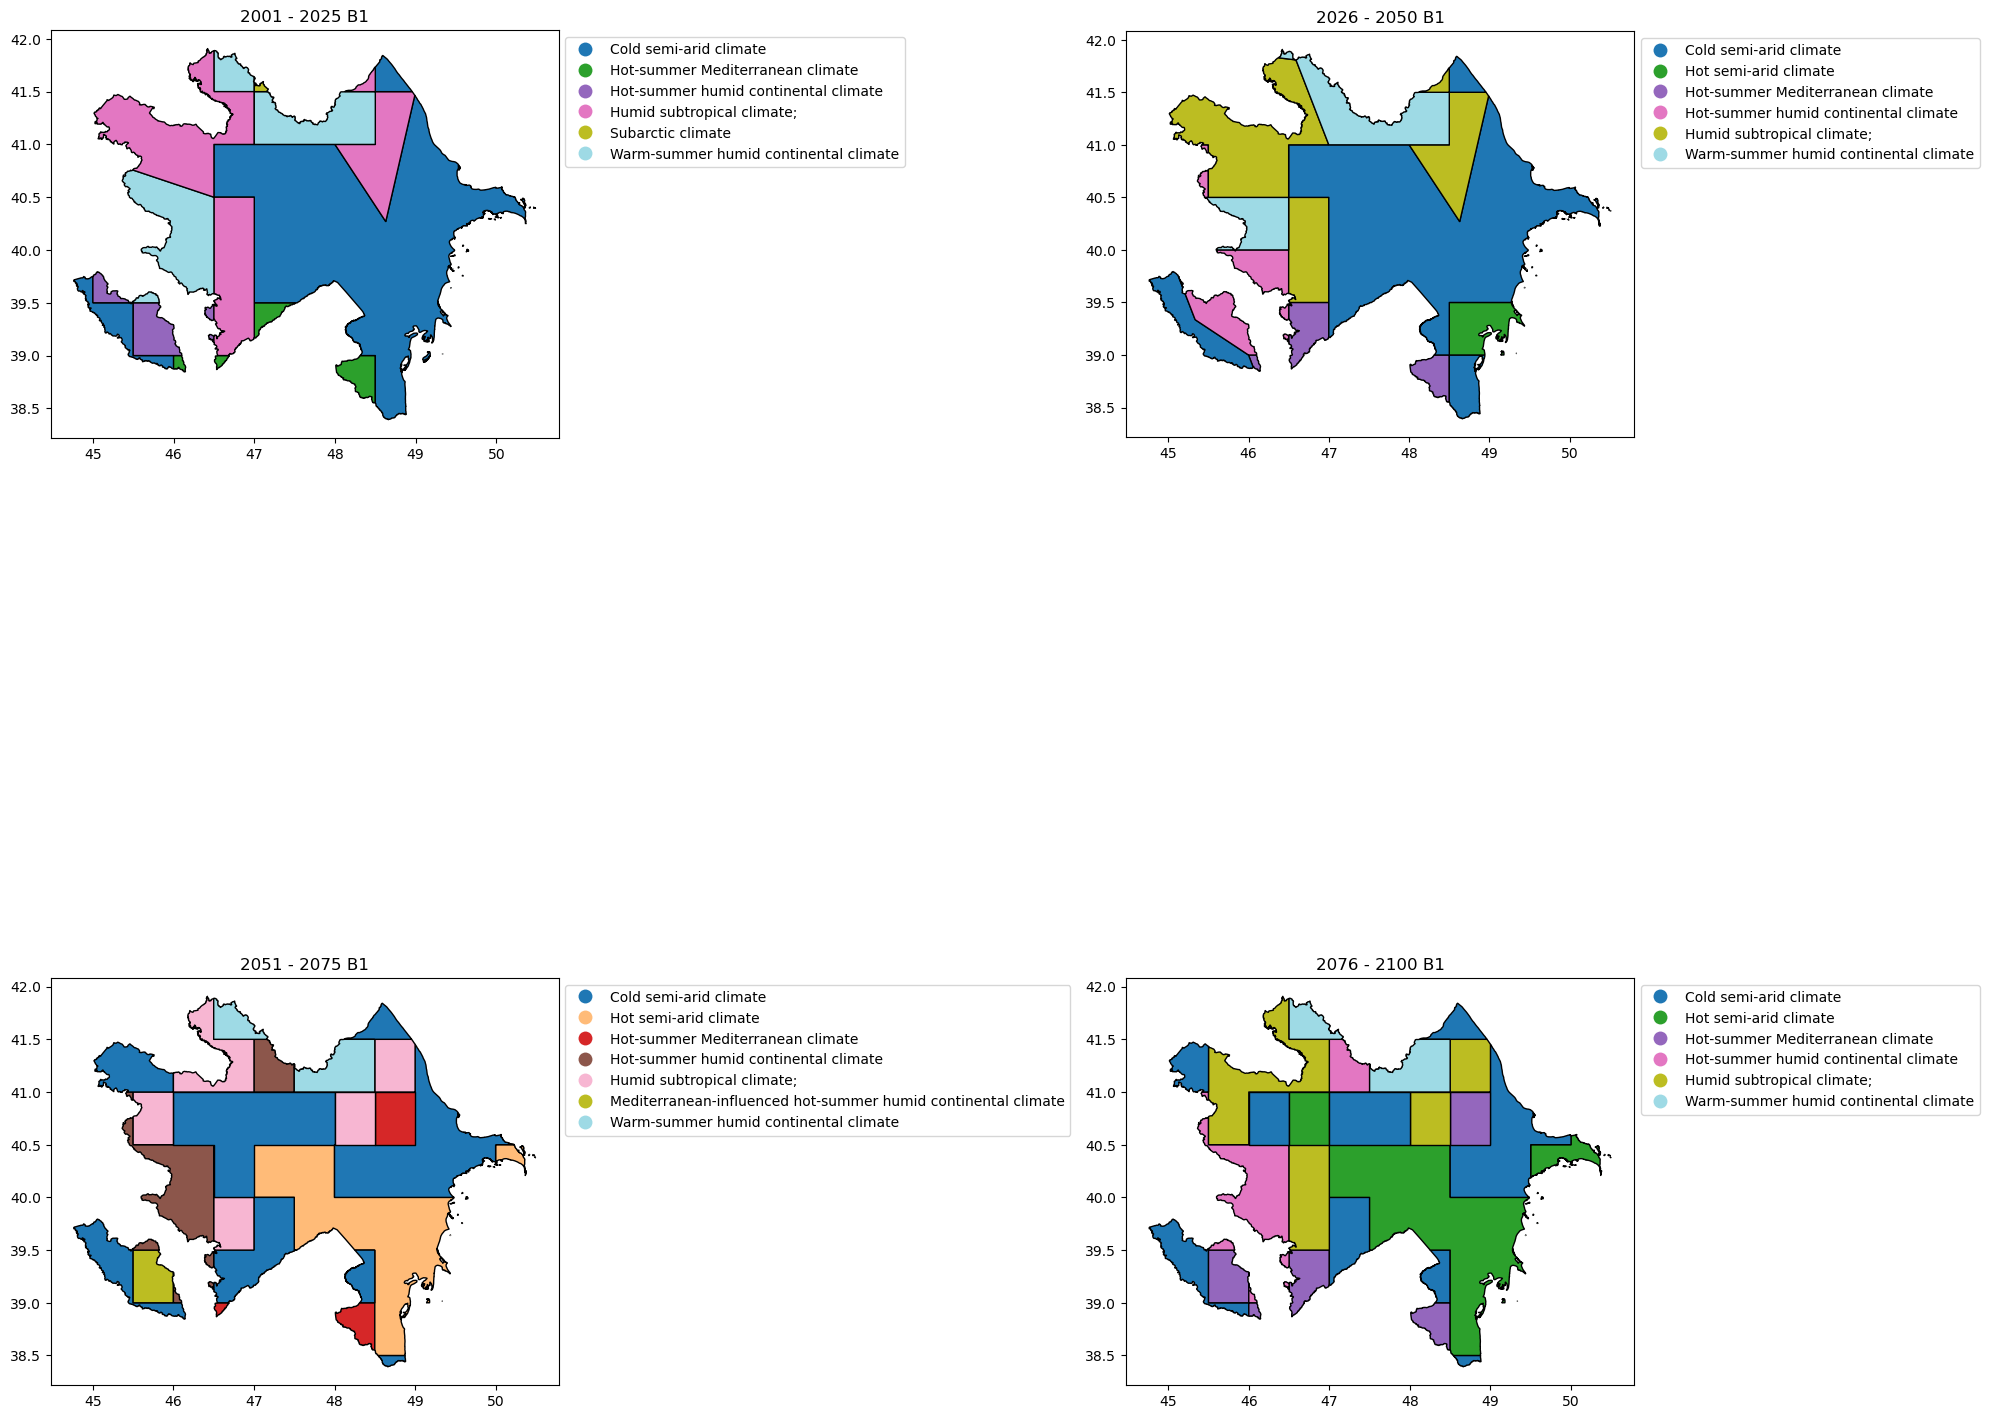

In [172]:
# Create a subplot with two panels on one row
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 20))

# Plot for 2001-2025 in panel 1
ctry_climshifts_B125.plot(ax=ax1, column="koppen_term", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, cmap="tab20", edgecolor="black")
ax1.set_title("2001 - 2025 B1")

# Plot for 2026-2050 in panel 2
ctry_climshifts_B150.plot(ax=ax2, column="koppen_term", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, cmap="tab20", edgecolor="black")
ax2.set_title("2026 - 2050 B1")

# Plot for 2051-2075 in panel 3
ctry_climshifts_B175.plot(ax=ax3, column="koppen_term", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, cmap="tab20", edgecolor="black")
ax3.set_title("2051 - 2075 B1")

# Plot for 2076-2100 in panel 4
ctry_climshifts_B1100.plot(ax=ax4, column="koppen_term", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, cmap="tab20", edgecolor="black")
ax4.set_title("2076 - 2100 B1")

# Adjust layout for better appearance
plt.tight_layout()

# Display the plot
plt.show()


**Observation**

In Azerbaijan, the B1 climate scenario forecasts the Cold semi-arid climate as predominant from 2001 to 2100. Despite its dominance, the geographic coverage of this climate is anticipated to diminish every 24 years, reflecting the expanding nature of other climates in the region. Notably, by 2051, the Mediterranean-influenced hot summer humid continental climate is projected to become obsolete, indicating significant shifts in climatic patterns over the century.

    B2 CLIMATE SCENARIO

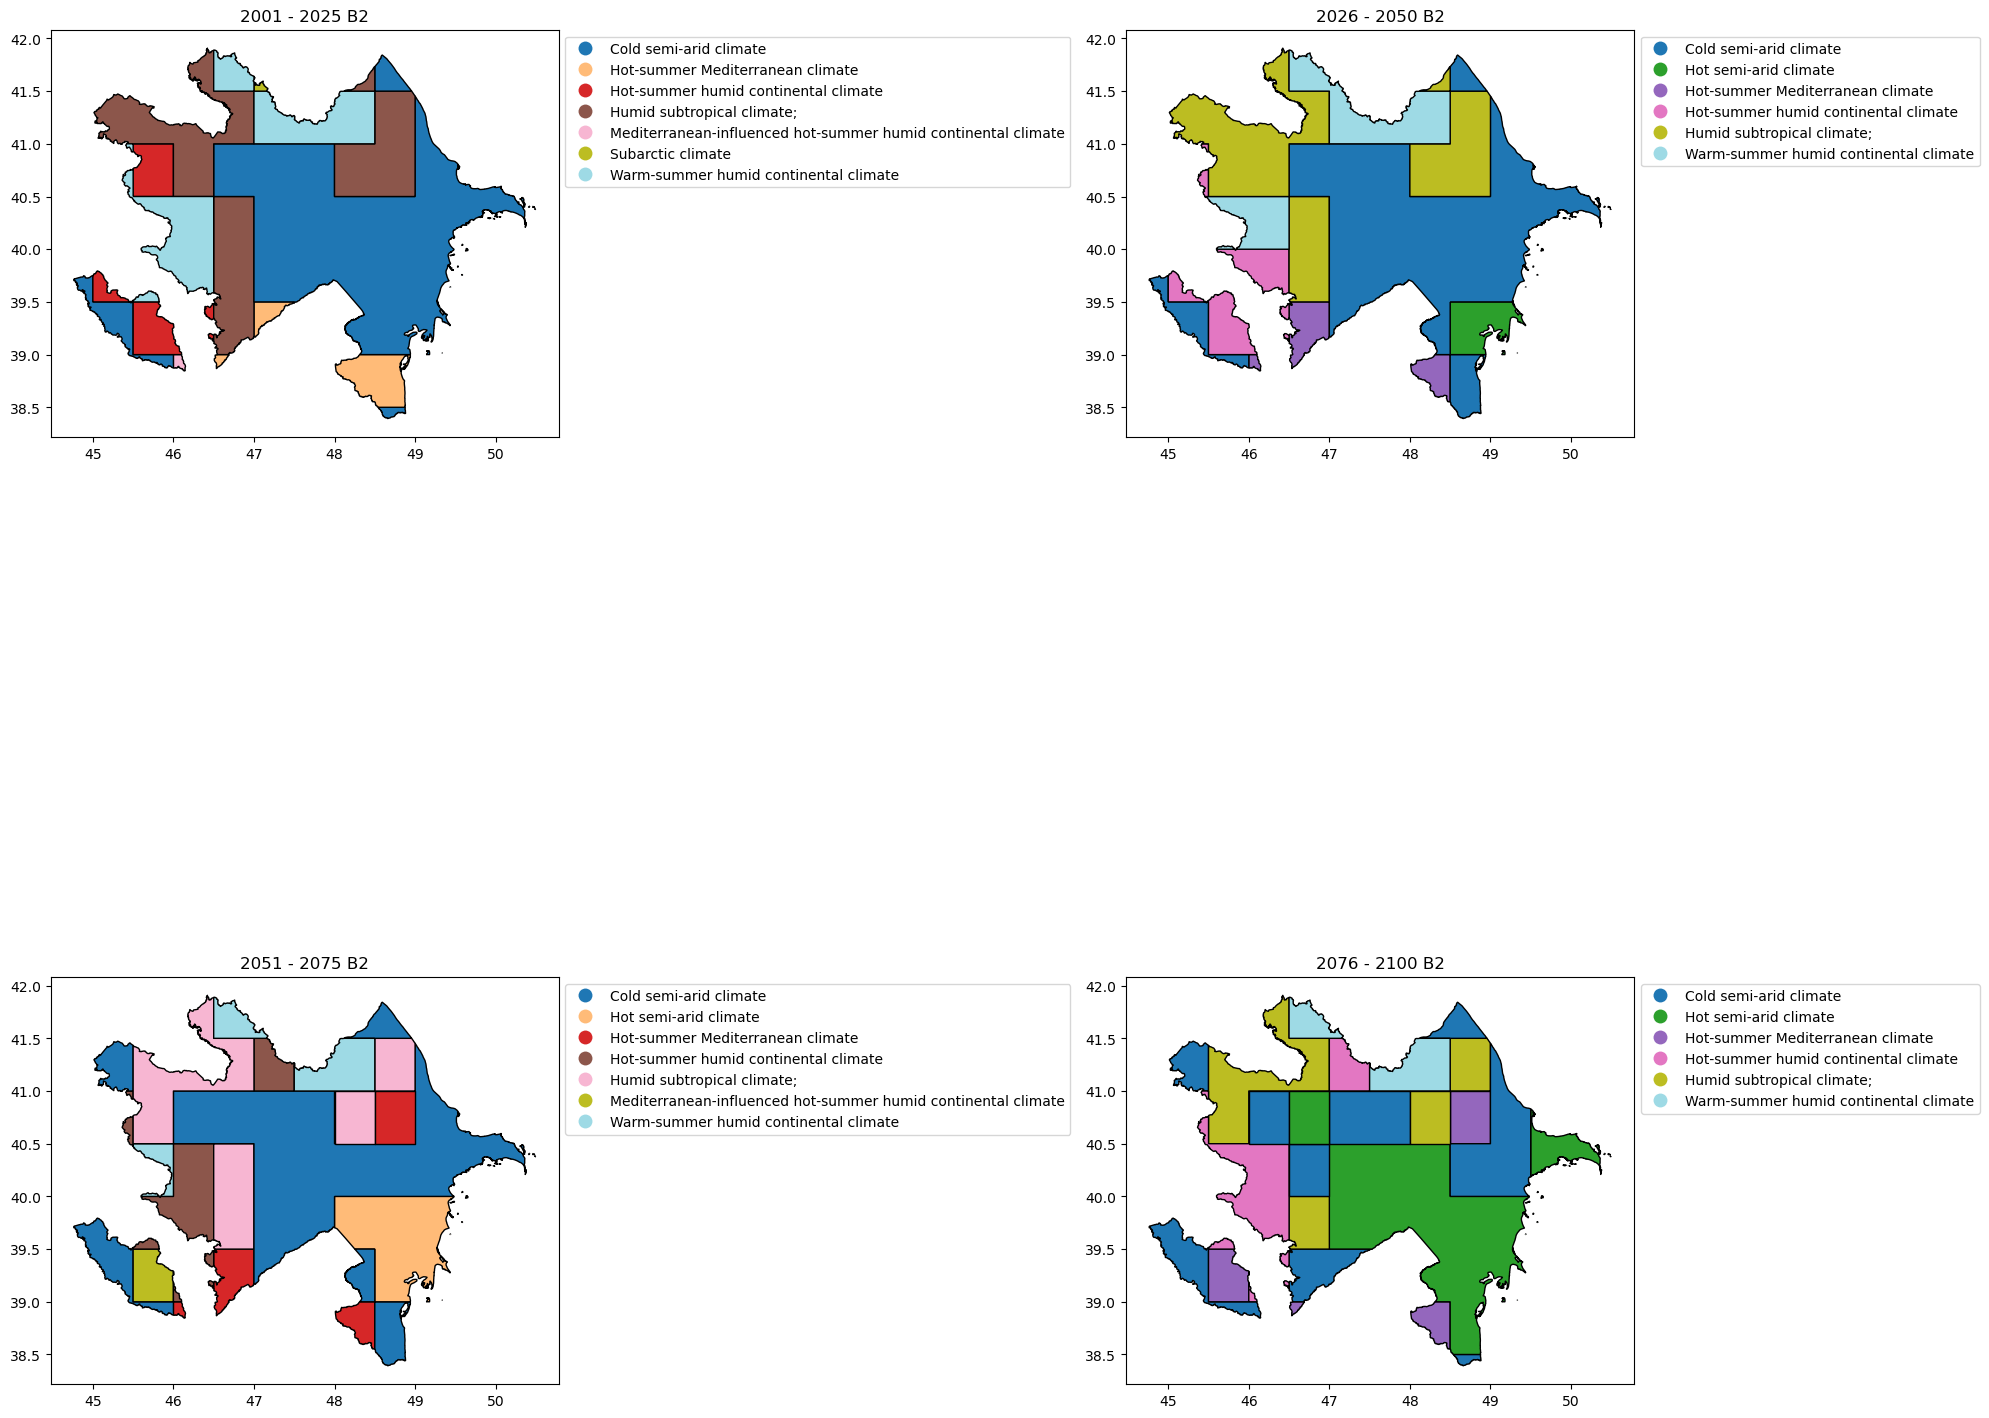

In [173]:
# Create a subplot with two panels on one row
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 20))

# Plot for 2001-2025 in panel 1
ctry_climshifts_B225.plot(ax=ax1, column="koppen_term", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, cmap="tab20", edgecolor="black")
ax1.set_title("2001 - 2025 B2")

# Plot for 2026-2050 in panel 2
ctry_climshifts_B250.plot(ax=ax2, column="koppen_term", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, cmap="tab20", edgecolor="black")
ax2.set_title("2026 - 2050 B2")

# Plot for 2051-2075 in panel 3
ctry_climshifts_B275.plot(ax=ax3, column="koppen_term", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, cmap="tab20", edgecolor="black")
ax3.set_title("2051 - 2075 B2")

# Plot for 2076-2100 in panel 4
ctry_climshifts_B2100.plot(ax=ax4, column="koppen_term", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, cmap="tab20", edgecolor="black")
ax4.set_title("2076 - 2100 B2")

# Adjust layout for better appearance
plt.tight_layout()

# Display the plot
plt.show()


**Observation**

Under the B2 climate scenario, similar to the B1 scenario, there is a notable shift in dominant climates in Azerbaijan. However, in this case, the Hot semi-arid climate is forecasted to replace the Cold semi-arid climate as the most prevalent climate by 2076. This suggests a significant alteration in climatic conditions over time, potentially impacting various aspects of the environment and human activities in the region.

    6.2 CLIMATE OVERVIEW

**Overview**

Azerbaijan boasts a diverse range of climatic zones, with the Cool temperate dry climate reigning supreme in various regions. However, as we delve into projections of climate shifts, it becomes evident that significant transformations lie ahead, reshaping the environmental landscape of the country.

Historically, Azerbaijan's climatic profile was anchored by the Cold semi-arid climate, which held sway for nearly a century until the emergence of the Humid subtropical climate. But looking to the future, scenarios like A1F1 paint a concerning picture. By 2051, the Hot semi-arid climate is poised to usurp dominance, relegating the Cold semi-arid climate to the annals of history. Furthermore, the reappearance of the Hot desert climate by 2076 signals a dynamic shift in Azerbaijan's climatic trajectory.

Similarly, under the A2 scenario, the Cold semi-arid climate maintains its stronghold until 2076, only to be replaced by the Hot semi-arid climate thereafter. Concurrently, the cold desert's influence wanes, underscoring the evolving nature of Azerbaijan's climate mosaic.

For the B1 scenario projections, the Cold semi-arid climate remains prevalent but experiences a gradual decline, allowing other climates to gain ground. By 2051, the Mediterranean-influenced hot summer humid continental climate fades into obscurity, marking a pivotal moment in Azerbaijan's climatic evolution.

Likewise, the B2 scenario foresees a shift in dominance, with the Hot semi-arid climate poised to ascend the throne by 2076. This transition heralds profound implications for the environment and human activities, underscoring the need for proactive measures to mitigate potential challenges.

These climate shifts carry far-reaching implications for Azerbaijan's environment. From altering precipitation patterns and temperature regimes to impacting agricultural practices and water resource management, the ramifications are manifold. As ecosystems adapt to new climatic realities, biodiversity may face unprecedented pressures, necessitating concerted conservation efforts.

Moreover, human populations may grapple with challenges such as changing agricultural productivity, water scarcity, and heightened vulnerability to extreme weather events. Adaptation strategies must prioritize resilience-building measures and sustainable development practices to mitigate the adverse effects of climate change.

In essence, the evolving climate landscape of Azerbaijan underscores the imperative of proactive adaptation and mitigation strategies. By fostering resilience, embracing innovation, and nurturing collaborative partnerships, Azerbaijan can navigate the challenges posed by climate change and forge a path towards a sustainable and resilient future for generations to come.

#### 7. SUMMARY AND RECOMMENDATION

Azerbaijan's environmental landscape is characterized by rich ecological diversity, climatic variability, administrative complexity, and infrastructure development. Spanning approximately 86 billion square meters, Azerbaijan comprises 63 districts, each with unique ecological characteristics and biodiversity hotspots. The country's road network infrastructure, classified into two classes- FCLASS 0 and FCLASS 5, play a crucial role in facilitating transportation, connectivity, and economic development across its diverse landscapes. While FCLASS 0 roads are prevalent, the scarcity of FCLASS 5 roads, which represent local or rural roads, highlights the need for infrastructure development to improve rural connectivity, access to services, and economic opportunities.

Furthermore, Azerbaijan's soil types, including Leptosol and Calcisol, significantly influence agricultural productivity, biodiversity conservation, and land management practices. Leptosol soils, predominant in mountainous regions, are vital for seasonal grazing and forest land but are susceptible to erosion, necessitating soil conservation measures. Conversely, Calcisol soils, found in arid and semiarid regions, pose challenges for agriculture due to water deficit but can support certain crops under irrigation.

In terms of biodiversity and protected areas, Azerbaijan exhibits rich ecological diversity, encompassing two significant biodiversity hotspots and a range of terrestrial ecoregions. The country's biodiversity hotspots occupy the entire country and are present in all ecoregions, emphasizing the interconnectedness between ecological zones and conservation priorities. Additionally, Azerbaijan is home to 34 protected areas categorized under 3 distinct classes, with State Nature Sanctuary being the most prevalent, highlighting the importance of conservation efforts in safeguarding the country's natural heritage.

ACTIONABLE INSIGHTS AND RECOMMENDATION

1. Infrastructure Development: Prioritize the development of rural road infrastructure (local/urban roads) to improve connectivity, access to services, and economic opportunities for remote communities.

2. Climate Change Adaptation: Develop and implement proactive adaptation strategies to mitigate the adverse effects of projected climate shifts, focusing on resilience-building measures, sustainable development practices, and conservation efforts.

3. Integrate Water Resource Management: Implement integrated water resource management strategies to enhance the sustainable use and conservation of water bodies. Develop and enforce regulations to prevent water pollution, promote sustainable fisheries management, and protect aquatic habitats. Invest in infrastructure for water storage, irrigation, and flood control to enhance agricultural productivity and mitigate the impacts of climate change on water resources.

4. Promote Sustainable Agriculture: Encourage adoption of sustainable agricultural practices tailored to the specific characteristics of Leptosol and Calcisol soils, such as agroforestry, rotational grazing, and precision irrigation techniques. Provide training, technical assistance, and financial incentives to farmers to support the transition to more sustainable farming methods.

5. Build Capacity and Raise Awareness: Provide training and capacity-building programs for local communities, government agencies, and stakeholders to enhance their knowledge and skills in conservation and natural resource management. Raise awareness among the public about the importance of biodiversity conservation, sustainable agriculture, and water resource management through education, outreach, and public engagement initiatives.

6. Enhance Conservation Efforts: Strengthen protected area management and enforcement to ensure effective conservation outcomes. Invest in habitat restoration, species reintroduction, and ecological monitoring programs to enhance biodiversity conservation and ecosystem resilience. Foster partnerships with local communities, NGOs, and governmental agencies to promote collaborative conservation initiatives and sustainable resource management practices.

7. Data Quality Improvement: Address data quality issues regarding the ownership structure of protected areas and road network classifications to ensure comprehensive analysis and effective decision-making in Azerbaijan's land sector.

Through these recommendations, Azerbaijan can foster sustainable development, preserve its natural heritage, and mitigate the impacts of environmental challenges, ensuring a resilient and prosperous future for its citizens.

#### 8. REFERENCES

[World Soil Resources- FAO](https://www.fao.org/3/i5199e/i5199e.pdf)

[Global Roads Documentation](https://sedac.ciesin.columbia.edu/downloads/docs/groads/groads-v1-documentation.pdf)

[World Climate Zones](https://www.researchgate.net/publication/314211373_World_Climate_Zones#full-text)

[Climate Changes](https://sos.noaa.gov/catalog/datasets/koppen-geiger-climate-changes-1901-2100/)

[EPSG Information](https://docs.up42.com/data/reference/utm#:~:text=For%20the%20Southern%20Hemisphere,indicating%20the%20respective%20UTM%20zone)

[Azerbaijan](https://en.wikipedia.org/wiki/Azerbaijan)